# Entregable: ML - The Bridge Bank Churn analysis #
#### Jorge Marchan Torres ####

## Introducción: ##

Usando una base de datos externa se pretende **analizar los principales factores** que llevan a los clientes de **The Bridge Bank** a **abandonar la entidad financiera**. Usando las distintas variables disponibles en nuestra base de datos se analizará e identificará a **perfiles propensos de fuga**.

### Diccionario de variables: ###

+ **CustomerId:** ID del cliente
+ **Surname:** Apellido del cliente
+ **CreditScore:** Puntaje (score) crediticio del cliente
+ **Geography:** País de residencia del cliente
+ **Gender:** Género del cliente
+ **Age:** Edad del cliente
+ **Tenure:** Años de permanencia del cliente en The Bridge Bank
+ **Balance:** Balance en cuenta del cliente en The Bridge Bank
+ **NumOfProducts:** Tenencia de producto del cliente en The Bridge Bank
+ **HasCrCard:** Si el cliente tiene una tarjeta de crédito en The Bridge Bank
+ **IsActiveMember:** Si el cliente es considerado activo por reglas de negocio (programas, seguros, productos,...) en The Bridge Bank
+ **EstimatedSalary:** Salario estimado por The Bridge Bank del cliente
+ **Exited:** Si el cliente abandonó el banco

## **1. Importamos las librerias e importamos los datos para su análisis**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('../data/ChurnModeling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
pwd

'C:\\Users\\jorge\\OneDrive\\Escritorio\\Prueba\\Repo_taller\\ML-Proyect\\src\\notebook'

Nota: Eliminamos la columna "RowNumber" ya que no la vamos a necesitar para el análisis

In [4]:
data.pop('RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **2. Empezamos explorando los datos de nuestra base para identificar missing o formatos incorrectos**

In [5]:
data.shape

(10000, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
data.CustomerId.value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

## **3. Análisis exploratorio de variables**

In [8]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Hacemos un matriz de correlaciones para ver si hay una clara correlación entre algunas de las variables y empezar a sacar hipótesis y conclusiones

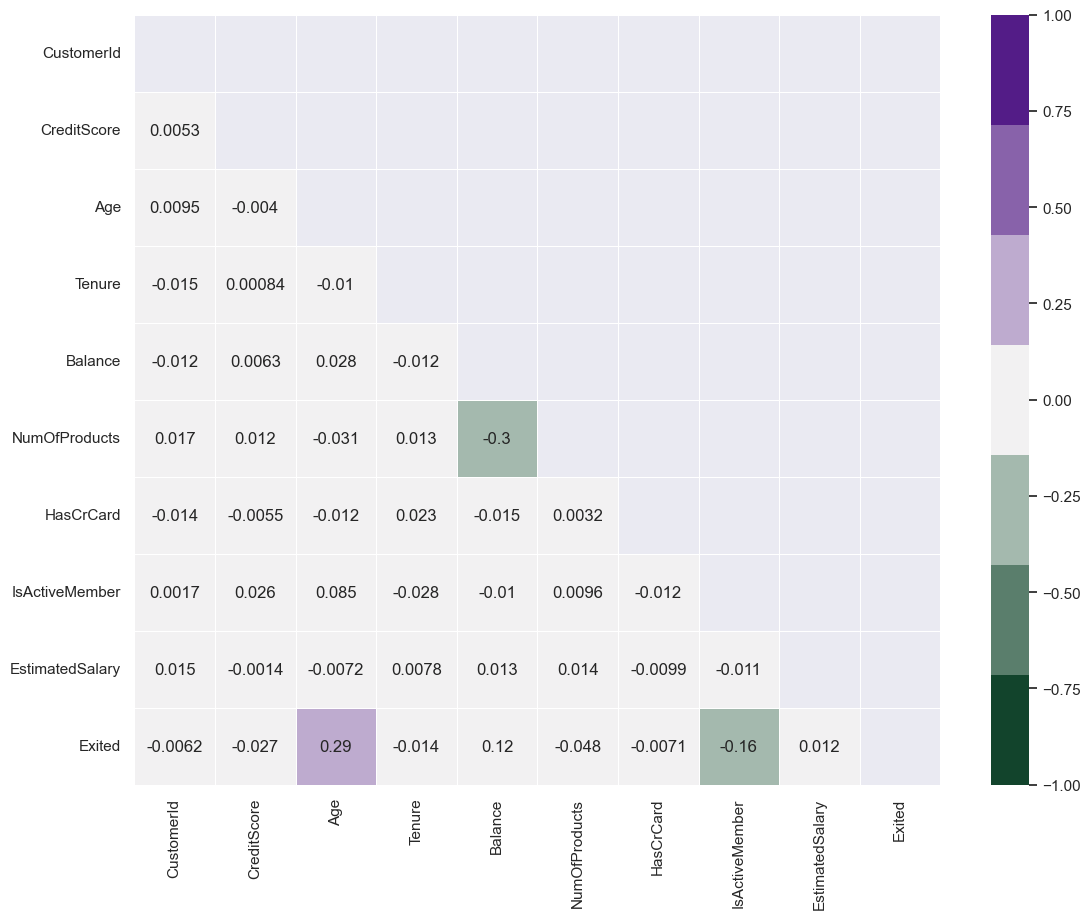

In [10]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [11]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

## **4. Representación gráfica de la distribución de los usuarios por cada una de las variables**

Empezamos a sacar histogramas de las variables para ver la distribución de los usuarios en cada una de ellas e identificar outliers

4.1 Credit Score

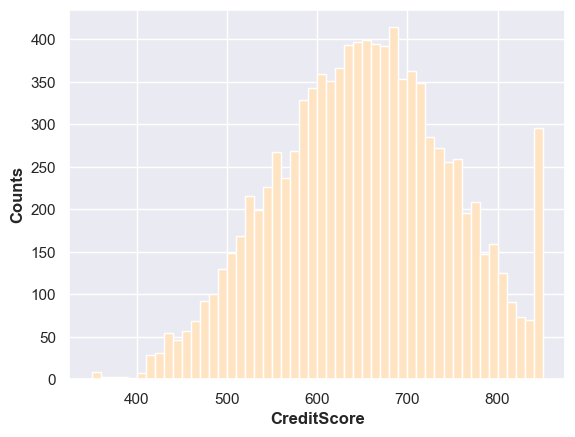

In [12]:
plt.hist(data[['CreditScore']], bins=50, color='bisque')
plt.xlabel('CreditScore', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.show()

4.2 Edad

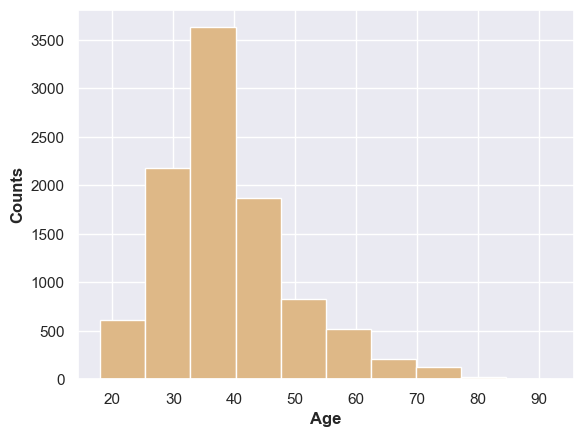

In [13]:
plt.hist(data.Age, bins=10, color='burlywood')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.show()

4.3 Permanencia

<AxesSubplot:xlabel='Tenure', ylabel='count'>

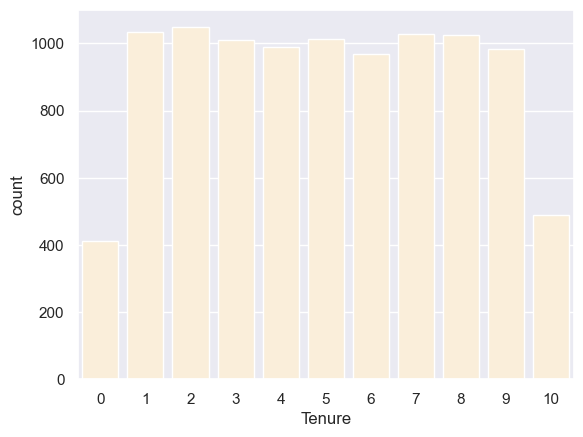

In [14]:
sns.countplot(x='Tenure',data=data, color='papayawhip')

4.4 Balance en cuenta

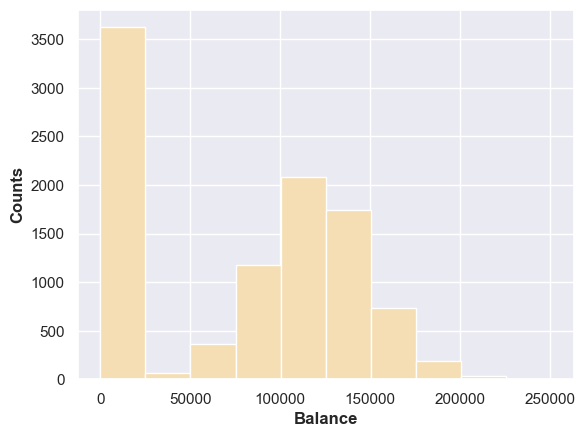

In [15]:
plt.hist(data.Balance, bins=10, color='wheat')
plt.xlabel('Balance', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.show()

4.5 Número de productos

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

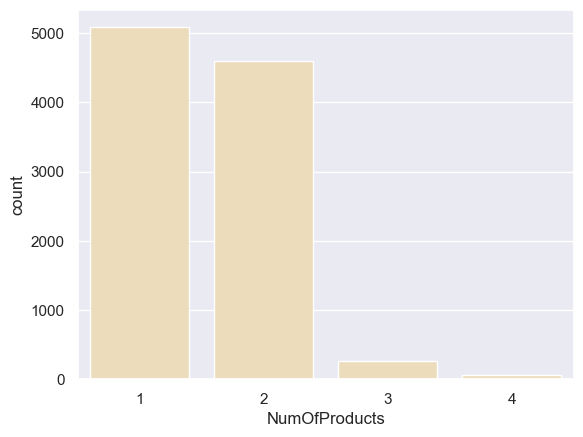

In [16]:
sns.countplot(x='NumOfProducts',data=data, color='wheat')

4.6 Si el cliente tiene tarjeta de crédito

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

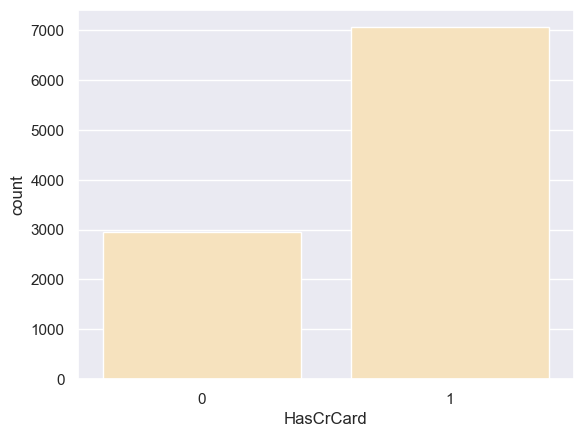

In [17]:
sns.countplot(x='HasCrCard',data=data, color='moccasin')

4.7 Si el usuario es activo

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

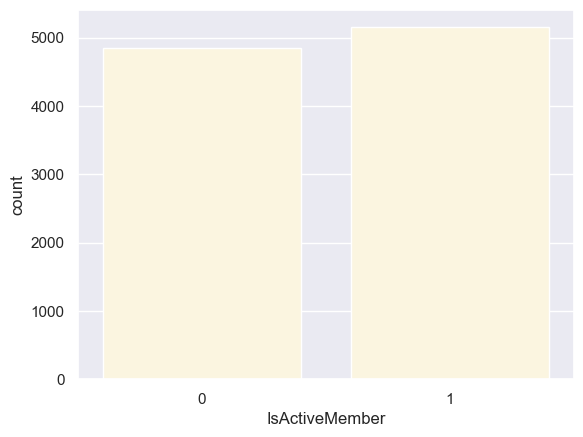

In [18]:
sns.countplot(x='IsActiveMember',data=data, color='cornsilk')

4.8 País de residencia del cliente

<AxesSubplot:xlabel='Geography', ylabel='count'>

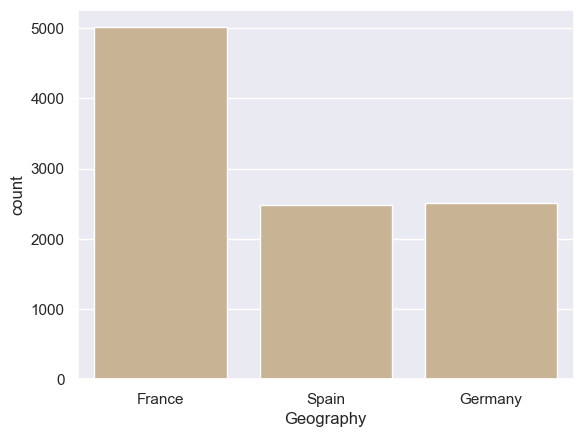

In [19]:
sns.countplot(x='Geography',data=data, color='tan')

4.9 Género del cliente

<AxesSubplot:xlabel='Gender', ylabel='count'>

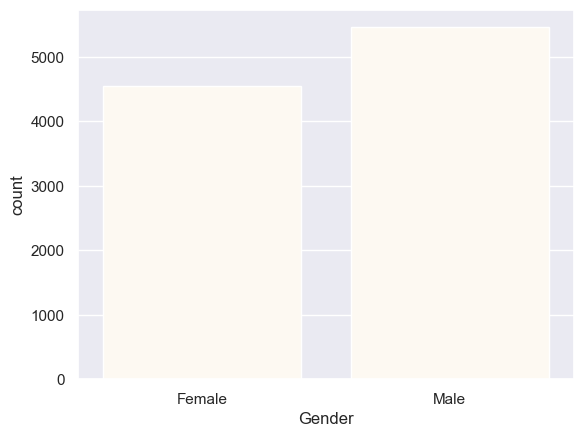

In [20]:
sns.countplot(x='Gender',data=data, color='floralwhite')

4.10 Salario estimado por el banco

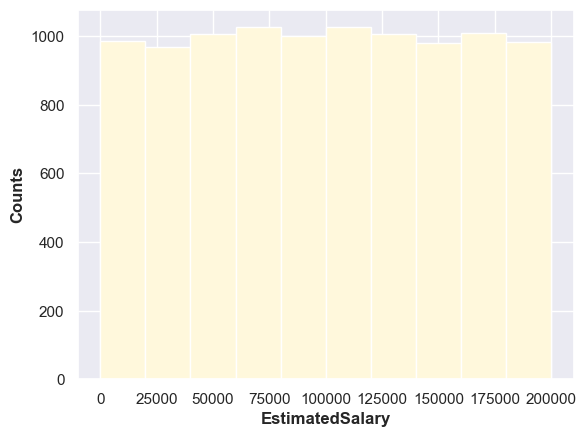

In [21]:
plt.hist(data.EstimatedSalary, bins=10, color='cornsilk')
plt.xlabel('EstimatedSalary', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.show()

4.11 Si el cliente salió del banco

<AxesSubplot:xlabel='Exited', ylabel='count'>

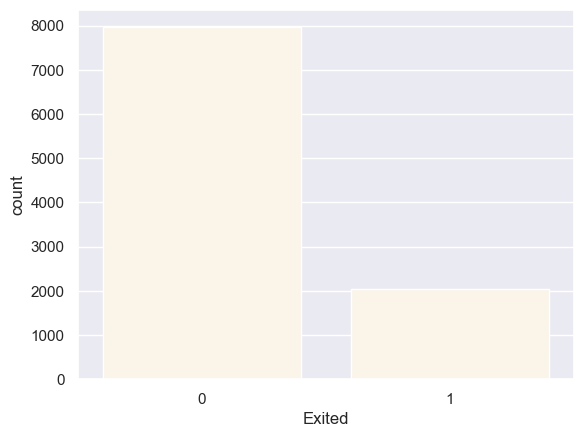

In [22]:
sns.countplot(x='Exited',data=data, color='oldlace')

## **5. Análisis de la fuga**

**5.1 Análisis por país**

In [23]:
fuga_pais = data.groupby('Geography', as_index=False).count()[['Geography', 'Exited']] 
fuga_pais.rename(columns={'Exited':'Total'}, inplace=True)
fuga = data.loc[data.Exited==1].groupby('Geography',
                                                 as_index=False).count()[['Geography', 'Exited']]

fuga_per = fuga_pais.merge(fuga, how='left').fillna(0)
fuga_per['Porcentaje'] = round(100*fuga_per.Exited/fuga_per.Total,2)
fuga_per

,Geography,Total,Exited,Porcentaje
0,France,5014,810,16.15
1,Germany,2509,814,32.44
2,Spain,2477,413,16.67


<AxesSubplot:xlabel='Geography', ylabel='Porcentaje'>

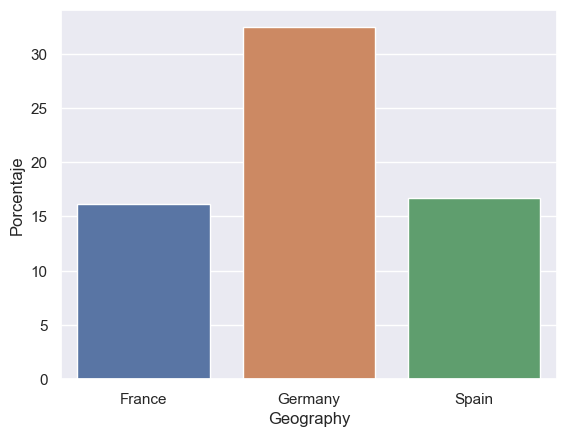

In [24]:
sns.barplot(x='Geography', y='Porcentaje', data=fuga_per)

Nos damos cuenta que en Alemania el problema de la fuga se multiplica casi por 2X, por lo que procederemos a analizar cada país por separado.

In [25]:
esp = data['Geography'] == 'Spain'
data_esp = data[esp]
data_esp.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2.477000e+03,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734
std,7.176554e+04,94.365051,10.446119,2.856660,64235.555208,0.564646,0.460588,0.499220,57103.678091,0.372813
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,417.410000,0.000000
25%,1.562954e+07,587.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50267.690000,0.000000
50%,1.569179e+07,651.000000,37.000000,5.000000,61710.440000,2.000000,1.000000,1.000000,99984.860000,0.000000
75%,1.575375e+07,715.000000,44.000000,8.000000,121056.630000,2.000000,1.000000,1.000000,147278.430000,0.000000
max,1.581569e+07,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [26]:
fra = data['Geography'] == 'France'
data_fra = data[fra]
data_fra.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5.014000e+03,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
mean,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
std,7.137584e+04,97.016799,10.469459,2.888475,64133.565524,0.570347,0.455356,0.499769,57336.289016,0.368072
min,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562861e+07,582.000000,31.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51399.190000,0.000000
50%,1.569077e+07,653.000000,37.000000,5.000000,62153.500000,1.000000,1.000000,1.000000,99132.310000,0.000000
75%,1.575217e+07,717.000000,43.000000,7.000000,121444.877500,2.000000,1.000000,1.000000,149295.360000,0.000000
max,1.581566e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199929.170000,1.000000


In [27]:
ger = data['Geography'] == 'Germany'
data_ger = data[ger]
data_ger.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2.509000e+03,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000
mean,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432
std,7.322843e+04,98.168937,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256
min,1.556578e+07,350.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562740e+07,584.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000
50%,1.568989e+07,651.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000
75%,1.575573e+07,722.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000
max,1.581566e+07,850.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000


**5.2 Análisis por Edad**

Adicionalmente, dadas las distintas **necesidades financieras** y los distintos **niveles de actividad** de los clientes a lo largo de su **journey financiero**, procederemos a **separar el analisis por rangos de edad** basado en comportamientos financieros similares. Los segmentos que usaremos son los siguientes: 

+ **<18:** Menores de edad (cat1)
+ **18-24:** Estudiantes universitarios (cat2)
+ **25-31:** Jóvenes profesionales (cat3)
+ **32-45:** Profesionales con experiencia y familias (cat4)
+ **46-65:** Profesionales consolidados y familias (cat5)
+ **65>:** Jubilados/pensionistas (cat6)

In [28]:
bins_age = [0,17,24,31,45,66,100]
labels_age = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6']
data['AgeRange'] = pd.cut(x=data.Age, bins=bins_age, labels=labels_age)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeRange
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,cat4
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,cat4
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,cat4
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,cat4
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,cat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,cat4
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,cat4
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,cat4
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,cat4


In [29]:
fuga_edad = data.groupby('AgeRange', as_index=False).count()[['AgeRange', 'Exited']] 
fuga_edad.rename(columns={'Exited':'Total'}, inplace=True)
fuga2 = data.loc[data.Exited==1].groupby('AgeRange',
                                                 as_index=False).count()[['AgeRange', 'Exited']]
display(fuga_edad)
display(fuga2)

,AgeRange,Total
0,cat1,0
1,cat2,457
2,cat3,1915
3,cat4,5517
4,cat5,1882
5,cat6,229


,AgeRange,Exited
0,cat1,0
1,cat2,40
2,cat3,141
3,cat4,899
4,cat5,929
5,cat6,28


**5.3 Análisis por balance en cuenta y salario**

Adicionalmente, Separaremos en categorías el balance en cuenta y el salario para sacar conclusiones más especificas a cada segmento y país. La división será usando el siguiente criterio:

+ **0€**
+ **1€ - 25.000€**
+ **25.001€ - 75.000€**
+ **75.001€ - 125.000€**
+ **125.001€ - 175.000€**
+ **<175.001€**

In [30]:
bins_sal = [0,1,25000,75000,125000,175000,300000]
labels_sal = ['band1', 'band2', 'band3', 'band4', 'band5', 'band6']
data['SalaryRange'] = pd.cut(x=data.EstimatedSalary, bins=bins_sal, labels=labels_sal)
bins_bal = [-1,1,25000,75000,125000,175000,300000]
labels_bal = ['bal1', 'bal2', 'bal3', 'bal4', 'bal5', 'bal6']
data['BalanceRange'] = pd.cut(x=data.Balance, bins=bins_bal, labels=labels_bal)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeRange,SalaryRange,BalanceRange
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,cat4,band4,bal1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,cat4,band4,bal4
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,cat4,band4,bal5
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,cat4,band4,bal1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,cat4,band4,bal5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,cat4,band4,bal1
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,cat4,band4,bal3
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,cat4,band3,bal1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,cat4,band4,bal4


Repetimos lo mismo para los países:

In [31]:
bins_sal = [0,1,25000,75000,125000,175000,300000]
labels_sal = ['band1', 'band2', 'band3', 'band4', 'band5', 'band6']
data_esp['SalaryRange'] = pd.cut(x=data_esp.EstimatedSalary, bins=bins_sal, labels=labels_sal)
bins_bal = [-1,1,25000,75000,125000,175000,300000]
labels_bal = ['bal1', 'bal2', 'bal3', 'bal4', 'bal5', 'bal6']
data_esp['BalanceRange'] = pd.cut(x=data_esp.Balance, bins=bins_bal, labels=labels_bal)
data_esp

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,band4,bal4
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,band4,bal5
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,band5,bal4
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,band4,bal1
14,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,band3,bal1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0,band2,bal5
9980,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,band4,bal3
9987,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,band2,bal6
9989,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,band6,bal1


In [32]:
bins_sal = [0,1,25000,75000,125000,175000,300000]
labels_sal = ['band1', 'band2', 'band3', 'band4', 'band5', 'band6']
data_fra['SalaryRange'] = pd.cut(x=data_fra.EstimatedSalary, bins=bins_sal, labels=labels_sal)
bins_bal = [-1,1,25000,75000,125000,175000,300000]
labels_bal = ['bal1', 'bal2', 'bal3', 'bal4', 'bal5', 'bal6']
data_fra['BalanceRange'] = pd.cut(x=data_fra.Balance, bins=bins_bal, labels=labels_bal)
data_fra

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,band4,bal1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,band4,bal5
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,band4,bal1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,band2,bal1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,band3,bal5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,band5,bal1
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,band4,bal1
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,band4,bal3
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,band3,bal1


In [33]:
bins_sal = [0,1,25000,75000,125000,175000,300000]
labels_sal = ['band1', 'band2', 'band3', 'band4', 'band5', 'band6']
data_ger['SalaryRange'] = pd.cut(x=data_ger.EstimatedSalary, bins=bins_sal, labels=labels_sal)
bins_bal = [-1,1,25000,75000,125000,175000,300000]
labels_bal = ['bal1', 'bal2', 'bal3', 'bal4', 'bal5', 'bal6']
data_ger['BalanceRange'] = pd.cut(x=data_ger.Balance, bins=bins_bal, labels=labels_bal)
data_ger

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,band4,bal4
15,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,band3,bal5
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,band2,bal5
26,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,band5,bal5
28,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0,band4,bal5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,band4,bal5
9984,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,band3,bal4
9986,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,band3,bal6
9990,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,band3,bal3


**5.4 Análisis por país y rango de edad**

## España ##

In [34]:
bins = [0,17,24,31,45,66,100]
labels = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6']
data_esp['AgeRange'] = pd.cut(x=data_esp.Age, bins=bins, labels=labels)
data_esp

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,band4,bal4,cat4
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,band4,bal5,cat4
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,band5,bal4,cat4
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,band4,bal1,cat2
14,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,band3,bal1,cat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0,band2,bal5,cat4
9980,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,band4,bal3,cat4
9987,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,band2,bal6,cat3
9989,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,band6,bal1,cat3


In [35]:
data_esp['AgeRange'].unique()

['cat4', 'cat2', 'cat3', 'cat5', 'cat6']
Categories (6, object): ['cat1' < 'cat2' < 'cat3' < 'cat4' < 'cat5' < 'cat6']

In [36]:
data_esp.shape

(2477, 16)

In [37]:
edad_esp = data_esp.groupby('AgeRange', as_index=False).count()[['AgeRange', 'CustomerId']] 
edad_esp.rename(columns={'CustomerId':'AgeNum'}, inplace=True)
edad_esp['AgeTotal'] = edad_esp.AgeNum.sum()
edad_esp['AgePercent'] = round(100*edad_esp.AgeNum/edad_esp.AgeTotal,2)
edad_esp

,AgeRange,AgeNum,AgeTotal,AgePercent
0,cat1,0,2477,0.00
1,cat2,124,2477,5.01
2,cat3,452,2477,18.25
3,cat4,1385,2477,55.91
4,cat5,458,2477,18.49
5,cat6,58,2477,2.34


<AxesSubplot:xlabel='AgeRange', ylabel='AgePercent'>

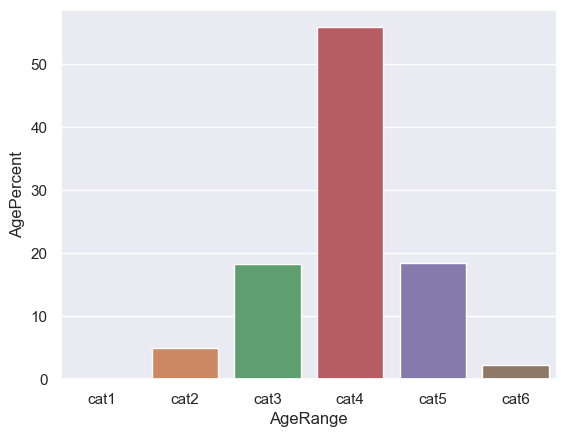

In [38]:
sns.barplot(x='AgeRange', y='AgePercent', data=edad_esp)

In [39]:
edad_esp['ExitedNum'] = data_esp.loc[data_esp.Exited==1].groupby('AgeRange',
                                                 as_index=False).count()[['Exited']]
edad_esp['ExitedPercent'] = round(100*edad_esp.ExitedNum/edad_esp.AgeNum, 2).fillna(0)
edad_esp

,AgeRange,AgeNum,AgeTotal,AgePercent,ExitedNum,ExitedPercent
0,cat1,0,2477,0.00,0,0.00
1,cat2,124,2477,5.01,11,8.87
2,cat3,452,2477,18.25,39,8.63
3,cat4,1385,2477,55.91,177,12.78
4,cat5,458,2477,18.49,180,39.30
5,cat6,58,2477,2.34,6,10.34


<AxesSubplot:xlabel='AgeRange', ylabel='ExitedPercent'>

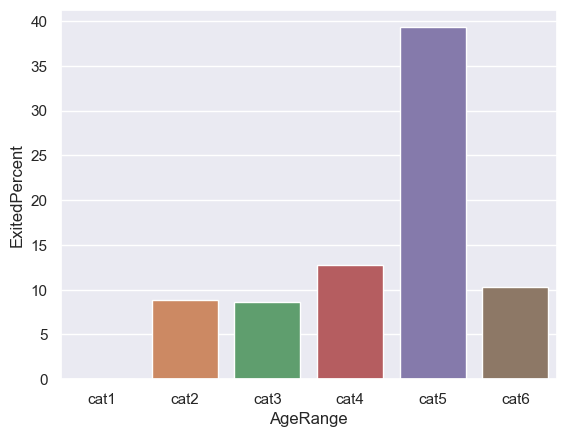

In [40]:
sns.barplot(x='AgeRange', y='ExitedPercent', data=edad_esp)

In [41]:
edad_esp.ExitedNum.sum()

413

## Francia ##

In [42]:
bins = [0,17,24,31,45,66,100]
labels = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6']
data_fra['AgeRange'] = pd.cut(x=data_fra.Age, bins=bins, labels=labels)
data_fra

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,band4,bal1,cat4
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,band4,bal5,cat4
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,band4,bal1,cat4
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,band2,bal1,cat5
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,band3,bal5,cat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,band5,bal1,cat3
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,band4,bal1,cat4
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,band4,bal3,cat4
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,band3,bal1,cat4


In [43]:
data_fra['AgeRange'].unique()

['cat4', 'cat5', 'cat3', 'cat2', 'cat6']
Categories (6, object): ['cat1' < 'cat2' < 'cat3' < 'cat4' < 'cat5' < 'cat6']

In [44]:
data_fra.shape

(5014, 16)

In [45]:
edad_fra = data_fra.groupby('AgeRange', as_index=False).count()[['AgeRange', 'CustomerId']] 
edad_fra.rename(columns={'CustomerId':'AgeNum'}, inplace=True)
edad_fra['AgeTotal'] = edad_fra.AgeNum.sum()
edad_fra['AgePercent'] = round(100*edad_fra.AgeNum/edad_fra.AgeTotal,2)
edad_fra

,AgeRange,AgeNum,AgeTotal,AgePercent
0,cat1,0,5014,0.00
1,cat2,237,5014,4.73
2,cat3,1019,5014,20.32
3,cat4,2778,5014,55.40
4,cat5,866,5014,17.27
5,cat6,114,5014,2.27


<AxesSubplot:xlabel='AgeRange', ylabel='AgePercent'>

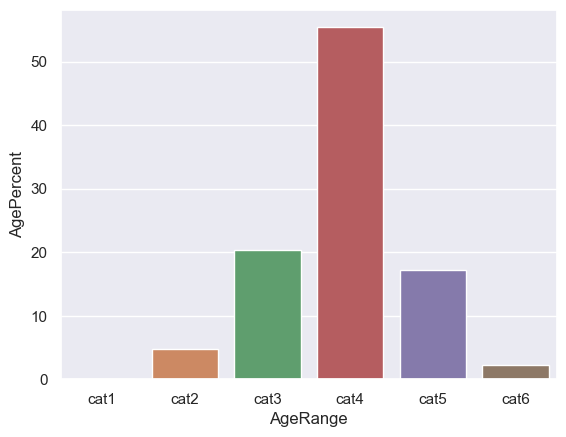

In [46]:
sns.barplot(x='AgeRange', y='AgePercent', data=edad_fra)

In [47]:
edad_fra['ExitedNum'] = data_fra.loc[data_fra.Exited==1].groupby('AgeRange',
                                                 as_index=False).count()[['Exited']]
edad_fra['ExitedPercent'] = round(100*edad_fra.ExitedNum/edad_fra.AgeNum, 2).fillna(0)
edad_fra

,AgeRange,AgeNum,AgeTotal,AgePercent,ExitedNum,ExitedPercent
0,cat1,0,5014,0.00,0,0.00
1,cat2,237,5014,4.73,14,5.91
2,cat3,1019,5014,20.32,51,5.00
3,cat4,2778,5014,55.40,356,12.81
4,cat5,866,5014,17.27,380,43.88
5,cat6,114,5014,2.27,9,7.89


<AxesSubplot:xlabel='AgeRange', ylabel='ExitedPercent'>

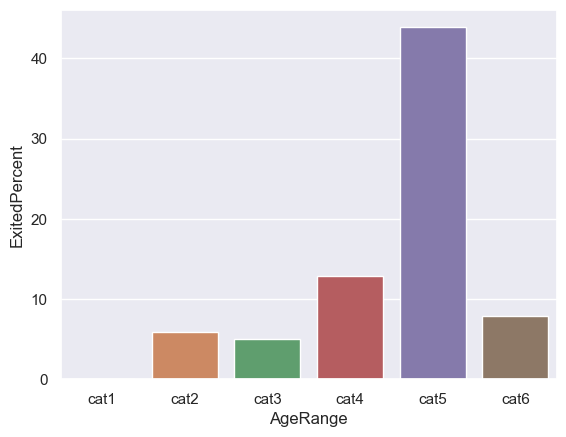

In [48]:
sns.barplot(x='AgeRange', y='ExitedPercent', data=edad_fra)

In [49]:
edad_fra.ExitedNum.sum()

810

## Alemania ##

In [50]:
bins = [0,17,24,31,45,66,100]
labels = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6']
data_ger['AgeRange'] = pd.cut(x=data_ger.Age, bins=bins, labels=labels)
data_ger

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,band4,bal4,cat3
15,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,band3,bal5,cat4
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,band2,bal5,cat5
26,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,band5,bal5,cat4
28,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0,band4,bal5,cat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,band4,bal5,cat5
9984,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,band3,bal4,cat4
9986,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,band3,bal6,cat5
9990,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,band3,bal3,cat4


In [51]:
data_ger['AgeRange'].unique()

['cat3', 'cat4', 'cat5', 'cat2', 'cat6']
Categories (6, object): ['cat1' < 'cat2' < 'cat3' < 'cat4' < 'cat5' < 'cat6']

In [52]:
data_ger.shape

(2509, 16)

In [53]:
edad_ger = data_ger.groupby('AgeRange', as_index=False).count()[['AgeRange', 'CustomerId']] 
edad_ger.rename(columns={'CustomerId':'AgeNum'}, inplace=True)
edad_ger['AgeTotal'] = edad_ger.AgeNum.sum()
edad_ger['AgePercent'] = round(100*edad_ger.AgeNum/edad_ger.AgeTotal,2)
edad_ger

,AgeRange,AgeNum,AgeTotal,AgePercent
0,cat1,0,2509,0.00
1,cat2,96,2509,3.83
2,cat3,444,2509,17.70
3,cat4,1354,2509,53.97
4,cat5,558,2509,22.24
5,cat6,57,2509,2.27


<AxesSubplot:xlabel='AgeRange', ylabel='AgePercent'>

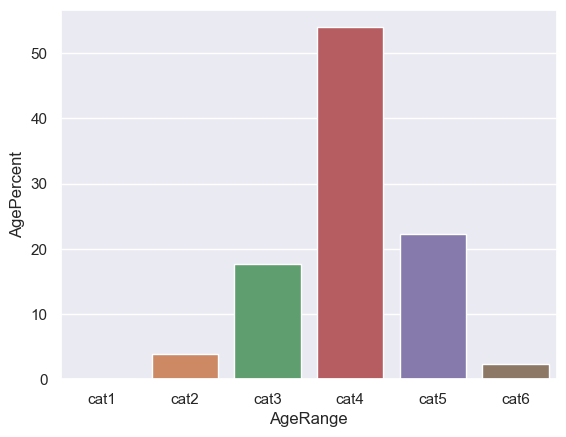

In [54]:
sns.barplot(x='AgeRange', y='AgePercent', data=edad_ger)

In [55]:
edad_ger['ExitedNum'] = data_ger.loc[data_ger.Exited==1].groupby('AgeRange',
                                                 as_index=False).count()[['Exited']]
edad_ger['ExitedPercent'] = round(100*edad_ger.ExitedNum/edad_ger.AgeNum, 2).fillna(0)
edad_ger

,AgeRange,AgeNum,AgeTotal,AgePercent,ExitedNum,ExitedPercent
0,cat1,0,2509,0.00,0,0.00
1,cat2,96,2509,3.83,15,15.62
2,cat3,444,2509,17.70,51,11.49
3,cat4,1354,2509,53.97,366,27.03
4,cat5,558,2509,22.24,369,66.13
5,cat6,57,2509,2.27,13,22.81


<AxesSubplot:xlabel='AgeRange', ylabel='ExitedPercent'>

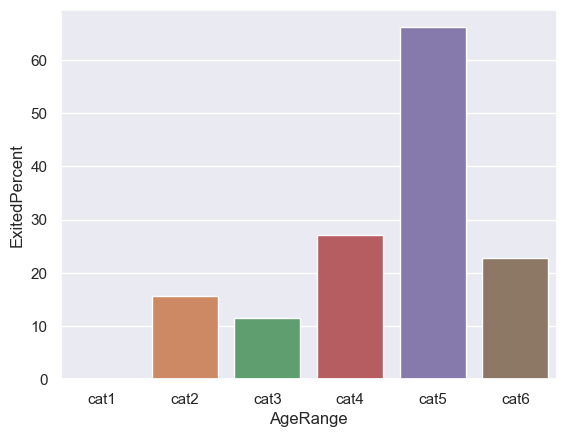

In [56]:
sns.barplot(x='AgeRange', y='ExitedPercent', data=edad_ger)

In [57]:
edad_ger.ExitedNum.sum()

814

**5.5 Análisis por país y rango de edad por variables más importantes**

Ahora que hemos identificado los rango etarios con mayor porpensión a la fuga, vamos a hacer un deepdive en las variables que nos puedan ayudar a identificar comportamientos o características que llevena los usuarios a cambiarse de entidad financiera. Para identificar estas variables empezamos separando las bases de datos por país y 3 rangos etarios con mayor porcentaje de fuga, y haremos una matriz de correlaciones. 

## España ##

En el caso de España los rangos etarios con mayor fuga son: 

+ **32-45:** Profesionales con experiencia y familias (cat4)
+ **46-65:** Profesionales consolidados y familias (cat5)
+ **65>:** Jubilados/pensionistas (cat6)

**32-45 (Cat4)**

In [58]:
cat4_esp = data_esp['AgeRange'] == 'cat4'
data_esp_cat4 = data_esp[cat4_esp]
data_esp_cat4

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,band4,bal4,cat4
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,band4,bal5,cat4
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,band5,bal4,cat4
14,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,band3,bal1,cat4
18,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0,band5,bal1,cat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,15566543,Aldridge,573,Spain,Male,44,9,0.00,2,1,0,107124.17,0,band4,bal1,cat4
9962,15594612,Flynn,702,Spain,Male,44,9,0.00,1,0,0,59207.41,1,band3,bal1,cat4
9966,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0,band2,bal5,cat4
9980,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,band4,bal3,cat4


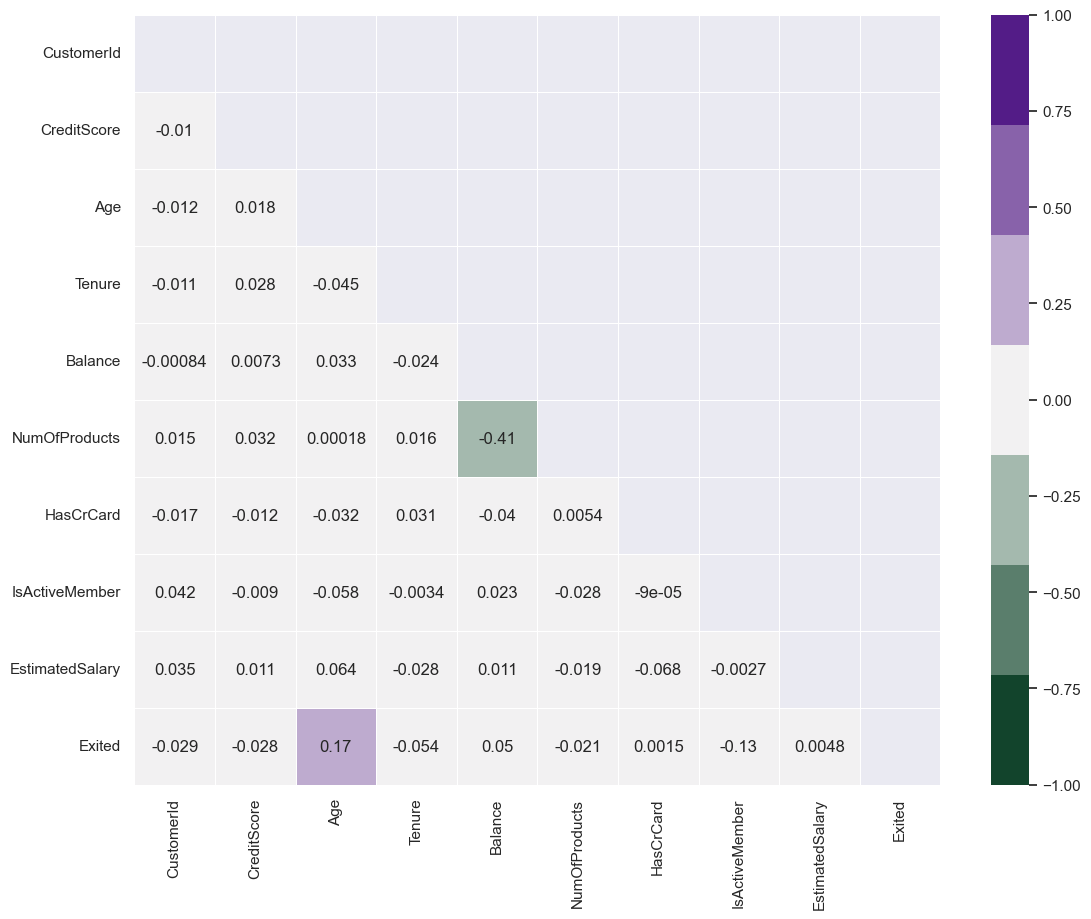

In [59]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_esp_cat4.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_esp_cat4.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [60]:
data_esp

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,band4,bal4,cat4
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,band4,bal5,cat4
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,band5,bal4,cat4
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,band4,bal1,cat2
14,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,band3,bal1,cat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0,band2,bal5,cat4
9980,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,band4,bal3,cat4
9987,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,band2,bal6,cat3
9989,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,band6,bal1,cat3


In [61]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_esp_cat4 = data_esp_cat4.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_esp_cat4.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_esp_cat4['ExitedTotal'] = fuga_esp_cat4.ExitedNum.sum()
fuga_esp_cat4['ExitedPercent'] = round(100*fuga_esp_cat4.ExitedNum/fuga_esp_cat4.ExitedTotal,2)

# Score

fuga_esp_cat4['MeanScore']= round(data_esp_cat4.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_esp_cat4['MeanProducts'] = round(data_esp_cat4.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_esp_cat4['MeanTenure'] = round(data_esp_cat4.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_esp_cat4['ActiveNum'] = data_esp_cat4.loc[data_esp_cat4.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_esp_cat4['ActivePercent'] = round(100*fuga_esp_cat4.ActiveNum/fuga_esp_cat4.ExitedNum,2)
fuga_esp_cat4['NoActiveNum'] = data_esp_cat4.loc[data_esp_cat4.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['NoActivePercent'] = round(100*fuga_esp_cat4.NoActiveNum/fuga_esp_cat4.ExitedNum,2)

# Credit Card

fuga_esp_cat4['CardNum'] = data_esp_cat4.loc[data_esp_cat4.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_esp_cat4['CardPercent'] = round(100*fuga_esp_cat4.CardNum/fuga_esp_cat4.ExitedNum,2)
fuga_esp_cat4['NoCardNum'] = data_esp_cat4.loc[data_esp_cat4.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['NoCardPercent'] = round(100*fuga_esp_cat4.NoCardNum/fuga_esp_cat4.ExitedNum,2)

# Balance

fuga_esp_cat4['Bal1Num'] = data_esp_cat4.loc[data_esp_cat4.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Bal1Percent'] = round(100*fuga_esp_cat4.Bal1Num/fuga_esp_cat4.ExitedNum,2)


fuga_esp_cat4['Bal2Num'] = data_esp_cat4.loc[data_esp_cat4.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_esp_cat4['Bal2Percent'] = round(100*fuga_esp_cat4.Bal2Num/fuga_esp_cat4.ExitedNum,2).fillna(0)


fuga_esp_cat4['Bal3Num'] = data_esp_cat4.loc[data_esp_cat4.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Bal3Percent'] = round(100*fuga_esp_cat4.Bal3Num/fuga_esp_cat4.ExitedNum,2)


fuga_esp_cat4['Bal4Num'] = data_esp_cat4.loc[data_esp_cat4.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Bal4Percent'] = round(100*fuga_esp_cat4.Bal4Num/fuga_esp_cat4.ExitedNum,2)


fuga_esp_cat4['Bal5Num'] = data_esp_cat4.loc[data_esp_cat4.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Bal5Percent'] = round(100*fuga_esp_cat4.Bal5Num/fuga_esp_cat4.ExitedNum,2)



fuga_esp_cat4['Bal6Num'] = data_esp_cat4.loc[data_esp_cat4.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Bal6Percent'] = round(100*fuga_esp_cat4.Bal6Num/fuga_esp_cat4.ExitedNum,2)


# Salary

fuga_esp_cat4['Band1Num'] = data_esp_cat4.loc[data_esp_cat4.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Band1Percent'] = round(100*fuga_esp_cat4.Band1Num/fuga_esp_cat4.ExitedNum,2).fillna(0)


fuga_esp_cat4['Band2Num'] = data_esp_cat4.loc[data_esp_cat4.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Band2Percent'] = round(100*fuga_esp_cat4.Band2Num/fuga_esp_cat4.ExitedNum,2).fillna(0)


fuga_esp_cat4['Band3Num'] = data_esp_cat4.loc[data_esp_cat4.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Band3Percent'] = round(100*fuga_esp_cat4.Band3Num/fuga_esp_cat4.ExitedNum,2).fillna(0)


fuga_esp_cat4['Band4Num'] = data_esp_cat4.loc[data_esp_cat4.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Band4Percent'] = round(100*fuga_esp_cat4.Band4Num/fuga_esp_cat4.ExitedNum,2).fillna(0)


fuga_esp_cat4['Band5Num'] = data_esp_cat4.loc[data_esp_cat4.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Band5Percent'] = round(100*fuga_esp_cat4.Band5Num/fuga_esp_cat4.ExitedNum,2).fillna(0)


fuga_esp_cat4['Band6Num'] = data_esp_cat4.loc[data_esp_cat4.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat4['Band6Percent'] = round(100*fuga_esp_cat4.Band6Num/fuga_esp_cat4.ExitedNum,2).fillna(0)

fuga_esp_cat4

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,1208,1385,87.22,653.79,1.54,5.08,625,51.74,583,48.26,837,69.29,371,30.71,605,50.08,1.0,0.08,36,2.98,325,26.9,221,18.29,20,1.66,NaN,0.0,157,13.00,278,23.01,342,28.31,290,24.01,141,11.67
1,1,177,1385,12.78,645.79,1.51,4.62,56,31.64,121,68.36,123,69.49,54,30.51,74,41.81,NaN,0.00,19,10.73,37,20.9,32,18.08,15,8.47,NaN,0.0,26,14.69,40,22.60,42,23.73,49,27.68,20,11.30


**46-65 (cat5)**

In [62]:
cat5_esp = data_esp['AgeRange'] == 'cat5'
data_esp_cat5 = data_esp[cat5_esp]
data_esp_cat5.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4.580000e+02,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,1.569421e+07,648.770742,52.713974,4.766376,66054.939323,1.497817,0.689956,0.606987,99021.352838,0.393013
std,6.984492e+04,96.478033,5.711429,2.859971,64171.893385,0.621458,0.463017,0.488954,56980.390574,0.488954
min,1.556669e+07,350.000000,46.000000,0.000000,0.000000,1.000000,0.000000,0.000000,753.370000,0.000000
25%,1.563530e+07,587.000000,48.000000,2.000000,0.000000,1.000000,0.000000,0.000000,49696.292500,0.000000
50%,1.569441e+07,648.000000,51.000000,5.000000,79061.410000,1.000000,1.000000,1.000000,97279.275000,0.000000
75%,1.575120e+07,709.750000,57.000000,7.000000,122821.402500,2.000000,1.000000,1.000000,150611.782500,1.000000
max,1.581544e+07,850.000000,66.000000,10.000000,216109.880000,4.000000,1.000000,1.000000,198874.520000,1.000000


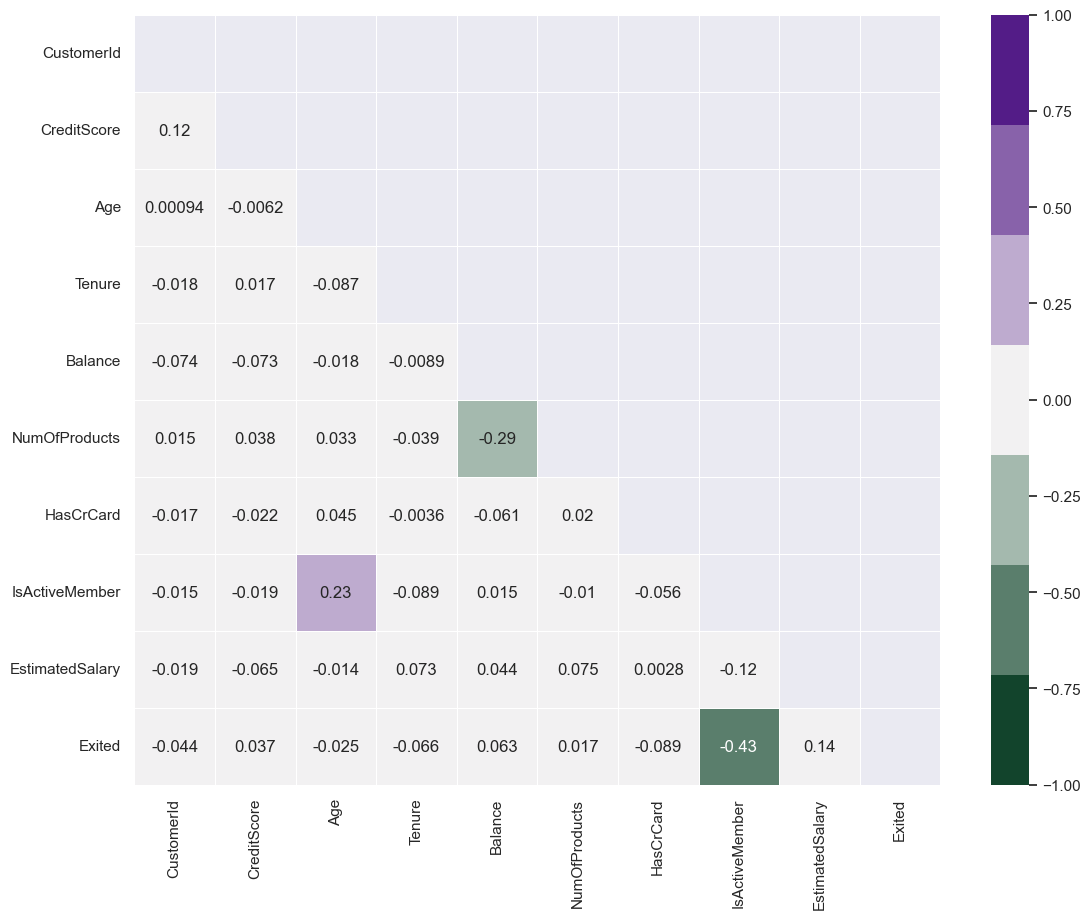

In [63]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_esp_cat5.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_esp_cat5.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [64]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_esp_cat5 = data_esp_cat5.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_esp_cat5.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_esp_cat5['ExitedTotal'] = fuga_esp_cat5.ExitedNum.sum()
fuga_esp_cat5['ExitedPercent'] = round(100*fuga_esp_cat5.ExitedNum/fuga_esp_cat5.ExitedTotal,2)

# Score

fuga_esp_cat5['MeanScore']= round(data_esp_cat5.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_esp_cat5['MeanProducts'] = round(data_esp_cat5.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_esp_cat5['MeanTenure'] = round(data_esp_cat5.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_esp_cat5['ActiveNum'] = data_esp_cat5.loc[data_esp_cat5.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_esp_cat5['ActivePercent'] = round(100*fuga_esp_cat5.ActiveNum/fuga_esp_cat5.ExitedNum,2)
fuga_esp_cat5['NoActiveNum'] = data_esp_cat5.loc[data_esp_cat5.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['NoActivePercent'] = round(100*fuga_esp_cat5.NoActiveNum/fuga_esp_cat5.ExitedNum,2)

# Credit Card

fuga_esp_cat5['CardNum'] = data_esp_cat5.loc[data_esp_cat5.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_esp_cat5['CardPercent'] = round(100*fuga_esp_cat5.CardNum/fuga_esp_cat5.ExitedNum,2)
fuga_esp_cat5['NoCardNum'] = data_esp_cat5.loc[data_esp_cat5.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['NoCardPercent'] = round(100*fuga_esp_cat5.NoCardNum/fuga_esp_cat5.ExitedNum,2)

# Balance

fuga_esp_cat5['Bal1Num'] = data_esp_cat5.loc[data_esp_cat5.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Bal1Percent'] = round(100*fuga_esp_cat5.Bal1Num/fuga_esp_cat5.ExitedNum,2)


fuga_esp_cat5['Bal2Num'] = data_esp_cat5.loc[data_esp_cat5.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_esp_cat5['Bal2Percent'] = round(100*fuga_esp_cat5.Bal2Num/fuga_esp_cat5.ExitedNum,2).fillna(0)


fuga_esp_cat5['Bal3Num'] = data_esp_cat5.loc[data_esp_cat5.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Bal3Percent'] = round(100*fuga_esp_cat5.Bal3Num/fuga_esp_cat5.ExitedNum,2)


fuga_esp_cat5['Bal4Num'] = data_esp_cat5.loc[data_esp_cat5.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Bal4Percent'] = round(100*fuga_esp_cat5.Bal4Num/fuga_esp_cat5.ExitedNum,2)


fuga_esp_cat5['Bal5Num'] = data_esp_cat5.loc[data_esp_cat5.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Bal5Percent'] = round(100*fuga_esp_cat5.Bal5Num/fuga_esp_cat5.ExitedNum,2)



fuga_esp_cat5['Bal6Num'] = data_esp_cat5.loc[data_esp_cat5.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Bal6Percent'] = round(100*fuga_esp_cat5.Bal6Num/fuga_esp_cat5.ExitedNum,2)


# Salary

fuga_esp_cat5['Band1Num'] = data_esp_cat5.loc[data_esp_cat5.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Band1Percent'] = round(100*fuga_esp_cat5.Band1Num/fuga_esp_cat5.ExitedNum,2).fillna(0)


fuga_esp_cat5['Band2Num'] = data_esp_cat5.loc[data_esp_cat5.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Band2Percent'] = round(100*fuga_esp_cat5.Band2Num/fuga_esp_cat5.ExitedNum,2).fillna(0)


fuga_esp_cat5['Band3Num'] = data_esp_cat5.loc[data_esp_cat5.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Band3Percent'] = round(100*fuga_esp_cat5.Band3Num/fuga_esp_cat5.ExitedNum,2).fillna(0)


fuga_esp_cat5['Band4Num'] = data_esp_cat5.loc[data_esp_cat5.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Band4Percent'] = round(100*fuga_esp_cat5.Band4Num/fuga_esp_cat5.ExitedNum,2).fillna(0)


fuga_esp_cat5['Band5Num'] = data_esp_cat5.loc[data_esp_cat5.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Band5Percent'] = round(100*fuga_esp_cat5.Band5Num/fuga_esp_cat5.ExitedNum,2).fillna(0)


fuga_esp_cat5['Band6Num'] = data_esp_cat5.loc[data_esp_cat5.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat5['Band6Percent'] = round(100*fuga_esp_cat5.Band6Num/fuga_esp_cat5.ExitedNum,2).fillna(0)

fuga_esp_cat5

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,278,458,60.7,645.93,1.49,4.92,216,77.70,62,22.30,201,72.30,77,27.70,132,47.48,1.0,0.36,5,1.80,77,27.70,59,21.22,5,1.80,NaN,0.0,35,12.59,88,31.65,68,24.46,52,18.71,35,12.59
1,1,180,458,39.3,653.16,1.51,4.53,62,34.44,118,65.56,115,63.89,65,36.11,72,40.00,NaN,0.00,11,6.11,52,28.89,36,20.00,8,4.44,NaN,0.0,13,7.22,39,21.67,49,27.22,59,32.78,20,11.11


**65< (cat6)**

In [65]:
cat6_esp = data_esp['AgeRange'] == 'cat6'
data_esp_cat6 = data_esp[cat6_esp]
data_esp_cat6.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1.570974e+07,672.706897,71.362069,5.448276,68056.155690,1.396552,0.689655,0.896552,106860.607759,0.103448
std,7.285942e+04,96.023391,4.290742,3.056040,66473.390226,0.493454,0.466675,0.307203,58202.817062,0.307203
min,1.557182e+07,476.000000,67.000000,0.000000,0.000000,1.000000,0.000000,0.000000,705.180000,0.000000
25%,1.565207e+07,607.000000,67.250000,3.000000,0.000000,1.000000,0.000000,1.000000,51652.910000,0.000000
50%,1.571802e+07,667.000000,71.000000,5.000000,93573.925000,1.000000,1.000000,1.000000,108987.410000,0.000000
75%,1.577599e+07,732.000000,74.000000,8.000000,127941.682500,2.000000,1.000000,1.000000,163117.872500,0.000000
max,1.581330e+07,850.000000,88.000000,10.000000,183744.980000,2.000000,1.000000,1.000000,198446.910000,1.000000


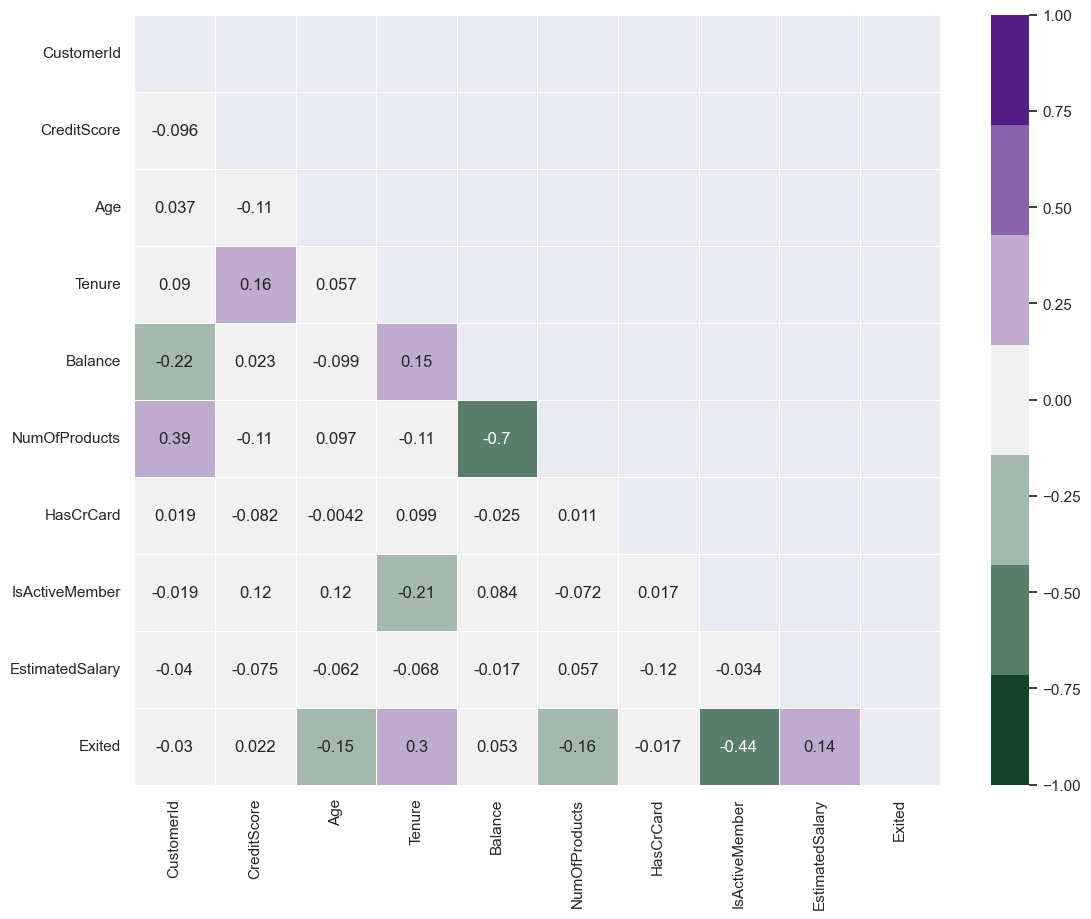

In [66]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_esp_cat6.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_esp_cat6.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [67]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_esp_cat6 = data_esp_cat6.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_esp_cat6.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_esp_cat6['ExitedTotal'] = fuga_esp_cat6.ExitedNum.sum()
fuga_esp_cat6['ExitedPercent'] = round(100*fuga_esp_cat6.ExitedNum/fuga_esp_cat6.ExitedTotal,2)

# Score

fuga_esp_cat6['MeanScore']= round(data_esp_cat6.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_esp_cat6['MeanProducts'] = round(data_esp_cat6.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_esp_cat6['MeanTenure'] = round(data_esp_cat6.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_esp_cat6['ActiveNum'] = data_esp_cat6.loc[data_esp_cat6.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_esp_cat6['ActivePercent'] = round(100*fuga_esp_cat6.ActiveNum/fuga_esp_cat6.ExitedNum,2)
fuga_esp_cat6['NoActiveNum'] = data_esp_cat6.loc[data_esp_cat6.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['NoActivePercent'] = round(100*fuga_esp_cat6.NoActiveNum/fuga_esp_cat6.ExitedNum,2)

# Credit Card

fuga_esp_cat6['CardNum'] = data_esp_cat6.loc[data_esp_cat6.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_esp_cat6['CardPercent'] = round(100*fuga_esp_cat6.CardNum/fuga_esp_cat6.ExitedNum,2)
fuga_esp_cat6['NoCardNum'] = data_esp_cat6.loc[data_esp_cat6.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['NoCardPercent'] = round(100*fuga_esp_cat6.NoCardNum/fuga_esp_cat6.ExitedNum,2)

# Balance

fuga_esp_cat6['Bal1Num'] = data_esp_cat6.loc[data_esp_cat6.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Bal1Percent'] = round(100*fuga_esp_cat6.Bal1Num/fuga_esp_cat6.ExitedNum,2)


fuga_esp_cat6['Bal2Num'] = data_esp_cat6.loc[data_esp_cat6.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_esp_cat6['Bal2Percent'] = round(100*fuga_esp_cat6.Bal2Num/fuga_esp_cat6.ExitedNum,2).fillna(0)


fuga_esp_cat6['Bal3Num'] = data_esp_cat6.loc[data_esp_cat6.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Bal3Percent'] = round(100*fuga_esp_cat6.Bal3Num/fuga_esp_cat6.ExitedNum,2)


fuga_esp_cat6['Bal4Num'] = data_esp_cat6.loc[data_esp_cat6.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Bal4Percent'] = round(100*fuga_esp_cat6.Bal4Num/fuga_esp_cat6.ExitedNum,2)


fuga_esp_cat6['Bal5Num'] = data_esp_cat6.loc[data_esp_cat6.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Bal5Percent'] = round(100*fuga_esp_cat6.Bal5Num/fuga_esp_cat6.ExitedNum,2)



fuga_esp_cat6['Bal6Num'] = data_esp_cat6.loc[data_esp_cat6.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Bal6Percent'] = round(100*fuga_esp_cat6.Bal6Num/fuga_esp_cat6.ExitedNum,2)


# Salary

fuga_esp_cat6['Band1Num'] = data_esp_cat6.loc[data_esp_cat6.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Band1Percent'] = round(100*fuga_esp_cat6.Band1Num/fuga_esp_cat6.ExitedNum,2).fillna(0)


fuga_esp_cat6['Band2Num'] = data_esp_cat6.loc[data_esp_cat6.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Band2Percent'] = round(100*fuga_esp_cat6.Band2Num/fuga_esp_cat6.ExitedNum,2).fillna(0)


fuga_esp_cat6['Band3Num'] = data_esp_cat6.loc[data_esp_cat6.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Band3Percent'] = round(100*fuga_esp_cat6.Band3Num/fuga_esp_cat6.ExitedNum,2).fillna(0)


fuga_esp_cat6['Band4Num'] = data_esp_cat6.loc[data_esp_cat6.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Band4Percent'] = round(100*fuga_esp_cat6.Band4Num/fuga_esp_cat6.ExitedNum,2).fillna(0)


fuga_esp_cat6['Band5Num'] = data_esp_cat6.loc[data_esp_cat6.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Band5Percent'] = round(100*fuga_esp_cat6.Band5Num/fuga_esp_cat6.ExitedNum,2).fillna(0)


fuga_esp_cat6['Band6Num'] = data_esp_cat6.loc[data_esp_cat6.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_esp_cat6['Band6Percent'] = round(100*fuga_esp_cat6.Band6Num/fuga_esp_cat6.ExitedNum,2).fillna(0)

fuga_esp_cat6

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,52,58,89.66,672.00,1.42,5.13,49,94.23,3,5.77,36,69.23,16,30.77,25,48.08,NaN,0.0,1.0,1.92,12.0,23.08,14,26.92,1.0,1.92,NaN,0.0,4.0,7.69,15.0,28.85,11,21.15,14.0,26.92,8,15.38
1,1,6,58,10.34,678.83,1.17,8.17,3,50.00,3,50.00,4,66.67,2,33.33,2,33.33,NaN,0.0,NaN,NaN,NaN,NaN,3,50.00,NaN,NaN,NaN,0.0,NaN,0.00,NaN,0.00,4,66.67,NaN,0.00,2,33.33


## Francia ##

En el caso de Francia los rangos etarios con mayor fuga son: 

+ **32-45:** Profesionales con experiencia y familias (cat4)
+ **46-65:** Profesionales consolidados y familias (cat5)
+ **65>:** Jubilados/pensionistas (cat6)

**32-45 (cat4)**

In [68]:
cat4_fra = data_fra['AgeRange'] == 'cat4'
data_fra_cat4 = data_fra[cat4_fra]
data_fra_cat4

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,band4,bal1,cat4
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,band4,bal5,cat4
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,band4,bal1,cat4
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,band3,bal5,cat4
12,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0,band3,bal1,cat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,15656710,Cocci,613,France,Male,40,4,0.00,1,0,0,151325.24,0,band5,bal1,cat4
9985,15586914,Nepean,659,France,Male,36,6,123841.49,2,1,0,96833.00,0,band4,bal4,cat4
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,band4,bal1,cat4
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,band4,bal3,cat4


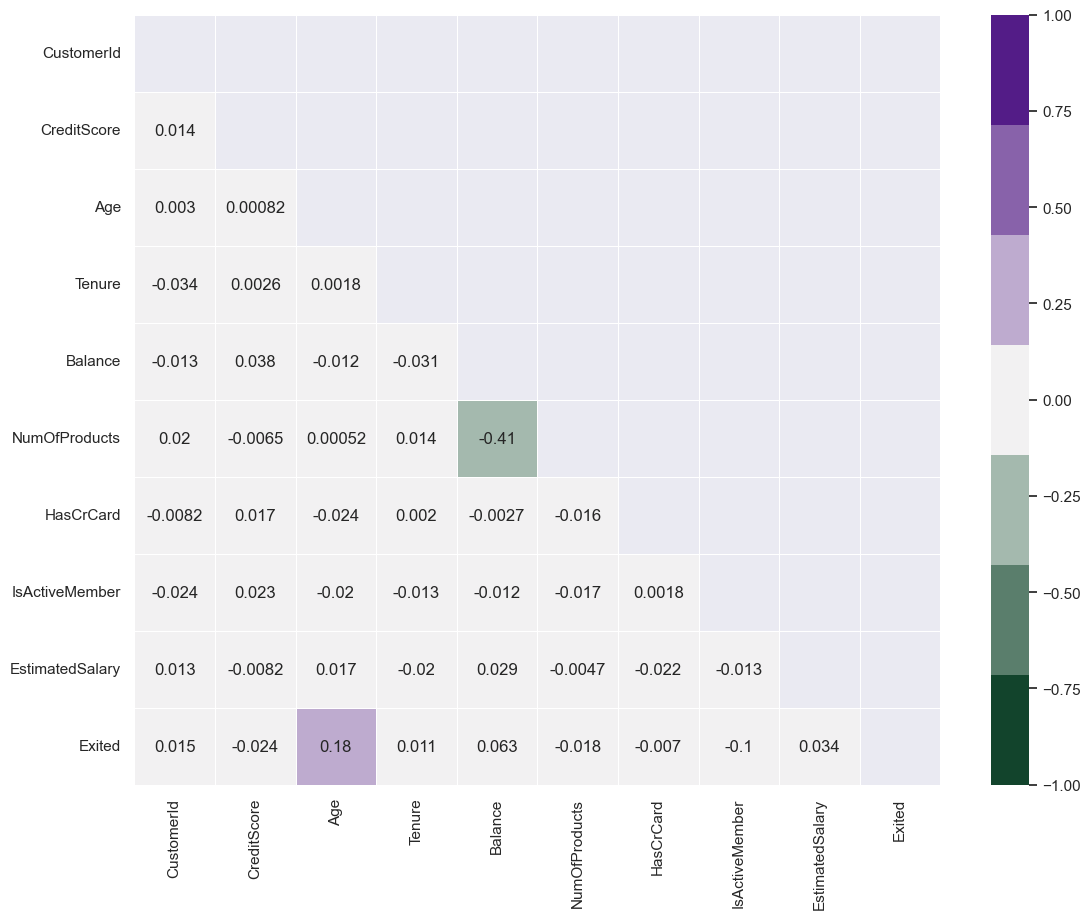

In [69]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_fra_cat4.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_fra_cat4.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [70]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_fra_cat4 = data_fra_cat4.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_fra_cat4.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_fra_cat4['ExitedTotal'] = fuga_fra_cat4.ExitedNum.sum()
fuga_fra_cat4['ExitedPercent'] = round(100*fuga_fra_cat4.ExitedNum/fuga_fra_cat4.ExitedTotal,2)

# Score

fuga_fra_cat4['MeanScore']= round(data_fra_cat4.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_fra_cat4['MeanProducts'] = round(data_fra_cat4.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_fra_cat4['MeanTenure'] = round(data_fra_cat4.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_fra_cat4['ActiveNum'] = data_fra_cat4.loc[data_fra_cat4.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_fra_cat4['ActivePercent'] = round(100*fuga_fra_cat4.ActiveNum/fuga_fra_cat4.ExitedNum,2)
fuga_fra_cat4['NoActiveNum'] = data_fra_cat4.loc[data_fra_cat4.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['NoActivePercent'] = round(100*fuga_fra_cat4.NoActiveNum/fuga_fra_cat4.ExitedNum,2)

# Credit Card

fuga_fra_cat4['CardNum'] = data_fra_cat4.loc[data_fra_cat4.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_fra_cat4['CardPercent'] = round(100*fuga_fra_cat4.CardNum/fuga_fra_cat4.ExitedNum,2)
fuga_fra_cat4['NoCardNum'] = data_fra_cat4.loc[data_fra_cat4.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['NoCardPercent'] = round(100*fuga_fra_cat4.NoCardNum/fuga_fra_cat4.ExitedNum,2)

# Balance

fuga_fra_cat4['Bal1Num'] = data_fra_cat4.loc[data_fra_cat4.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Bal1Percent'] = round(100*fuga_fra_cat4.Bal1Num/fuga_fra_cat4.ExitedNum,2)


fuga_fra_cat4['Bal2Num'] = data_fra_cat4.loc[data_fra_cat4.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_fra_cat4['Bal2Percent'] = round(100*fuga_fra_cat4.Bal2Num/fuga_fra_cat4.ExitedNum,2).fillna(0)


fuga_fra_cat4['Bal3Num'] = data_fra_cat4.loc[data_fra_cat4.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Bal3Percent'] = round(100*fuga_fra_cat4.Bal3Num/fuga_fra_cat4.ExitedNum,2)


fuga_fra_cat4['Bal4Num'] = data_fra_cat4.loc[data_fra_cat4.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Bal4Percent'] = round(100*fuga_fra_cat4.Bal4Num/fuga_fra_cat4.ExitedNum,2)


fuga_fra_cat4['Bal5Num'] = data_fra_cat4.loc[data_fra_cat4.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Bal5Percent'] = round(100*fuga_fra_cat4.Bal5Num/fuga_fra_cat4.ExitedNum,2)



fuga_fra_cat4['Bal6Num'] = data_fra_cat4.loc[data_fra_cat4.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Bal6Percent'] = round(100*fuga_fra_cat4.Bal6Num/fuga_fra_cat4.ExitedNum,2)


# Salary

fuga_fra_cat4['Band1Num'] = data_fra_cat4.loc[data_fra_cat4.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Band1Percent'] = round(100*fuga_fra_cat4.Band1Num/fuga_fra_cat4.ExitedNum,2).fillna(0)


fuga_fra_cat4['Band2Num'] = data_fra_cat4.loc[data_fra_cat4.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Band2Percent'] = round(100*fuga_fra_cat4.Band2Num/fuga_fra_cat4.ExitedNum,2).fillna(0)


fuga_fra_cat4['Band3Num'] = data_fra_cat4.loc[data_fra_cat4.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Band3Percent'] = round(100*fuga_fra_cat4.Band3Num/fuga_fra_cat4.ExitedNum,2).fillna(0)


fuga_fra_cat4['Band4Num'] = data_fra_cat4.loc[data_fra_cat4.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Band4Percent'] = round(100*fuga_fra_cat4.Band4Num/fuga_fra_cat4.ExitedNum,2).fillna(0)


fuga_fra_cat4['Band5Num'] = data_fra_cat4.loc[data_fra_cat4.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Band5Percent'] = round(100*fuga_fra_cat4.Band5Num/fuga_fra_cat4.ExitedNum,2).fillna(0)


fuga_fra_cat4['Band6Num'] = data_fra_cat4.loc[data_fra_cat4.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat4['Band6Percent'] = round(100*fuga_fra_cat4.Band6Num/fuga_fra_cat4.ExitedNum,2).fillna(0)

fuga_fra_cat4

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,2422,2778,87.19,649.44,1.53,4.98,1229,50.74,1193,49.26,1724,71.18,698,28.82,1187,49.01,1,0.04,84,3.47,601,24.81,501,20.69,48,1.98,NaN,0.0,293,12.10,597,24.65,678,27.99,579,23.91,275,11.35
1,1,356,2778,12.81,642.41,1.50,5.08,126,35.39,230,64.61,250,70.22,106,29.78,144,40.45,3,0.84,19,5.34,79,22.19,93,26.12,18,5.06,NaN,0.0,29,8.15,100,28.09,83,23.31,93,26.12,51,14.33


**46-65 (cat5)**

In [71]:
cat5_fra = data_fra['AgeRange'] == 'cat5'
data_fra_cat5 = data_fra[cat5_fra]
data_fra_cat5

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,band2,bal1,cat5
23,15725737,Mosman,669,France,Male,46,3,0.00,2,0,1,8487.75,0,band2,bal1,cat5
41,15738148,Clarke,465,France,Female,51,8,122522.32,1,0,0,181297.65,1,band6,bal4,cat5
42,15687946,Osborne,556,France,Female,61,2,117419.35,1,1,1,94153.83,0,band4,bal4,cat5
43,15755196,Lavine,834,France,Female,49,2,131394.56,1,0,0,194365.76,1,band6,bal5,cat5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0,band4,bal1,cat5
9956,15707861,Nucci,520,France,Female,46,10,85216.61,1,1,0,117369.52,1,band4,bal4,cat5
9967,15603794,Pugliesi,623,France,Male,48,5,118469.38,1,1,1,158590.25,0,band5,bal4,cat5
9979,15692664,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0,band2,bal4,cat5


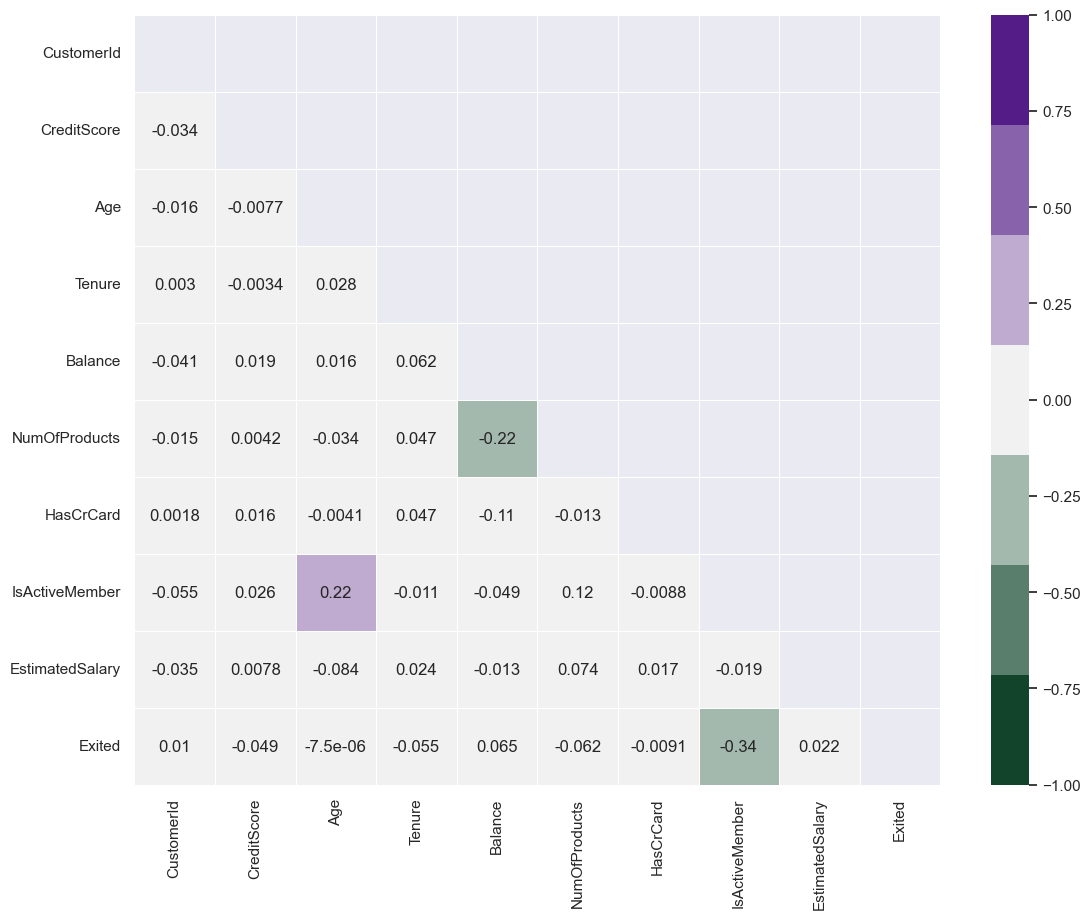

In [72]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_fra_cat5.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_fra_cat5.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [73]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_fra_cat5 = data_fra_cat5.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_fra_cat5.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_fra_cat5['ExitedTotal'] = fuga_fra_cat5.ExitedNum.sum()
fuga_fra_cat5['ExitedPercent'] = round(100*fuga_fra_cat5.ExitedNum/fuga_fra_cat5.ExitedTotal,2)

# Score

fuga_fra_cat5['MeanScore']= round(data_fra_cat5.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_fra_cat5['MeanProducts'] = round(data_fra_cat5.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_fra_cat5['MeanTenure'] = round(data_fra_cat5.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_fra_cat5['ActiveNum'] = data_fra_cat5.loc[data_fra_cat5.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_fra_cat5['ActivePercent'] = round(100*fuga_fra_cat5.ActiveNum/fuga_fra_cat5.ExitedNum,2)
fuga_fra_cat5['NoActiveNum'] = data_fra_cat5.loc[data_fra_cat5.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['NoActivePercent'] = round(100*fuga_fra_cat5.NoActiveNum/fuga_fra_cat5.ExitedNum,2)

# Credit Card

fuga_fra_cat5['CardNum'] = data_fra_cat5.loc[data_fra_cat5.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_fra_cat5['CardPercent'] = round(100*fuga_fra_cat5.CardNum/fuga_fra_cat5.ExitedNum,2)
fuga_fra_cat5['NoCardNum'] = data_fra_cat5.loc[data_fra_cat5.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['NoCardPercent'] = round(100*fuga_fra_cat5.NoCardNum/fuga_fra_cat5.ExitedNum,2)

# Balance

fuga_fra_cat5['Bal1Num'] = data_fra_cat5.loc[data_fra_cat5.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Bal1Percent'] = round(100*fuga_fra_cat5.Bal1Num/fuga_fra_cat5.ExitedNum,2)


fuga_fra_cat5['Bal2Num'] = data_fra_cat5.loc[data_fra_cat5.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_fra_cat5['Bal2Percent'] = round(100*fuga_fra_cat5.Bal2Num/fuga_fra_cat5.ExitedNum,2).fillna(0)


fuga_fra_cat5['Bal3Num'] = data_fra_cat5.loc[data_fra_cat5.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Bal3Percent'] = round(100*fuga_fra_cat5.Bal3Num/fuga_fra_cat5.ExitedNum,2)


fuga_fra_cat5['Bal4Num'] = data_fra_cat5.loc[data_fra_cat5.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Bal4Percent'] = round(100*fuga_fra_cat5.Bal4Num/fuga_fra_cat5.ExitedNum,2)


fuga_fra_cat5['Bal5Num'] = data_fra_cat5.loc[data_fra_cat5.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Bal5Percent'] = round(100*fuga_fra_cat5.Bal5Num/fuga_fra_cat5.ExitedNum,2)



fuga_fra_cat5['Bal6Num'] = data_fra_cat5.loc[data_fra_cat5.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Bal6Percent'] = round(100*fuga_fra_cat5.Bal6Num/fuga_fra_cat5.ExitedNum,2)


# Salary

fuga_fra_cat5['Band1Num'] = data_fra_cat5.loc[data_fra_cat5.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Band1Percent'] = round(100*fuga_fra_cat5.Band1Num/fuga_fra_cat5.ExitedNum,2).fillna(0)


fuga_fra_cat5['Band2Num'] = data_fra_cat5.loc[data_fra_cat5.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Band2Percent'] = round(100*fuga_fra_cat5.Band2Num/fuga_fra_cat5.ExitedNum,2).fillna(0)


fuga_fra_cat5['Band3Num'] = data_fra_cat5.loc[data_fra_cat5.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Band3Percent'] = round(100*fuga_fra_cat5.Band3Num/fuga_fra_cat5.ExitedNum,2).fillna(0)


fuga_fra_cat5['Band4Num'] = data_fra_cat5.loc[data_fra_cat5.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Band4Percent'] = round(100*fuga_fra_cat5.Band4Num/fuga_fra_cat5.ExitedNum,2).fillna(0)


fuga_fra_cat5['Band5Num'] = data_fra_cat5.loc[data_fra_cat5.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Band5Percent'] = round(100*fuga_fra_cat5.Band5Num/fuga_fra_cat5.ExitedNum,2).fillna(0)


fuga_fra_cat5['Band6Num'] = data_fra_cat5.loc[data_fra_cat5.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat5['Band6Percent'] = round(100*fuga_fra_cat5.Band6Num/fuga_fra_cat5.ExitedNum,2).fillna(0)

fuga_fra_cat5

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,486,866,56.12,649.82,1.53,5.21,348,71.60,138,28.40,343,70.58,143,29.42,238,48.97,NaN,0.0,23,4.73,130,26.75,90,18.52,5,1.03,NaN,0.0,54,11.11,133,27.37,129,26.54,123,25.31,47,9.67
1,1,380,866,43.88,640.12,1.45,4.88,143,37.63,237,62.37,265,69.74,115,30.26,164,43.16,NaN,0.0,29,7.63,98,25.79,75,19.74,14,3.68,NaN,0.0,53,13.95,86,22.63,97,25.53,92,24.21,52,13.68


**65< (cat6)**

In [74]:
cat6_fra = data_fra['AgeRange'] == 'cat6'
data_fra_cat6 = data_fra[cat6_fra]
data_fra_cat6

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
158,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0,band4,bal4,cat6
230,15808473,Ringrose,673,France,Male,72,1,0.00,2,0,1,111981.19,0,band4,bal1,cat6
234,15704769,Smith,585,France,Female,67,5,113978.97,2,0,1,93146.11,0,band4,bal4,cat6
252,15793726,Matveyeva,681,France,Female,79,0,0.00,2,0,1,170968.99,0,band5,bal1,cat6
310,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0,band6,bal1,cat6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9589,15669611,Mott,632,France,Male,71,3,83116.68,1,1,1,27597.76,0,band3,bal4,cat6
9593,15772216,Henry,738,France,Female,67,1,130652.52,1,0,1,22762.23,0,band2,bal5,cat6
9688,15730579,Ward,850,France,Male,68,5,169445.40,1,1,1,186335.07,0,band6,bal5,cat6
9894,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0,band3,bal1,cat6


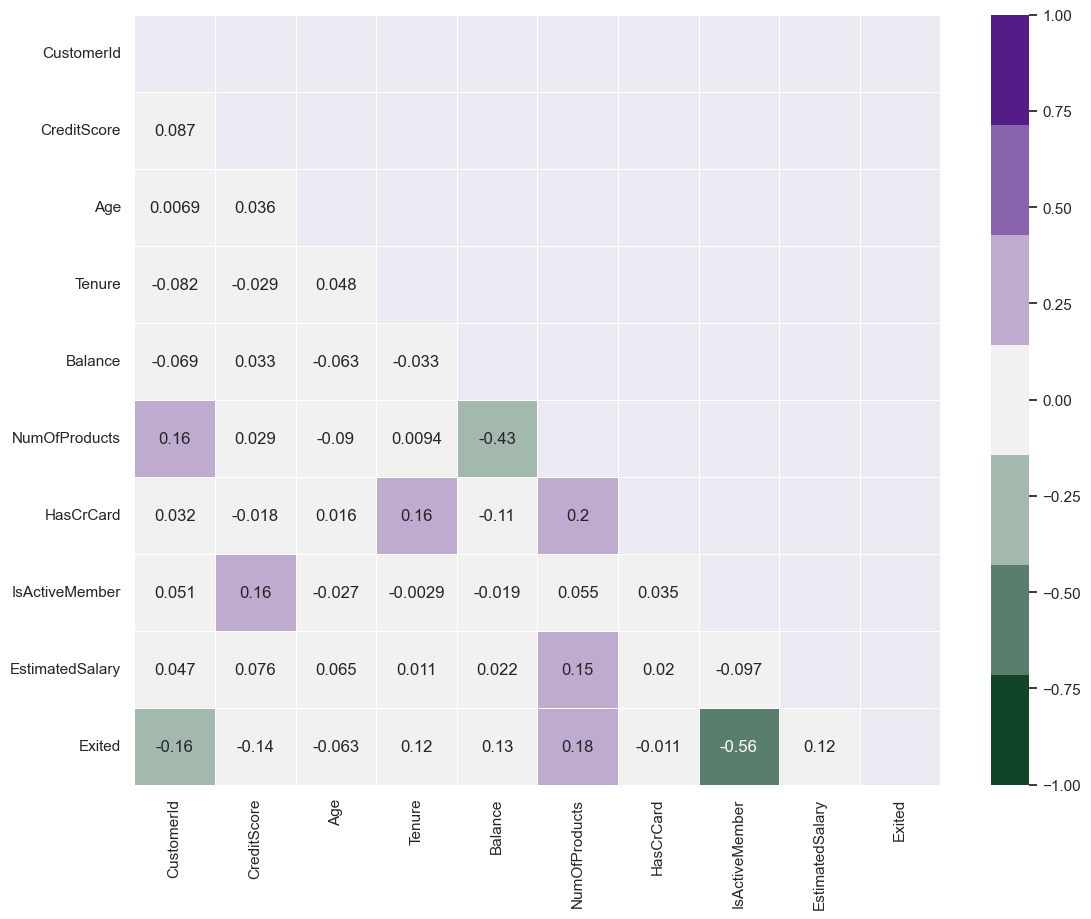

In [75]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_fra_cat6.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_fra_cat6.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [76]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_fra_cat6 = data_fra_cat6.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_fra_cat6.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_fra_cat6['ExitedTotal'] = fuga_fra_cat6.ExitedNum.sum()
fuga_fra_cat6['ExitedPercent'] = round(100*fuga_fra_cat6.ExitedNum/fuga_fra_cat6.ExitedTotal,2)

# Score

fuga_fra_cat6['MeanScore']= round(data_fra_cat6.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_fra_cat6['MeanProducts'] = round(data_fra_cat6.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_fra_cat6['MeanTenure'] = round(data_fra_cat6.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_fra_cat6['ActiveNum'] = data_fra_cat6.loc[data_fra_cat6.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_fra_cat6['ActivePercent'] = round(100*fuga_fra_cat6.ActiveNum/fuga_fra_cat6.ExitedNum,2)
fuga_fra_cat6['NoActiveNum'] = data_fra_cat6.loc[data_fra_cat6.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['NoActivePercent'] = round(100*fuga_fra_cat6.NoActiveNum/fuga_fra_cat6.ExitedNum,2)

# Credit Card

fuga_fra_cat6['CardNum'] = data_fra_cat6.loc[data_fra_cat6.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_fra_cat6['CardPercent'] = round(100*fuga_fra_cat6.CardNum/fuga_fra_cat6.ExitedNum,2)
fuga_fra_cat6['NoCardNum'] = data_fra_cat6.loc[data_fra_cat6.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['NoCardPercent'] = round(100*fuga_fra_cat6.NoCardNum/fuga_fra_cat6.ExitedNum,2)

# Balance

fuga_fra_cat6['Bal1Num'] = data_fra_cat6.loc[data_fra_cat6.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Bal1Percent'] = round(100*fuga_fra_cat6.Bal1Num/fuga_fra_cat6.ExitedNum,2)


fuga_fra_cat6['Bal2Num'] = data_fra_cat6.loc[data_fra_cat6.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_fra_cat6['Bal2Percent'] = round(100*fuga_fra_cat6.Bal2Num/fuga_fra_cat6.ExitedNum,2).fillna(0)


fuga_fra_cat6['Bal3Num'] = data_fra_cat6.loc[data_fra_cat6.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Bal3Percent'] = round(100*fuga_fra_cat6.Bal3Num/fuga_fra_cat6.ExitedNum,2)


fuga_fra_cat6['Bal4Num'] = data_fra_cat6.loc[data_fra_cat6.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Bal4Percent'] = round(100*fuga_fra_cat6.Bal4Num/fuga_fra_cat6.ExitedNum,2)


fuga_fra_cat6['Bal5Num'] = data_fra_cat6.loc[data_fra_cat6.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Bal5Percent'] = round(100*fuga_fra_cat6.Bal5Num/fuga_fra_cat6.ExitedNum,2)



fuga_fra_cat6['Bal6Num'] = data_fra_cat6.loc[data_fra_cat6.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Bal6Percent'] = round(100*fuga_fra_cat6.Bal6Num/fuga_fra_cat6.ExitedNum,2)


# Salary

fuga_fra_cat6['Band1Num'] = data_fra_cat6.loc[data_fra_cat6.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Band1Percent'] = round(100*fuga_fra_cat6.Band1Num/fuga_fra_cat6.ExitedNum,2).fillna(0)


fuga_fra_cat6['Band2Num'] = data_fra_cat6.loc[data_fra_cat6.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Band2Percent'] = round(100*fuga_fra_cat6.Band2Num/fuga_fra_cat6.ExitedNum,2).fillna(0)


fuga_fra_cat6['Band3Num'] = data_fra_cat6.loc[data_fra_cat6.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Band3Percent'] = round(100*fuga_fra_cat6.Band3Num/fuga_fra_cat6.ExitedNum,2).fillna(0)


fuga_fra_cat6['Band4Num'] = data_fra_cat6.loc[data_fra_cat6.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Band4Percent'] = round(100*fuga_fra_cat6.Band4Num/fuga_fra_cat6.ExitedNum,2).fillna(0)


fuga_fra_cat6['Band5Num'] = data_fra_cat6.loc[data_fra_cat6.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Band5Percent'] = round(100*fuga_fra_cat6.Band5Num/fuga_fra_cat6.ExitedNum,2).fillna(0)


fuga_fra_cat6['Band6Num'] = data_fra_cat6.loc[data_fra_cat6.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_fra_cat6['Band6Percent'] = round(100*fuga_fra_cat6.Band6Num/fuga_fra_cat6.ExitedNum,2).fillna(0)

fuga_fra_cat6

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,105,114,92.11,676.28,1.59,4.62,102,97.14,3,2.86,72,68.57,33,31.43,57,54.29,NaN,0.0,6.0,5.71,25,23.81,16,15.24,1,0.95,NaN,0.0,11,10.48,36,34.29,24.0,22.86,24,22.86,10,9.52
1,1,9,114,7.89,629.78,2.00,5.89,4,44.44,5,55.56,6,66.67,3,33.33,3,33.33,NaN,0.0,NaN,NaN,4,44.44,1,11.11,1,11.11,NaN,0.0,1,11.11,2,22.22,NaN,0.00,4,44.44,2,22.22


## Alemania ##

En el caso de Alemania los rangos etarios con mayor fuga son: 

+ **32-45:** Profesionales con experiencia y familias (cat4)
+ **46-65:** Profesionales consolidados y familias (cat5)
+ **65>:** Jubilados/pensionistas (cat6)

**32-45 (cat4)**

In [77]:
cat4_ger = data_ger['AgeRange'] == 'cat4'
data_ger_cat4 = data_ger[cat4_ger]
data_ger_cat4

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
15,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,band3,bal5,cat4
26,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,band5,bal5,cat4
28,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0,band4,bal5,cat4
32,15750181,Sanderson,553,Germany,Male,41,9,110112.54,2,0,0,81898.81,0,band4,bal4,cat4
39,15585768,Cameron,582,Germany,Male,41,6,70349.48,2,0,1,178074.04,0,band6,bal3,cat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,15733491,McGregor,512,Germany,Female,40,8,153537.57,2,0,0,23101.13,0,band2,bal5,cat4
9981,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,band3,bal5,cat4
9984,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,band3,bal4,cat4
9990,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,band3,bal3,cat4


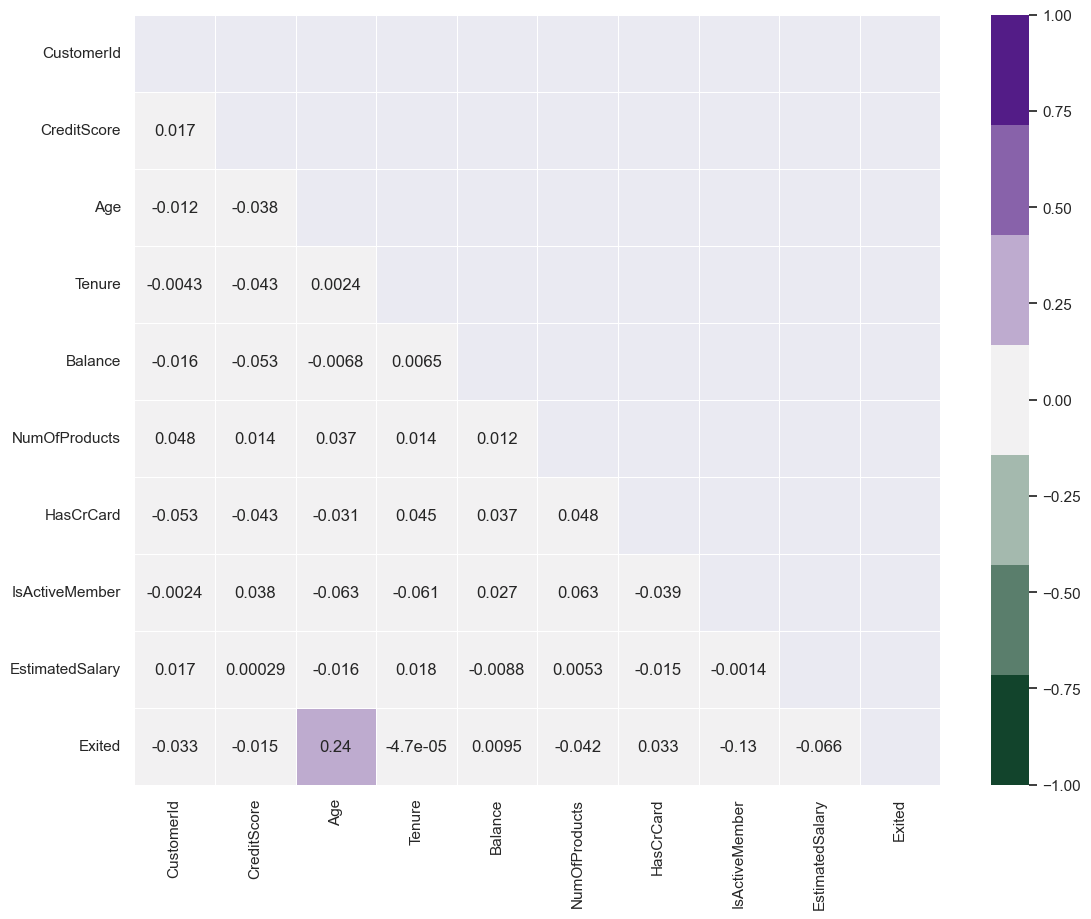

In [78]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_ger_cat4.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_ger_cat4.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [79]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_ger_cat4 = data_ger_cat4.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_ger_cat4.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_ger_cat4['ExitedTotal'] = fuga_ger_cat4.ExitedNum.sum()
fuga_ger_cat4['ExitedPercent'] = round(100*fuga_ger_cat4.ExitedNum/fuga_ger_cat4.ExitedTotal,2)

# Score

fuga_ger_cat4['MeanScore']= round(data_ger_cat4.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_ger_cat4['MeanProducts'] = round(data_ger_cat4.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_ger_cat4['MeanTenure'] = round(data_ger_cat4.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_ger_cat4['ActiveNum'] = data_ger_cat4.loc[data_ger_cat4.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_ger_cat4['ActivePercent'] = round(100*fuga_ger_cat4.ActiveNum/fuga_ger_cat4.ExitedNum,2)
fuga_ger_cat4['NoActiveNum'] = data_ger_cat4.loc[data_ger_cat4.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['NoActivePercent'] = round(100*fuga_ger_cat4.NoActiveNum/fuga_ger_cat4.ExitedNum,2)

# Credit Card

fuga_ger_cat4['CardNum'] = data_ger_cat4.loc[data_ger_cat4.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_ger_cat4['CardPercent'] = round(100*fuga_ger_cat4.CardNum/fuga_ger_cat4.ExitedNum,2)
fuga_ger_cat4['NoCardNum'] = data_ger_cat4.loc[data_ger_cat4.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['NoCardPercent'] = round(100*fuga_ger_cat4.NoCardNum/fuga_ger_cat4.ExitedNum,2)

# Balance

fuga_ger_cat4['Bal1Num'] = data_ger_cat4.loc[data_ger_cat4.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Bal1Percent'] = round(100*fuga_ger_cat4.Bal1Num/fuga_ger_cat4.ExitedNum,2)


fuga_ger_cat4['Bal2Num'] = data_ger_cat4.loc[data_ger_cat4.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_ger_cat4['Bal2Percent'] = round(100*fuga_ger_cat4.Bal2Num/fuga_ger_cat4.ExitedNum,2).fillna(0)


fuga_ger_cat4['Bal3Num'] = data_ger_cat4.loc[data_ger_cat4.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Bal3Percent'] = round(100*fuga_ger_cat4.Bal3Num/fuga_ger_cat4.ExitedNum,2)


fuga_ger_cat4['Bal4Num'] = data_ger_cat4.loc[data_ger_cat4.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Bal4Percent'] = round(100*fuga_ger_cat4.Bal4Num/fuga_ger_cat4.ExitedNum,2)


fuga_ger_cat4['Bal5Num'] = data_ger_cat4.loc[data_ger_cat4.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Bal5Percent'] = round(100*fuga_ger_cat4.Bal5Num/fuga_ger_cat4.ExitedNum,2)



fuga_ger_cat4['Bal6Num'] = data_ger_cat4.loc[data_ger_cat4.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Bal6Percent'] = round(100*fuga_ger_cat4.Bal6Num/fuga_ger_cat4.ExitedNum,2)


# Salary

fuga_ger_cat4['Band1Num'] = data_ger_cat4.loc[data_ger_cat4.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Band1Percent'] = round(100*fuga_ger_cat4.Band1Num/fuga_ger_cat4.ExitedNum,2).fillna(0)


fuga_ger_cat4['Band2Num'] = data_ger_cat4.loc[data_ger_cat4.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Band2Percent'] = round(100*fuga_ger_cat4.Band2Num/fuga_ger_cat4.ExitedNum,2).fillna(0)


fuga_ger_cat4['Band3Num'] = data_ger_cat4.loc[data_ger_cat4.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Band3Percent'] = round(100*fuga_ger_cat4.Band3Num/fuga_ger_cat4.ExitedNum,2).fillna(0)


fuga_ger_cat4['Band4Num'] = data_ger_cat4.loc[data_ger_cat4.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Band4Percent'] = round(100*fuga_ger_cat4.Band4Num/fuga_ger_cat4.ExitedNum,2).fillna(0)


fuga_ger_cat4['Band5Num'] = data_ger_cat4.loc[data_ger_cat4.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Band5Percent'] = round(100*fuga_ger_cat4.Band5Num/fuga_ger_cat4.ExitedNum,2).fillna(0)


fuga_ger_cat4['Band6Num'] = data_ger_cat4.loc[data_ger_cat4.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat4['Band6Percent'] = round(100*fuga_ger_cat4.Band6Num/fuga_ger_cat4.ExitedNum,2).fillna(0)

fuga_ger_cat4

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,988,1354,72.97,654.92,1.57,5.06,522,52.83,466,47.17,687,69.53,301,30.47,NaN,NaN,NaN,0.0,67,6.78,488,49.39,401,40.59,32,3.24,NaN,0.0,105,10.63,241,24.39,247,25.00,252,25.51,143,14.47
1,1,366,1354,27.03,651.50,1.51,5.06,141,38.52,225,61.48,267,72.95,99,27.05,NaN,NaN,NaN,0.0,4,1.09,221,60.38,140,38.25,1,0.27,NaN,0.0,51,13.93,110,30.05,81,22.13,70,19.13,54,14.75


**46-65 (cat5)**

In [80]:
cat5_ger = data_ger['AgeRange'] == 'cat5'
data_ger_cat5 = data_ger[cat5_ger]
data_ger_cat5

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,band2,bal5,cat5
70,15703793,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1,band3,bal5,cat5
123,15760085,Calabresi,684,Germany,Female,48,10,126384.42,1,1,1,198129.36,0,band6,bal5,cat5
127,15782688,Piccio,625,Germany,Male,56,0,148507.24,1,1,0,46824.08,1,band3,bal5,cat5
135,15584518,Arthur,589,Germany,Female,50,5,144895.05,2,1,1,34941.23,0,band3,bal5,cat5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,15578865,Palerma,632,Germany,Female,50,5,107959.39,1,1,1,6985.34,1,band2,bal4,cat5
9948,15735078,Onwughara,724,Germany,Female,53,1,139687.66,2,1,1,12913.92,0,band2,bal5,cat5
9975,15666295,Smith,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1,band6,bal4,cat5
9982,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,band4,bal5,cat5


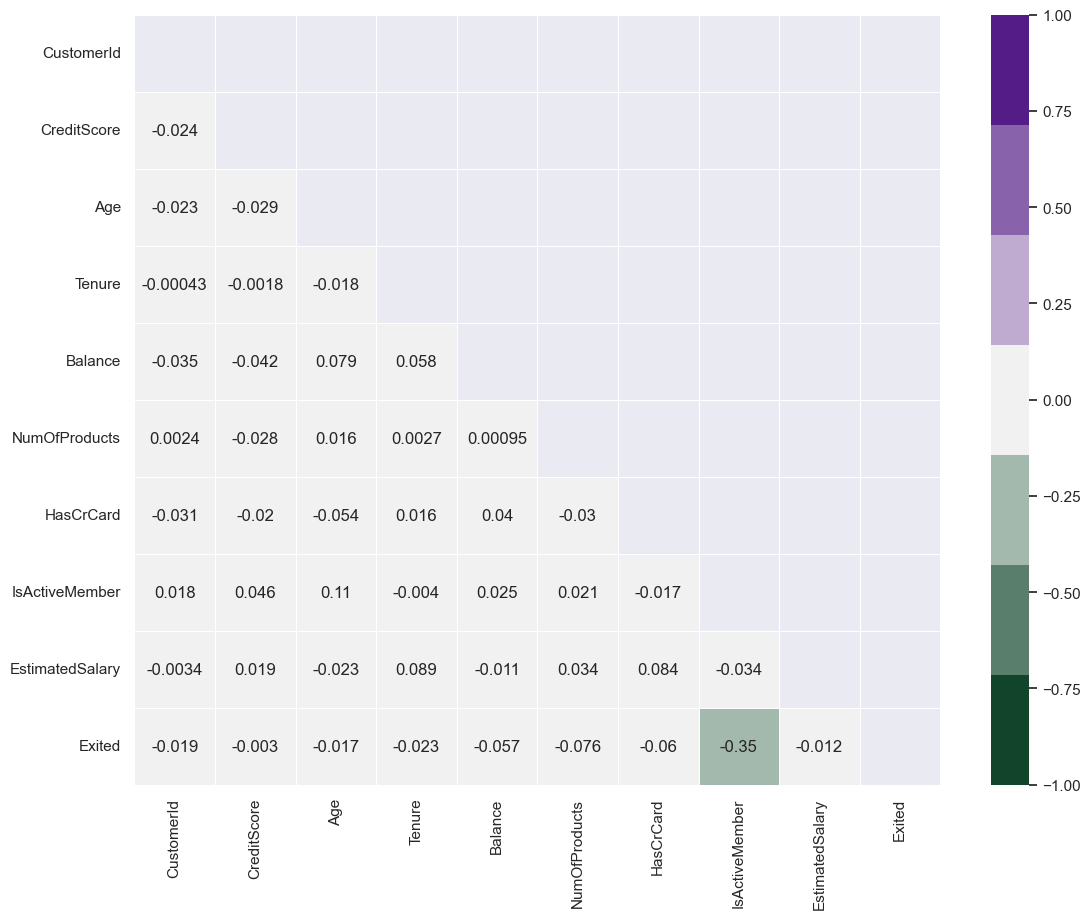

In [81]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_ger_cat5.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_ger_cat5.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [82]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_ger_cat5 = data_ger_cat5.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_ger_cat5.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_ger_cat5['ExitedTotal'] = fuga_ger_cat5.ExitedNum.sum()
fuga_ger_cat5['ExitedPercent'] = round(100*fuga_ger_cat5.ExitedNum/fuga_ger_cat5.ExitedTotal,2)

# Score

fuga_ger_cat5['MeanScore']= round(data_ger_cat5.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_ger_cat5['MeanProducts'] = round(data_ger_cat5.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_ger_cat5['MeanTenure'] = round(data_ger_cat5.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_ger_cat5['ActiveNum'] = data_ger_cat5.loc[data_ger_cat5.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_ger_cat5['ActivePercent'] = round(100*fuga_ger_cat5.ActiveNum/fuga_ger_cat5.ExitedNum,2)
fuga_ger_cat5['NoActiveNum'] = data_ger_cat5.loc[data_ger_cat5.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['NoActivePercent'] = round(100*fuga_ger_cat5.NoActiveNum/fuga_ger_cat5.ExitedNum,2)

# Credit Card

fuga_ger_cat5['CardNum'] = data_ger_cat5.loc[data_ger_cat5.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_ger_cat5['CardPercent'] = round(100*fuga_ger_cat5.CardNum/fuga_ger_cat5.ExitedNum,2)
fuga_ger_cat5['NoCardNum'] = data_ger_cat5.loc[data_ger_cat5.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['NoCardPercent'] = round(100*fuga_ger_cat5.NoCardNum/fuga_ger_cat5.ExitedNum,2)

# Balance

fuga_ger_cat5['Bal1Num'] = data_ger_cat5.loc[data_ger_cat5.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Bal1Percent'] = round(100*fuga_ger_cat5.Bal1Num/fuga_ger_cat5.ExitedNum,2)


fuga_ger_cat5['Bal2Num'] = data_ger_cat5.loc[data_ger_cat5.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_ger_cat5['Bal2Percent'] = round(100*fuga_ger_cat5.Bal2Num/fuga_ger_cat5.ExitedNum,2).fillna(0)


fuga_ger_cat5['Bal3Num'] = data_ger_cat5.loc[data_ger_cat5.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Bal3Percent'] = round(100*fuga_ger_cat5.Bal3Num/fuga_ger_cat5.ExitedNum,2)


fuga_ger_cat5['Bal4Num'] = data_ger_cat5.loc[data_ger_cat5.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Bal4Percent'] = round(100*fuga_ger_cat5.Bal4Num/fuga_ger_cat5.ExitedNum,2)


fuga_ger_cat5['Bal5Num'] = data_ger_cat5.loc[data_ger_cat5.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Bal5Percent'] = round(100*fuga_ger_cat5.Bal5Num/fuga_ger_cat5.ExitedNum,2)



fuga_ger_cat5['Bal6Num'] = data_ger_cat5.loc[data_ger_cat5.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Bal6Percent'] = round(100*fuga_ger_cat5.Bal6Num/fuga_ger_cat5.ExitedNum,2)


# Salary

fuga_ger_cat5['Band1Num'] = data_ger_cat5.loc[data_ger_cat5.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Band1Percent'] = round(100*fuga_ger_cat5.Band1Num/fuga_ger_cat5.ExitedNum,2).fillna(0)


fuga_ger_cat5['Band2Num'] = data_ger_cat5.loc[data_ger_cat5.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Band2Percent'] = round(100*fuga_ger_cat5.Band2Num/fuga_ger_cat5.ExitedNum,2).fillna(0)


fuga_ger_cat5['Band3Num'] = data_ger_cat5.loc[data_ger_cat5.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Band3Percent'] = round(100*fuga_ger_cat5.Band3Num/fuga_ger_cat5.ExitedNum,2).fillna(0)


fuga_ger_cat5['Band4Num'] = data_ger_cat5.loc[data_ger_cat5.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Band4Percent'] = round(100*fuga_ger_cat5.Band4Num/fuga_ger_cat5.ExitedNum,2).fillna(0)


fuga_ger_cat5['Band5Num'] = data_ger_cat5.loc[data_ger_cat5.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Band5Percent'] = round(100*fuga_ger_cat5.Band5Num/fuga_ger_cat5.ExitedNum,2).fillna(0)


fuga_ger_cat5['Band6Num'] = data_ger_cat5.loc[data_ger_cat5.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat5['Band6Percent'] = round(100*fuga_ger_cat5.Band6Num/fuga_ger_cat5.ExitedNum,2).fillna(0)

fuga_ger_cat5

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,189,558,33.87,644.17,1.51,5.11,135,71.43,54,28.57,141,74.60,48,25.40,NaN,NaN,NaN,0.0,8,4.23,91,48.15,83,43.92,7.0,3.7,NaN,0.0,18,9.52,52,27.51,50,26.46,41,21.69,28,14.81
1,1,369,558,66.13,643.55,1.40,4.97,128,34.69,241,65.31,254,68.83,115,31.17,NaN,NaN,NaN,0.0,3,0.81,220,59.62,146,39.57,NaN,NaN,NaN,0.0,47,12.74,88,23.85,89,24.12,98,26.56,47,12.74


**65< (cat6)**

In [83]:
cat6_ger = data_ger['AgeRange'] == 'cat6'
data_ger_cat6 = data_ger[cat6_ger]
data_ger_cat6.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,BalanceRange,AgeRange
243,15596175,McIntosh,659,Germany,Male,67,6,117411.60,1,1,1,45071.09,1,band3,bal4,cat6
371,15774696,Cole,640,Germany,Female,75,1,106307.91,2,0,1,113428.77,0,band4,bal4,cat6
888,15702968,Artemieva,733,Germany,Male,74,3,106545.53,1,1,1,134589.58,0,band5,bal4,cat6
969,15605926,Sinclair,649,Germany,Male,70,9,116854.71,2,0,1,107125.79,0,band4,bal4,cat6
1790,15625641,Forbes,697,Germany,Female,74,3,108071.36,2,1,1,16445.79,0,band2,bal4,cat6


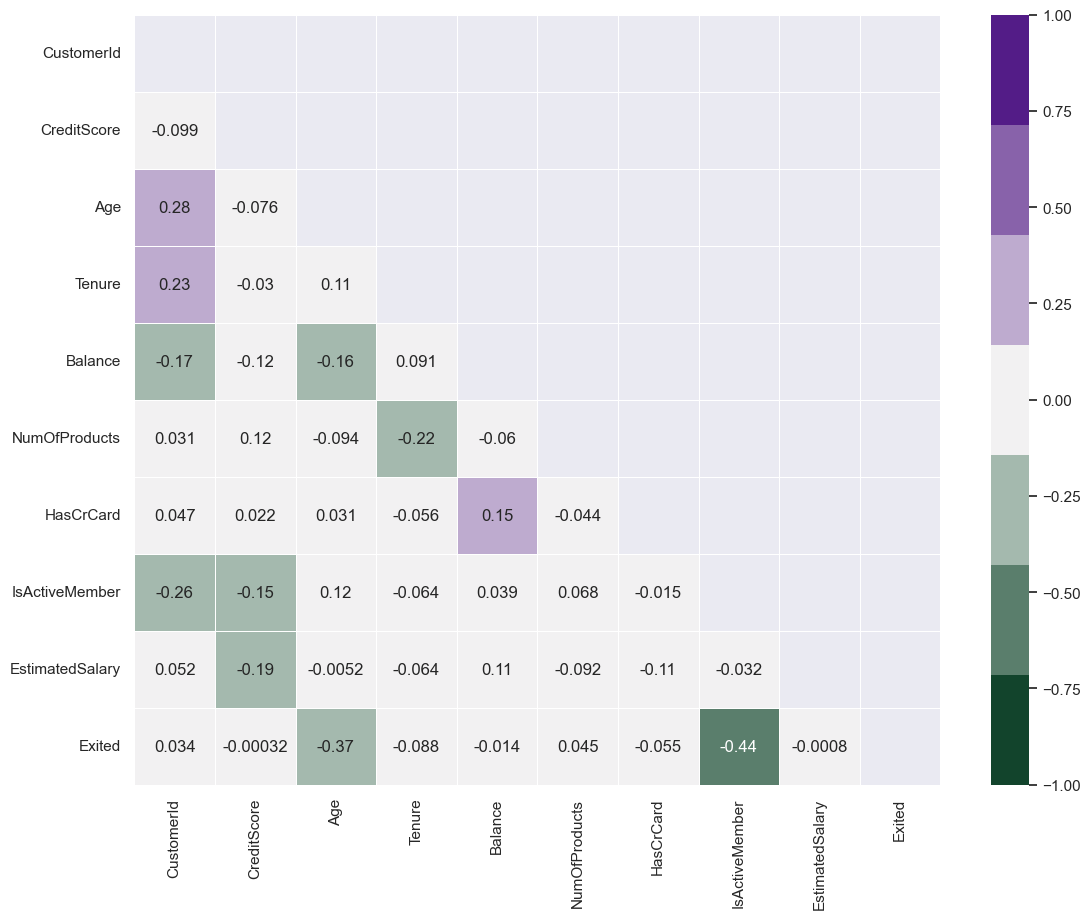

In [84]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(data_ger_cat6.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(data_ger_cat6.corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

In [85]:
# Creo una tabla separando a los que clientes que se fugaron y los que no
fuga_ger_cat6 = data_ger_cat6.groupby('Exited', as_index=False).count()[['Exited', 'CustomerId']]
fuga_ger_cat6.rename(columns={'CustomerId':'ExitedNum'}, inplace=True)

# Exited

fuga_ger_cat6['ExitedTotal'] = fuga_ger_cat6.ExitedNum.sum()
fuga_ger_cat6['ExitedPercent'] = round(100*fuga_ger_cat6.ExitedNum/fuga_ger_cat6.ExitedTotal,2)

# Score

fuga_ger_cat6['MeanScore']= round(data_ger_cat6.groupby('Exited', as_index=False).mean('CreditScore')[['CreditScore']],2)

#Product

fuga_ger_cat6['MeanProducts'] = round(data_ger_cat6.groupby('Exited', as_index=False).mean('NumOfProducts')[['NumOfProducts']],2)

# Tenure

fuga_ger_cat6['MeanTenure'] = round(data_ger_cat6.groupby('Exited', as_index=False).mean('Tenure')[['Tenure']],2)

# Active member

fuga_ger_cat6['ActiveNum'] = data_ger_cat6.loc[data_ger_cat6.IsActiveMember == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_ger_cat6['ActivePercent'] = round(100*fuga_ger_cat6.ActiveNum/fuga_ger_cat6.ExitedNum,2)
fuga_ger_cat6['NoActiveNum'] = data_ger_cat6.loc[data_ger_cat6.IsActiveMember == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['NoActivePercent'] = round(100*fuga_ger_cat6.NoActiveNum/fuga_ger_cat6.ExitedNum,2)

# Credit Card

fuga_ger_cat6['CardNum'] = data_ger_cat6.loc[data_ger_cat6.HasCrCard == 1].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]

fuga_ger_cat6['CardPercent'] = round(100*fuga_ger_cat6.CardNum/fuga_ger_cat6.ExitedNum,2)
fuga_ger_cat6['NoCardNum'] = data_ger_cat6.loc[data_ger_cat6.HasCrCard == 0].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['NoCardPercent'] = round(100*fuga_ger_cat6.NoCardNum/fuga_ger_cat6.ExitedNum,2)

# Balance

fuga_ger_cat6['Bal1Num'] = data_ger_cat6.loc[data_ger_cat6.BalanceRange == 'bal1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Bal1Percent'] = round(100*fuga_ger_cat6.Bal1Num/fuga_ger_cat6.ExitedNum,2)


fuga_ger_cat6['Bal2Num'] = data_ger_cat6.loc[data_ger_cat6.BalanceRange == 'bal2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']].fillna(0)
fuga_ger_cat6['Bal2Percent'] = round(100*fuga_ger_cat6.Bal2Num/fuga_ger_cat6.ExitedNum,2).fillna(0)


fuga_ger_cat6['Bal3Num'] = data_ger_cat6.loc[data_ger_cat6.BalanceRange == 'bal3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Bal3Percent'] = round(100*fuga_ger_cat6.Bal3Num/fuga_ger_cat6.ExitedNum,2)


fuga_ger_cat6['Bal4Num'] = data_ger_cat6.loc[data_ger_cat6.BalanceRange == 'bal4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Bal4Percent'] = round(100*fuga_ger_cat6.Bal4Num/fuga_ger_cat6.ExitedNum,2)


fuga_ger_cat6['Bal5Num'] = data_ger_cat6.loc[data_ger_cat6.BalanceRange == 'bal5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Bal5Percent'] = round(100*fuga_ger_cat6.Bal5Num/fuga_ger_cat6.ExitedNum,2)



fuga_ger_cat6['Bal6Num'] = data_ger_cat6.loc[data_ger_cat6.BalanceRange == 'bal6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Bal6Percent'] = round(100*fuga_ger_cat6.Bal6Num/fuga_ger_cat6.ExitedNum,2)


# Salary

fuga_ger_cat6['Band1Num'] = data_ger_cat6.loc[data_ger_cat6.SalaryRange == 'band1'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Band1Percent'] = round(100*fuga_ger_cat6.Band1Num/fuga_ger_cat6.ExitedNum,2).fillna(0)


fuga_ger_cat6['Band2Num'] = data_ger_cat6.loc[data_ger_cat6.SalaryRange == 'band2'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Band2Percent'] = round(100*fuga_ger_cat6.Band2Num/fuga_ger_cat6.ExitedNum,2).fillna(0)


fuga_ger_cat6['Band3Num'] = data_ger_cat6.loc[data_ger_cat6.SalaryRange == 'band3'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Band3Percent'] = round(100*fuga_ger_cat6.Band3Num/fuga_ger_cat6.ExitedNum,2).fillna(0)


fuga_ger_cat6['Band4Num'] = data_ger_cat6.loc[data_ger_cat6.SalaryRange == 'band4'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Band4Percent'] = round(100*fuga_ger_cat6.Band4Num/fuga_ger_cat6.ExitedNum,2).fillna(0)


fuga_ger_cat6['Band5Num'] = data_ger_cat6.loc[data_ger_cat6.SalaryRange == 'band5'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Band5Percent'] = round(100*fuga_ger_cat6.Band5Num/fuga_ger_cat6.ExitedNum,2).fillna(0)


fuga_ger_cat6['Band6Num'] = data_ger_cat6.loc[data_ger_cat6.SalaryRange == 'band6'].groupby('Exited', 
                                                                                             as_index=False).count()[['CustomerId']]
fuga_ger_cat6['Band6Percent'] = round(100*fuga_ger_cat6.Band6Num/fuga_ger_cat6.ExitedNum,2).fillna(0)

fuga_ger_cat6

,Exited,ExitedNum,ExitedTotal,ExitedPercent,MeanScore,MeanProducts,MeanTenure,ActiveNum,ActivePercent,NoActiveNum,NoActivePercent,CardNum,CardPercent,NoCardNum,NoCardPercent,Bal1Num,Bal1Percent,Bal2Num,Bal2Percent,Bal3Num,Bal3Percent,Bal4Num,Bal4Percent,Bal5Num,Bal5Percent,Bal6Num,Bal6Percent,Band1Num,Band1Percent,Band2Num,Band2Percent,Band3Num,Band3Percent,Band4Num,Band4Percent,Band5Num,Band5Percent,Band6Num,Band6Percent
0,0,44,57,77.19,656.84,1.48,5.20,39,88.64,5,11.36,33,75.00,11,25.00,NaN,NaN,NaN,0.0,5,11.36,23,52.27,14,31.82,2.0,4.55,NaN,0.0,7,15.91,12,27.27,12,27.27,4,9.09,9,20.45
1,1,13,57,22.81,656.77,1.54,4.62,6,46.15,7,53.85,9,69.23,4,30.77,NaN,NaN,NaN,0.0,1,7.69,9,69.23,3,23.08,NaN,NaN,NaN,0.0,1,7.69,5,38.46,4,30.77,1,7.69,2,15.38


## **6. Preparación de variables para el modelaje**

6.1 Importamos librerias necesarias para el procesado de datos:

In [86]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

6.2 Volvemos a ver las variables disponibles y vemos cuales tiene sentido quitar antes de modelar:

In [87]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeRange,SalaryRange,BalanceRange
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,cat4,band4,bal1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,cat4,band4,bal4
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,cat4,band4,bal5
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,cat4,band4,bal1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,cat4,band4,bal5


In [88]:
# Función data report del toolbox (credits Jaime)

def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T

In [89]:
data_report(data)

COL_N,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeRange,SalaryRange,BalanceRange
DATA_TYPE,int64,object,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64,category,category,category
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,10000,2932,460,3,2,70,11,6382,4,2,2,9999,2,5,5,6
CARDIN (%),100.0,29.32,4.6,0.03,0.02,0.7,0.11,63.82,0.04,0.02,0.02,99.99,0.02,0.05,0.05,0.06


In [90]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'AgeRange', 'SalaryRange', 'BalanceRange'],
      dtype='object')

In [91]:
exclude_columns = ["CustomerId", "Surname", "AgeRange", "SalaryRange", "BalanceRange"]

6.3 Separamos el data set entre train y test

In [92]:
features = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'AgeRange', 'SalaryRange', 'BalanceRange']
X = data.loc[:, features]
y = data.loc[:, ['Exited']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [93]:
print("Num_registros Train",len(X_train))
print("Num_registros Test", len(X_test))

Num_registros Train 8000
Num_registros Test 2000


Nos aseguramos que los datasets de train y test están balanceados

In [94]:
y_train.Exited.value_counts(normalize=True)

0    0.79625
1    0.20375
Name: Exited, dtype: float64

In [95]:
y_test.Exited.value_counts(normalize=True)

0    0.7965
1    0.2035
Name: Exited, dtype: float64

<AxesSubplot:>

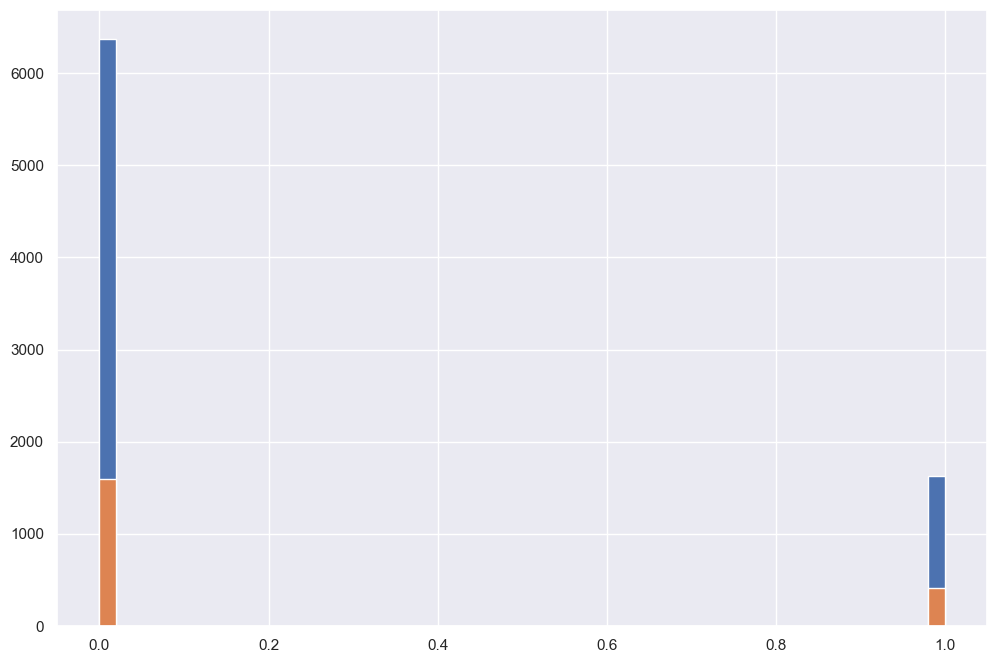

In [96]:
plt.xlabel = "EXITED"
y_train.Exited.hist(bins=50, figsize=(12, 8))
y_test.Exited.hist(bins=50, figsize=(12, 8))

6.4 Empezamos con la preparación del dataset con el uso de pipelines:

6.4.1. Variables que excluir

In [97]:
exclude_columns = ["CustomerId", "Surname", "AgeRange", "SalaryRange", "BalanceRange"]

6.4.2 Variables Categóricas

In [98]:
cat_var = ['Geography', 'Gender']

6.4.3. Variables Numéricas

In [99]:
num_var = ['CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']

6.4.4. Pipeline para el procesado de datos

In [100]:
cat_pipeline = Pipeline(
    [("Impute_Mode", SimpleImputer(strategy = "most_frequent")),
     ("OHEncoder", OneHotEncoder())])



num_pipeline = Pipeline(
    [("Impute_Mean", SimpleImputer(strategy = "mean")),
     ("SScaler", StandardScaler())])


preprocessing = ColumnTransformer(
    [("Process_Categorical", cat_pipeline, cat_var),
     ("Impute_Numeric", num_pipeline, num_var),
     ("Exclude", "drop", exclude_columns)
    ], remainder = "passthrough")

In [101]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Process_Categorical',
                                 Pipeline(steps=[('Impute_Mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHEncoder',
                                                  OneHotEncoder())]),
                                 ['Geography', 'Gender']),
                                ('Impute_Numeric',
                                 Pipeline(steps=[('Impute_Mean',
                                                  SimpleImputer()),
                                                 ('SScaler',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                      

In [102]:
pipe_train = preprocessing.fit_transform(X_train)

In [103]:
pipe_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.64104192,
        -1.030206  ,  1.04208392],
       [ 0.        ,  1.        ,  0.        , ...,  0.64104192,
        -1.030206  , -0.62355635],
       [ 0.        ,  1.        ,  0.        , ...,  0.64104192,
         0.97067965,  0.30812779],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.64104192,
         0.97067965, -0.55808767],
       [ 0.        ,  0.        ,  1.        , ...,  0.64104192,
        -1.030206  , -1.35149956],
       [ 0.        ,  0.        ,  1.        , ..., -1.55996038,
         0.97067965, -1.02692216]])

## **7. Modelaje**

7.1 Importamos los modelos que vamos a necesitar:

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import re

7.2 Vamos a probar distintos modelos para ver cual nos da mejor accuracy en train:

In [105]:
logistic_pipeline = Pipeline(
    [("Preprocesado", preprocessing),
     ("Modelo", LogisticRegression())
    ])

random_pipeline = Pipeline(
    [("Preprocesado", preprocessing),
     ("Modelo", RandomForestClassifier())
    ])

xgb_pipeline = Pipeline(
    [("Preprocesado", preprocessing),
     ("Modelo", XGBClassifier())
    ])

catb_pipeline = Pipeline(
    [("Preprocesado", preprocessing),
     ("Modelo", CatBoostClassifier())
    ])

for name,pipe in zip(["logistic","randomF", "XGB", "CATB"],[logistic_pipeline, random_pipeline, xgb_pipeline, catb_pipeline]):
    resultado = cross_val_score(pipe, X_train, y_train, cv = 10, scoring = "recall")
    print(f"{name}: {np.mean(resultado):.4f}")
    print(resultado)

logistic: 0.2153
[0.23312883 0.2208589  0.2208589  0.18404908 0.20245399 0.20858896
 0.23312883 0.2208589  0.20858896 0.2208589 ]
randomF: 0.4681
[0.46625767 0.49693252 0.44171779 0.52147239 0.35582822 0.45398773
 0.53374233 0.44785276 0.48466258 0.47852761]
XGB: 0.4798
[0.45398773 0.49079755 0.44785276 0.5398773  0.39263804 0.51533742
 0.51533742 0.46625767 0.48466258 0.49079755]
Learning rate set to 0.023934
0:	learn: 0.6728127	total: 146ms	remaining: 2m 25s
1:	learn: 0.6576516	total: 152ms	remaining: 1m 15s
2:	learn: 0.6401311	total: 158ms	remaining: 52.5s
3:	learn: 0.6233527	total: 164ms	remaining: 40.9s
4:	learn: 0.6077691	total: 171ms	remaining: 34s
5:	learn: 0.5929970	total: 178ms	remaining: 29.4s
6:	learn: 0.5781630	total: 184ms	remaining: 26.2s
7:	learn: 0.5653089	total: 190ms	remaining: 23.6s
8:	learn: 0.5516351	total: 198ms	remaining: 21.8s
9:	learn: 0.5414561	total: 205ms	remaining: 20.3s
10:	learn: 0.5292844	total: 211ms	remaining: 19s
11:	learn: 0.5193833	total: 218ms	rem

158:	learn: 0.3173840	total: 1.16s	remaining: 6.13s
159:	learn: 0.3171186	total: 1.17s	remaining: 6.12s
160:	learn: 0.3168450	total: 1.17s	remaining: 6.11s
161:	learn: 0.3166647	total: 1.18s	remaining: 6.1s
162:	learn: 0.3165340	total: 1.18s	remaining: 6.08s
163:	learn: 0.3164575	total: 1.19s	remaining: 6.07s
164:	learn: 0.3164448	total: 1.19s	remaining: 6.04s
165:	learn: 0.3162102	total: 1.2s	remaining: 6.03s
166:	learn: 0.3160375	total: 1.21s	remaining: 6.02s
167:	learn: 0.3158580	total: 1.21s	remaining: 6s
168:	learn: 0.3156423	total: 1.22s	remaining: 5.99s
169:	learn: 0.3154470	total: 1.22s	remaining: 5.98s
170:	learn: 0.3152346	total: 1.23s	remaining: 5.96s
171:	learn: 0.3150173	total: 1.24s	remaining: 5.95s
172:	learn: 0.3148761	total: 1.24s	remaining: 5.94s
173:	learn: 0.3146777	total: 1.25s	remaining: 5.93s
174:	learn: 0.3145009	total: 1.25s	remaining: 5.92s
175:	learn: 0.3143805	total: 1.26s	remaining: 5.9s
176:	learn: 0.3142690	total: 1.27s	remaining: 5.89s
177:	learn: 0.3141

322:	learn: 0.2937198	total: 2.17s	remaining: 4.56s
323:	learn: 0.2936389	total: 2.18s	remaining: 4.55s
324:	learn: 0.2935307	total: 2.19s	remaining: 4.55s
325:	learn: 0.2934390	total: 2.19s	remaining: 4.54s
326:	learn: 0.2933318	total: 2.2s	remaining: 4.53s
327:	learn: 0.2932425	total: 2.21s	remaining: 4.52s
328:	learn: 0.2930785	total: 2.21s	remaining: 4.51s
329:	learn: 0.2929198	total: 2.22s	remaining: 4.51s
330:	learn: 0.2928145	total: 2.23s	remaining: 4.5s
331:	learn: 0.2926883	total: 2.23s	remaining: 4.5s
332:	learn: 0.2925736	total: 2.24s	remaining: 4.49s
333:	learn: 0.2924574	total: 2.25s	remaining: 4.48s
334:	learn: 0.2923912	total: 2.25s	remaining: 4.47s
335:	learn: 0.2923197	total: 2.26s	remaining: 4.47s
336:	learn: 0.2922234	total: 2.27s	remaining: 4.46s
337:	learn: 0.2921420	total: 2.27s	remaining: 4.45s
338:	learn: 0.2919713	total: 2.28s	remaining: 4.44s
339:	learn: 0.2918654	total: 2.28s	remaining: 4.43s
340:	learn: 0.2917391	total: 2.29s	remaining: 4.43s
341:	learn: 0.2

508:	learn: 0.2721561	total: 3.38s	remaining: 3.26s
509:	learn: 0.2720813	total: 3.39s	remaining: 3.26s
510:	learn: 0.2719524	total: 3.4s	remaining: 3.25s
511:	learn: 0.2718434	total: 3.4s	remaining: 3.24s
512:	learn: 0.2717386	total: 3.41s	remaining: 3.24s
513:	learn: 0.2716442	total: 3.42s	remaining: 3.23s
514:	learn: 0.2715248	total: 3.42s	remaining: 3.22s
515:	learn: 0.2714060	total: 3.43s	remaining: 3.21s
516:	learn: 0.2712869	total: 3.43s	remaining: 3.21s
517:	learn: 0.2710847	total: 3.44s	remaining: 3.2s
518:	learn: 0.2709468	total: 3.45s	remaining: 3.19s
519:	learn: 0.2708394	total: 3.45s	remaining: 3.19s
520:	learn: 0.2707129	total: 3.46s	remaining: 3.18s
521:	learn: 0.2705779	total: 3.46s	remaining: 3.17s
522:	learn: 0.2704077	total: 3.47s	remaining: 3.17s
523:	learn: 0.2703030	total: 3.48s	remaining: 3.16s
524:	learn: 0.2701622	total: 3.48s	remaining: 3.15s
525:	learn: 0.2700568	total: 3.49s	remaining: 3.14s
526:	learn: 0.2699655	total: 3.5s	remaining: 3.14s
527:	learn: 0.26

690:	learn: 0.2528223	total: 4.59s	remaining: 2.05s
691:	learn: 0.2527419	total: 4.6s	remaining: 2.05s
692:	learn: 0.2526705	total: 4.61s	remaining: 2.04s
693:	learn: 0.2526214	total: 4.62s	remaining: 2.04s
694:	learn: 0.2525318	total: 4.62s	remaining: 2.03s
695:	learn: 0.2524637	total: 4.63s	remaining: 2.02s
696:	learn: 0.2524193	total: 4.63s	remaining: 2.01s
697:	learn: 0.2523296	total: 4.64s	remaining: 2.01s
698:	learn: 0.2522482	total: 4.65s	remaining: 2s
699:	learn: 0.2521607	total: 4.65s	remaining: 1.99s
700:	learn: 0.2520880	total: 4.66s	remaining: 1.99s
701:	learn: 0.2520005	total: 4.67s	remaining: 1.98s
702:	learn: 0.2518942	total: 4.67s	remaining: 1.97s
703:	learn: 0.2517461	total: 4.68s	remaining: 1.97s
704:	learn: 0.2516153	total: 4.68s	remaining: 1.96s
705:	learn: 0.2515322	total: 4.69s	remaining: 1.95s
706:	learn: 0.2514845	total: 4.7s	remaining: 1.95s
707:	learn: 0.2513994	total: 4.7s	remaining: 1.94s
708:	learn: 0.2513253	total: 4.71s	remaining: 1.93s
709:	learn: 0.2512

856:	learn: 0.2373475	total: 5.6s	remaining: 935ms
857:	learn: 0.2372762	total: 5.61s	remaining: 929ms
858:	learn: 0.2372088	total: 5.62s	remaining: 922ms
859:	learn: 0.2370981	total: 5.62s	remaining: 915ms
860:	learn: 0.2370249	total: 5.63s	remaining: 909ms
861:	learn: 0.2369489	total: 5.64s	remaining: 902ms
862:	learn: 0.2368209	total: 5.64s	remaining: 896ms
863:	learn: 0.2367584	total: 5.65s	remaining: 889ms
864:	learn: 0.2366629	total: 5.65s	remaining: 882ms
865:	learn: 0.2365848	total: 5.66s	remaining: 876ms
866:	learn: 0.2365233	total: 5.67s	remaining: 869ms
867:	learn: 0.2364550	total: 5.67s	remaining: 863ms
868:	learn: 0.2364119	total: 5.68s	remaining: 856ms
869:	learn: 0.2363230	total: 5.68s	remaining: 849ms
870:	learn: 0.2362591	total: 5.69s	remaining: 843ms
871:	learn: 0.2361833	total: 5.7s	remaining: 836ms
872:	learn: 0.2360353	total: 5.7s	remaining: 829ms
873:	learn: 0.2358978	total: 5.71s	remaining: 823ms
874:	learn: 0.2357724	total: 5.71s	remaining: 816ms
875:	learn: 0.2

30:	learn: 0.4114799	total: 200ms	remaining: 6.24s
31:	learn: 0.4079728	total: 207ms	remaining: 6.26s
32:	learn: 0.4044113	total: 214ms	remaining: 6.26s
33:	learn: 0.4019199	total: 221ms	remaining: 6.28s
34:	learn: 0.3989709	total: 228ms	remaining: 6.29s
35:	learn: 0.3964639	total: 235ms	remaining: 6.3s
36:	learn: 0.3938169	total: 242ms	remaining: 6.3s
37:	learn: 0.3911917	total: 249ms	remaining: 6.31s
38:	learn: 0.3891955	total: 256ms	remaining: 6.31s
39:	learn: 0.3870923	total: 263ms	remaining: 6.31s
40:	learn: 0.3845448	total: 270ms	remaining: 6.32s
41:	learn: 0.3828692	total: 275ms	remaining: 6.28s
42:	learn: 0.3805785	total: 282ms	remaining: 6.28s
43:	learn: 0.3786679	total: 289ms	remaining: 6.28s
44:	learn: 0.3771338	total: 295ms	remaining: 6.27s
45:	learn: 0.3756670	total: 302ms	remaining: 6.26s
46:	learn: 0.3736672	total: 309ms	remaining: 6.26s
47:	learn: 0.3722341	total: 315ms	remaining: 6.25s
48:	learn: 0.3708695	total: 322ms	remaining: 6.25s
49:	learn: 0.3691578	total: 328ms

197:	learn: 0.3124510	total: 1.22s	remaining: 4.93s
198:	learn: 0.3122692	total: 1.22s	remaining: 4.93s
199:	learn: 0.3121136	total: 1.23s	remaining: 4.92s
200:	learn: 0.3120795	total: 1.23s	remaining: 4.91s
201:	learn: 0.3119800	total: 1.24s	remaining: 4.9s
202:	learn: 0.3117826	total: 1.25s	remaining: 4.9s
203:	learn: 0.3116567	total: 1.25s	remaining: 4.89s
204:	learn: 0.3114931	total: 1.26s	remaining: 4.89s
205:	learn: 0.3112534	total: 1.27s	remaining: 4.88s
206:	learn: 0.3111602	total: 1.27s	remaining: 4.88s
207:	learn: 0.3110291	total: 1.28s	remaining: 4.87s
208:	learn: 0.3109404	total: 1.28s	remaining: 4.86s
209:	learn: 0.3108601	total: 1.29s	remaining: 4.86s
210:	learn: 0.3106945	total: 1.3s	remaining: 4.85s
211:	learn: 0.3105997	total: 1.3s	remaining: 4.84s
212:	learn: 0.3104892	total: 1.31s	remaining: 4.84s
213:	learn: 0.3103822	total: 1.31s	remaining: 4.83s
214:	learn: 0.3102265	total: 1.32s	remaining: 4.82s
215:	learn: 0.3100031	total: 1.33s	remaining: 4.82s
216:	learn: 0.30

368:	learn: 0.2909424	total: 2.23s	remaining: 3.82s
369:	learn: 0.2908358	total: 2.24s	remaining: 3.81s
370:	learn: 0.2907668	total: 2.25s	remaining: 3.81s
371:	learn: 0.2906603	total: 2.25s	remaining: 3.8s
372:	learn: 0.2905729	total: 2.26s	remaining: 3.8s
373:	learn: 0.2904155	total: 2.27s	remaining: 3.79s
374:	learn: 0.2902927	total: 2.27s	remaining: 3.79s
375:	learn: 0.2901674	total: 2.28s	remaining: 3.78s
376:	learn: 0.2900749	total: 2.28s	remaining: 3.77s
377:	learn: 0.2900069	total: 2.29s	remaining: 3.77s
378:	learn: 0.2899641	total: 2.29s	remaining: 3.76s
379:	learn: 0.2898549	total: 2.3s	remaining: 3.75s
380:	learn: 0.2897367	total: 2.31s	remaining: 3.75s
381:	learn: 0.2896226	total: 2.31s	remaining: 3.74s
382:	learn: 0.2895580	total: 2.32s	remaining: 3.74s
383:	learn: 0.2894168	total: 2.32s	remaining: 3.73s
384:	learn: 0.2893222	total: 2.33s	remaining: 3.72s
385:	learn: 0.2892031	total: 2.34s	remaining: 3.72s
386:	learn: 0.2890947	total: 2.34s	remaining: 3.71s
387:	learn: 0.2

542:	learn: 0.2701953	total: 3.27s	remaining: 2.75s
543:	learn: 0.2700435	total: 3.27s	remaining: 2.74s
544:	learn: 0.2699658	total: 3.28s	remaining: 2.74s
545:	learn: 0.2698405	total: 3.29s	remaining: 2.73s
546:	learn: 0.2697541	total: 3.29s	remaining: 2.73s
547:	learn: 0.2696297	total: 3.3s	remaining: 2.72s
548:	learn: 0.2694960	total: 3.3s	remaining: 2.71s
549:	learn: 0.2693540	total: 3.31s	remaining: 2.71s
550:	learn: 0.2692681	total: 3.32s	remaining: 2.7s
551:	learn: 0.2691609	total: 3.32s	remaining: 2.7s
552:	learn: 0.2690475	total: 3.33s	remaining: 2.69s
553:	learn: 0.2688790	total: 3.33s	remaining: 2.68s
554:	learn: 0.2687403	total: 3.34s	remaining: 2.68s
555:	learn: 0.2686391	total: 3.35s	remaining: 2.67s
556:	learn: 0.2685044	total: 3.35s	remaining: 2.67s
557:	learn: 0.2683368	total: 3.36s	remaining: 2.66s
558:	learn: 0.2682231	total: 3.36s	remaining: 2.65s
559:	learn: 0.2681056	total: 3.37s	remaining: 2.65s
560:	learn: 0.2679888	total: 3.38s	remaining: 2.64s
561:	learn: 0.26

711:	learn: 0.2525571	total: 4.28s	remaining: 1.73s
712:	learn: 0.2524266	total: 4.28s	remaining: 1.72s
713:	learn: 0.2522369	total: 4.29s	remaining: 1.72s
714:	learn: 0.2522139	total: 4.3s	remaining: 1.71s
715:	learn: 0.2521078	total: 4.3s	remaining: 1.71s
716:	learn: 0.2520223	total: 4.31s	remaining: 1.7s
717:	learn: 0.2519231	total: 4.32s	remaining: 1.69s
718:	learn: 0.2518280	total: 4.32s	remaining: 1.69s
719:	learn: 0.2517564	total: 4.33s	remaining: 1.68s
720:	learn: 0.2517037	total: 4.33s	remaining: 1.68s
721:	learn: 0.2516079	total: 4.34s	remaining: 1.67s
722:	learn: 0.2515079	total: 4.34s	remaining: 1.66s
723:	learn: 0.2513996	total: 4.35s	remaining: 1.66s
724:	learn: 0.2513175	total: 4.36s	remaining: 1.65s
725:	learn: 0.2512492	total: 4.36s	remaining: 1.65s
726:	learn: 0.2511932	total: 4.37s	remaining: 1.64s
727:	learn: 0.2511364	total: 4.37s	remaining: 1.63s
728:	learn: 0.2510609	total: 4.38s	remaining: 1.63s
729:	learn: 0.2509956	total: 4.38s	remaining: 1.62s
730:	learn: 0.2

882:	learn: 0.2385801	total: 5.29s	remaining: 702ms
883:	learn: 0.2384966	total: 5.3s	remaining: 696ms
884:	learn: 0.2384371	total: 5.31s	remaining: 690ms
885:	learn: 0.2384072	total: 5.31s	remaining: 684ms
886:	learn: 0.2383425	total: 5.32s	remaining: 678ms
887:	learn: 0.2382427	total: 5.33s	remaining: 672ms
888:	learn: 0.2381187	total: 5.33s	remaining: 666ms
889:	learn: 0.2380205	total: 5.34s	remaining: 660ms
890:	learn: 0.2379585	total: 5.34s	remaining: 654ms
891:	learn: 0.2378893	total: 5.35s	remaining: 648ms
892:	learn: 0.2378383	total: 5.36s	remaining: 642ms
893:	learn: 0.2377227	total: 5.36s	remaining: 636ms
894:	learn: 0.2376864	total: 5.37s	remaining: 630ms
895:	learn: 0.2376187	total: 5.37s	remaining: 624ms
896:	learn: 0.2375512	total: 5.38s	remaining: 618ms
897:	learn: 0.2374353	total: 5.38s	remaining: 612ms
898:	learn: 0.2373279	total: 5.39s	remaining: 606ms
899:	learn: 0.2372293	total: 5.4s	remaining: 600ms
900:	learn: 0.2371253	total: 5.4s	remaining: 594ms
901:	learn: 0.2

60:	learn: 0.3574238	total: 399ms	remaining: 6.14s
61:	learn: 0.3566552	total: 406ms	remaining: 6.15s
62:	learn: 0.3554850	total: 413ms	remaining: 6.15s
63:	learn: 0.3545361	total: 420ms	remaining: 6.14s
64:	learn: 0.3538396	total: 426ms	remaining: 6.13s
65:	learn: 0.3531084	total: 432ms	remaining: 6.12s
66:	learn: 0.3521552	total: 439ms	remaining: 6.11s
67:	learn: 0.3511776	total: 445ms	remaining: 6.1s
68:	learn: 0.3504475	total: 451ms	remaining: 6.09s
69:	learn: 0.3494020	total: 458ms	remaining: 6.08s
70:	learn: 0.3489107	total: 464ms	remaining: 6.07s
71:	learn: 0.3483122	total: 470ms	remaining: 6.06s
72:	learn: 0.3475522	total: 477ms	remaining: 6.05s
73:	learn: 0.3467781	total: 483ms	remaining: 6.04s
74:	learn: 0.3462218	total: 489ms	remaining: 6.03s
75:	learn: 0.3455190	total: 495ms	remaining: 6.01s
76:	learn: 0.3450077	total: 501ms	remaining: 6s
77:	learn: 0.3442847	total: 507ms	remaining: 5.99s
78:	learn: 0.3436782	total: 513ms	remaining: 5.98s
79:	learn: 0.3428011	total: 519ms	r

223:	learn: 0.3079923	total: 1.4s	remaining: 4.85s
224:	learn: 0.3077725	total: 1.41s	remaining: 4.85s
225:	learn: 0.3075958	total: 1.41s	remaining: 4.84s
226:	learn: 0.3074020	total: 1.42s	remaining: 4.83s
227:	learn: 0.3072670	total: 1.42s	remaining: 4.82s
228:	learn: 0.3071681	total: 1.43s	remaining: 4.82s
229:	learn: 0.3070481	total: 1.44s	remaining: 4.81s
230:	learn: 0.3069065	total: 1.44s	remaining: 4.8s
231:	learn: 0.3068491	total: 1.45s	remaining: 4.8s
232:	learn: 0.3066850	total: 1.45s	remaining: 4.79s
233:	learn: 0.3066212	total: 1.46s	remaining: 4.78s
234:	learn: 0.3064415	total: 1.47s	remaining: 4.77s
235:	learn: 0.3063098	total: 1.47s	remaining: 4.77s
236:	learn: 0.3061692	total: 1.48s	remaining: 4.76s
237:	learn: 0.3060064	total: 1.48s	remaining: 4.75s
238:	learn: 0.3058805	total: 1.49s	remaining: 4.74s
239:	learn: 0.3058112	total: 1.5s	remaining: 4.74s
240:	learn: 0.3056325	total: 1.5s	remaining: 4.73s
241:	learn: 0.3054984	total: 1.51s	remaining: 4.72s
242:	learn: 0.305

394:	learn: 0.2865471	total: 2.42s	remaining: 3.7s
395:	learn: 0.2863875	total: 2.42s	remaining: 3.69s
396:	learn: 0.2862211	total: 2.43s	remaining: 3.69s
397:	learn: 0.2860362	total: 2.44s	remaining: 3.68s
398:	learn: 0.2858980	total: 2.44s	remaining: 3.68s
399:	learn: 0.2858018	total: 2.45s	remaining: 3.67s
400:	learn: 0.2856696	total: 2.45s	remaining: 3.67s
401:	learn: 0.2855712	total: 2.46s	remaining: 3.66s
402:	learn: 0.2855076	total: 2.47s	remaining: 3.65s
403:	learn: 0.2853893	total: 2.47s	remaining: 3.65s
404:	learn: 0.2852306	total: 2.48s	remaining: 3.64s
405:	learn: 0.2851421	total: 2.48s	remaining: 3.63s
406:	learn: 0.2849981	total: 2.49s	remaining: 3.63s
407:	learn: 0.2848794	total: 2.5s	remaining: 3.62s
408:	learn: 0.2847541	total: 2.5s	remaining: 3.62s
409:	learn: 0.2845759	total: 2.51s	remaining: 3.61s
410:	learn: 0.2844840	total: 2.51s	remaining: 3.6s
411:	learn: 0.2844203	total: 2.52s	remaining: 3.6s
412:	learn: 0.2843161	total: 2.53s	remaining: 3.59s
413:	learn: 0.284

566:	learn: 0.2652044	total: 3.45s	remaining: 2.63s
567:	learn: 0.2650441	total: 3.46s	remaining: 2.63s
568:	learn: 0.2649154	total: 3.46s	remaining: 2.62s
569:	learn: 0.2648475	total: 3.47s	remaining: 2.62s
570:	learn: 0.2647349	total: 3.47s	remaining: 2.61s
571:	learn: 0.2646515	total: 3.48s	remaining: 2.6s
572:	learn: 0.2645397	total: 3.49s	remaining: 2.6s
573:	learn: 0.2644203	total: 3.49s	remaining: 2.59s
574:	learn: 0.2642960	total: 3.5s	remaining: 2.59s
575:	learn: 0.2642159	total: 3.5s	remaining: 2.58s
576:	learn: 0.2641237	total: 3.51s	remaining: 2.57s
577:	learn: 0.2639964	total: 3.52s	remaining: 2.57s
578:	learn: 0.2638813	total: 3.52s	remaining: 2.56s
579:	learn: 0.2638126	total: 3.53s	remaining: 2.56s
580:	learn: 0.2637181	total: 3.53s	remaining: 2.55s
581:	learn: 0.2636309	total: 3.54s	remaining: 2.54s
582:	learn: 0.2635350	total: 3.55s	remaining: 2.54s
583:	learn: 0.2633973	total: 3.55s	remaining: 2.53s
584:	learn: 0.2633434	total: 3.56s	remaining: 2.52s
585:	learn: 0.26

737:	learn: 0.2481803	total: 4.47s	remaining: 1.59s
738:	learn: 0.2481176	total: 4.48s	remaining: 1.58s
739:	learn: 0.2480254	total: 4.49s	remaining: 1.58s
740:	learn: 0.2479310	total: 4.49s	remaining: 1.57s
741:	learn: 0.2478440	total: 4.5s	remaining: 1.56s
742:	learn: 0.2477499	total: 4.51s	remaining: 1.56s
743:	learn: 0.2477238	total: 4.51s	remaining: 1.55s
744:	learn: 0.2475939	total: 4.52s	remaining: 1.55s
745:	learn: 0.2475225	total: 4.52s	remaining: 1.54s
746:	learn: 0.2474219	total: 4.53s	remaining: 1.53s
747:	learn: 0.2473293	total: 4.54s	remaining: 1.53s
748:	learn: 0.2472369	total: 4.54s	remaining: 1.52s
749:	learn: 0.2471514	total: 4.55s	remaining: 1.52s
750:	learn: 0.2470911	total: 4.55s	remaining: 1.51s
751:	learn: 0.2470235	total: 4.56s	remaining: 1.5s
752:	learn: 0.2469436	total: 4.57s	remaining: 1.5s
753:	learn: 0.2468932	total: 4.57s	remaining: 1.49s
754:	learn: 0.2468033	total: 4.58s	remaining: 1.49s
755:	learn: 0.2466883	total: 4.58s	remaining: 1.48s
756:	learn: 0.2

900:	learn: 0.2344690	total: 5.45s	remaining: 599ms
901:	learn: 0.2343798	total: 5.46s	remaining: 593ms
902:	learn: 0.2343385	total: 5.46s	remaining: 587ms
903:	learn: 0.2342365	total: 5.47s	remaining: 581ms
904:	learn: 0.2340899	total: 5.48s	remaining: 575ms
905:	learn: 0.2340042	total: 5.48s	remaining: 569ms
906:	learn: 0.2339517	total: 5.49s	remaining: 563ms
907:	learn: 0.2339113	total: 5.49s	remaining: 557ms
908:	learn: 0.2338182	total: 5.5s	remaining: 551ms
909:	learn: 0.2337389	total: 5.51s	remaining: 545ms
910:	learn: 0.2336615	total: 5.51s	remaining: 539ms
911:	learn: 0.2335908	total: 5.52s	remaining: 532ms
912:	learn: 0.2334963	total: 5.52s	remaining: 526ms
913:	learn: 0.2334601	total: 5.53s	remaining: 520ms
914:	learn: 0.2333774	total: 5.54s	remaining: 514ms
915:	learn: 0.2332697	total: 5.54s	remaining: 508ms
916:	learn: 0.2331938	total: 5.55s	remaining: 502ms
917:	learn: 0.2331148	total: 5.55s	remaining: 496ms
918:	learn: 0.2330109	total: 5.56s	remaining: 490ms
919:	learn: 0

62:	learn: 0.3566017	total: 403ms	remaining: 5.99s
63:	learn: 0.3558940	total: 409ms	remaining: 5.98s
64:	learn: 0.3551036	total: 416ms	remaining: 5.98s
65:	learn: 0.3542922	total: 422ms	remaining: 5.97s
66:	learn: 0.3540062	total: 427ms	remaining: 5.95s
67:	learn: 0.3531209	total: 433ms	remaining: 5.94s
68:	learn: 0.3523298	total: 439ms	remaining: 5.92s
69:	learn: 0.3516779	total: 445ms	remaining: 5.92s
70:	learn: 0.3509818	total: 451ms	remaining: 5.9s
71:	learn: 0.3505287	total: 457ms	remaining: 5.89s
72:	learn: 0.3498613	total: 463ms	remaining: 5.88s
73:	learn: 0.3490728	total: 469ms	remaining: 5.87s
74:	learn: 0.3483914	total: 475ms	remaining: 5.86s
75:	learn: 0.3474652	total: 481ms	remaining: 5.85s
76:	learn: 0.3468918	total: 487ms	remaining: 5.84s
77:	learn: 0.3464246	total: 493ms	remaining: 5.83s
78:	learn: 0.3460735	total: 499ms	remaining: 5.82s
79:	learn: 0.3453006	total: 505ms	remaining: 5.81s
80:	learn: 0.3449301	total: 511ms	remaining: 5.8s
81:	learn: 0.3443126	total: 517ms

232:	learn: 0.3093547	total: 1.43s	remaining: 4.7s
233:	learn: 0.3092498	total: 1.43s	remaining: 4.69s
234:	learn: 0.3091508	total: 1.44s	remaining: 4.68s
235:	learn: 0.3090135	total: 1.45s	remaining: 4.68s
236:	learn: 0.3089005	total: 1.45s	remaining: 4.67s
237:	learn: 0.3088258	total: 1.46s	remaining: 4.67s
238:	learn: 0.3086932	total: 1.46s	remaining: 4.66s
239:	learn: 0.3085183	total: 1.47s	remaining: 4.65s
240:	learn: 0.3084405	total: 1.48s	remaining: 4.64s
241:	learn: 0.3083085	total: 1.48s	remaining: 4.64s
242:	learn: 0.3081393	total: 1.49s	remaining: 4.63s
243:	learn: 0.3080457	total: 1.49s	remaining: 4.62s
244:	learn: 0.3079857	total: 1.5s	remaining: 4.62s
245:	learn: 0.3079255	total: 1.5s	remaining: 4.61s
246:	learn: 0.3078477	total: 1.51s	remaining: 4.6s
247:	learn: 0.3077029	total: 1.51s	remaining: 4.59s
248:	learn: 0.3076164	total: 1.52s	remaining: 4.59s
249:	learn: 0.3074316	total: 1.53s	remaining: 4.58s
250:	learn: 0.3073068	total: 1.53s	remaining: 4.58s
251:	learn: 0.30

398:	learn: 0.2885010	total: 2.43s	remaining: 3.65s
399:	learn: 0.2883558	total: 2.43s	remaining: 3.65s
400:	learn: 0.2882937	total: 2.44s	remaining: 3.65s
401:	learn: 0.2881254	total: 2.45s	remaining: 3.64s
402:	learn: 0.2880681	total: 2.45s	remaining: 3.63s
403:	learn: 0.2879273	total: 2.46s	remaining: 3.63s
404:	learn: 0.2878120	total: 2.47s	remaining: 3.62s
405:	learn: 0.2876869	total: 2.47s	remaining: 3.62s
406:	learn: 0.2876146	total: 2.48s	remaining: 3.61s
407:	learn: 0.2874562	total: 2.48s	remaining: 3.6s
408:	learn: 0.2873087	total: 2.49s	remaining: 3.6s
409:	learn: 0.2872289	total: 2.5s	remaining: 3.59s
410:	learn: 0.2871011	total: 2.5s	remaining: 3.59s
411:	learn: 0.2870074	total: 2.51s	remaining: 3.58s
412:	learn: 0.2869043	total: 2.51s	remaining: 3.57s
413:	learn: 0.2867756	total: 2.52s	remaining: 3.57s
414:	learn: 0.2866782	total: 2.53s	remaining: 3.56s
415:	learn: 0.2865695	total: 2.53s	remaining: 3.56s
416:	learn: 0.2864260	total: 2.54s	remaining: 3.55s
417:	learn: 0.28

565:	learn: 0.2691531	total: 3.44s	remaining: 2.64s
566:	learn: 0.2690748	total: 3.44s	remaining: 2.63s
567:	learn: 0.2689832	total: 3.45s	remaining: 2.63s
568:	learn: 0.2688702	total: 3.46s	remaining: 2.62s
569:	learn: 0.2687791	total: 3.46s	remaining: 2.61s
570:	learn: 0.2686321	total: 3.47s	remaining: 2.61s
571:	learn: 0.2685248	total: 3.48s	remaining: 2.6s
572:	learn: 0.2684263	total: 3.48s	remaining: 2.6s
573:	learn: 0.2683061	total: 3.49s	remaining: 2.59s
574:	learn: 0.2682211	total: 3.49s	remaining: 2.58s
575:	learn: 0.2680554	total: 3.5s	remaining: 2.58s
576:	learn: 0.2679949	total: 3.51s	remaining: 2.57s
577:	learn: 0.2677898	total: 3.51s	remaining: 2.56s
578:	learn: 0.2676874	total: 3.52s	remaining: 2.56s
579:	learn: 0.2675598	total: 3.52s	remaining: 2.55s
580:	learn: 0.2674368	total: 3.53s	remaining: 2.55s
581:	learn: 0.2673259	total: 3.54s	remaining: 2.54s
582:	learn: 0.2672163	total: 3.54s	remaining: 2.53s
583:	learn: 0.2671267	total: 3.55s	remaining: 2.53s
584:	learn: 0.2

733:	learn: 0.2527766	total: 4.45s	remaining: 1.61s
734:	learn: 0.2527144	total: 4.46s	remaining: 1.61s
735:	learn: 0.2525601	total: 4.46s	remaining: 1.6s
736:	learn: 0.2524656	total: 4.47s	remaining: 1.59s
737:	learn: 0.2522903	total: 4.48s	remaining: 1.59s
738:	learn: 0.2522060	total: 4.48s	remaining: 1.58s
739:	learn: 0.2520858	total: 4.49s	remaining: 1.58s
740:	learn: 0.2520123	total: 4.49s	remaining: 1.57s
741:	learn: 0.2519184	total: 4.5s	remaining: 1.56s
742:	learn: 0.2518070	total: 4.51s	remaining: 1.56s
743:	learn: 0.2516520	total: 4.51s	remaining: 1.55s
744:	learn: 0.2515348	total: 4.52s	remaining: 1.55s
745:	learn: 0.2514264	total: 4.53s	remaining: 1.54s
746:	learn: 0.2512878	total: 4.53s	remaining: 1.53s
747:	learn: 0.2511946	total: 4.54s	remaining: 1.53s
748:	learn: 0.2510372	total: 4.54s	remaining: 1.52s
749:	learn: 0.2509325	total: 4.55s	remaining: 1.52s
750:	learn: 0.2508107	total: 4.55s	remaining: 1.51s
751:	learn: 0.2507473	total: 4.56s	remaining: 1.5s
752:	learn: 0.2

900:	learn: 0.2379507	total: 5.46s	remaining: 600ms
901:	learn: 0.2378700	total: 5.46s	remaining: 594ms
902:	learn: 0.2378105	total: 5.47s	remaining: 588ms
903:	learn: 0.2377369	total: 5.48s	remaining: 582ms
904:	learn: 0.2376250	total: 5.48s	remaining: 576ms
905:	learn: 0.2375690	total: 5.49s	remaining: 570ms
906:	learn: 0.2374831	total: 5.5s	remaining: 563ms
907:	learn: 0.2373962	total: 5.5s	remaining: 557ms
908:	learn: 0.2372850	total: 5.51s	remaining: 551ms
909:	learn: 0.2372039	total: 5.51s	remaining: 545ms
910:	learn: 0.2371081	total: 5.52s	remaining: 539ms
911:	learn: 0.2370264	total: 5.53s	remaining: 533ms
912:	learn: 0.2369544	total: 5.53s	remaining: 527ms
913:	learn: 0.2368859	total: 5.54s	remaining: 521ms
914:	learn: 0.2367876	total: 5.54s	remaining: 515ms
915:	learn: 0.2367090	total: 5.55s	remaining: 509ms
916:	learn: 0.2365846	total: 5.55s	remaining: 503ms
917:	learn: 0.2365275	total: 5.56s	remaining: 497ms
918:	learn: 0.2364568	total: 5.57s	remaining: 491ms
919:	learn: 0.

63:	learn: 0.3484210	total: 400ms	remaining: 5.85s
64:	learn: 0.3475869	total: 407ms	remaining: 5.85s
65:	learn: 0.3464939	total: 413ms	remaining: 5.84s
66:	learn: 0.3453085	total: 419ms	remaining: 5.83s
67:	learn: 0.3447877	total: 425ms	remaining: 5.82s
68:	learn: 0.3442842	total: 431ms	remaining: 5.82s
69:	learn: 0.3434079	total: 437ms	remaining: 5.8s
70:	learn: 0.3427978	total: 443ms	remaining: 5.79s
71:	learn: 0.3421015	total: 449ms	remaining: 5.79s
72:	learn: 0.3414195	total: 455ms	remaining: 5.78s
73:	learn: 0.3405398	total: 461ms	remaining: 5.77s
74:	learn: 0.3401297	total: 467ms	remaining: 5.76s
75:	learn: 0.3395252	total: 473ms	remaining: 5.75s
76:	learn: 0.3386893	total: 479ms	remaining: 5.74s
77:	learn: 0.3381859	total: 485ms	remaining: 5.73s
78:	learn: 0.3373957	total: 491ms	remaining: 5.72s
79:	learn: 0.3369381	total: 497ms	remaining: 5.71s
80:	learn: 0.3365062	total: 503ms	remaining: 5.7s
81:	learn: 0.3359020	total: 509ms	remaining: 5.7s
82:	learn: 0.3354696	total: 515ms	

229:	learn: 0.3014762	total: 1.4s	remaining: 4.7s
230:	learn: 0.3013649	total: 1.41s	remaining: 4.7s
231:	learn: 0.3011700	total: 1.42s	remaining: 4.69s
232:	learn: 0.3010757	total: 1.42s	remaining: 4.68s
233:	learn: 0.3009407	total: 1.43s	remaining: 4.68s
234:	learn: 0.3008177	total: 1.44s	remaining: 4.67s
235:	learn: 0.3006940	total: 1.44s	remaining: 4.67s
236:	learn: 0.3004865	total: 1.45s	remaining: 4.66s
237:	learn: 0.3003692	total: 1.45s	remaining: 4.65s
238:	learn: 0.3001763	total: 1.46s	remaining: 4.64s
239:	learn: 0.3000444	total: 1.46s	remaining: 4.64s
240:	learn: 0.2999150	total: 1.47s	remaining: 4.63s
241:	learn: 0.2998053	total: 1.48s	remaining: 4.62s
242:	learn: 0.2997339	total: 1.48s	remaining: 4.62s
243:	learn: 0.2996736	total: 1.49s	remaining: 4.61s
244:	learn: 0.2995072	total: 1.49s	remaining: 4.6s
245:	learn: 0.2994220	total: 1.5s	remaining: 4.6s
246:	learn: 0.2992352	total: 1.5s	remaining: 4.59s
247:	learn: 0.2991076	total: 1.51s	remaining: 4.58s
248:	learn: 0.29901

393:	learn: 0.2813216	total: 2.4s	remaining: 3.69s
394:	learn: 0.2812217	total: 2.41s	remaining: 3.69s
395:	learn: 0.2810489	total: 2.41s	remaining: 3.68s
396:	learn: 0.2809333	total: 2.42s	remaining: 3.67s
397:	learn: 0.2808390	total: 2.43s	remaining: 3.67s
398:	learn: 0.2807034	total: 2.43s	remaining: 3.66s
399:	learn: 0.2806078	total: 2.44s	remaining: 3.66s
400:	learn: 0.2804478	total: 2.44s	remaining: 3.65s
401:	learn: 0.2802943	total: 2.45s	remaining: 3.65s
402:	learn: 0.2800433	total: 2.46s	remaining: 3.64s
403:	learn: 0.2799479	total: 2.46s	remaining: 3.63s
404:	learn: 0.2798063	total: 2.47s	remaining: 3.63s
405:	learn: 0.2796666	total: 2.47s	remaining: 3.62s
406:	learn: 0.2794511	total: 2.48s	remaining: 3.62s
407:	learn: 0.2793601	total: 2.49s	remaining: 3.61s
408:	learn: 0.2792258	total: 2.49s	remaining: 3.6s
409:	learn: 0.2790802	total: 2.5s	remaining: 3.6s
410:	learn: 0.2789256	total: 2.51s	remaining: 3.59s
411:	learn: 0.2787354	total: 2.52s	remaining: 3.59s
412:	learn: 0.27

567:	learn: 0.2613842	total: 3.59s	remaining: 2.73s
568:	learn: 0.2612257	total: 3.6s	remaining: 2.73s
569:	learn: 0.2610811	total: 3.6s	remaining: 2.72s
570:	learn: 0.2609406	total: 3.61s	remaining: 2.71s
571:	learn: 0.2608420	total: 3.62s	remaining: 2.71s
572:	learn: 0.2607553	total: 3.63s	remaining: 2.7s
573:	learn: 0.2606284	total: 3.63s	remaining: 2.69s
574:	learn: 0.2605383	total: 3.64s	remaining: 2.69s
575:	learn: 0.2604023	total: 3.64s	remaining: 2.68s
576:	learn: 0.2603147	total: 3.65s	remaining: 2.68s
577:	learn: 0.2602069	total: 3.66s	remaining: 2.67s
578:	learn: 0.2601173	total: 3.66s	remaining: 2.66s
579:	learn: 0.2600175	total: 3.67s	remaining: 2.66s
580:	learn: 0.2599382	total: 3.67s	remaining: 2.65s
581:	learn: 0.2598003	total: 3.68s	remaining: 2.64s
582:	learn: 0.2597105	total: 3.69s	remaining: 2.64s
583:	learn: 0.2596458	total: 3.69s	remaining: 2.63s
584:	learn: 0.2595218	total: 3.7s	remaining: 2.63s
585:	learn: 0.2594572	total: 3.71s	remaining: 2.62s
586:	learn: 0.25

743:	learn: 0.2446620	total: 4.83s	remaining: 1.66s
744:	learn: 0.2445112	total: 4.84s	remaining: 1.66s
745:	learn: 0.2444024	total: 4.85s	remaining: 1.65s
746:	learn: 0.2443165	total: 4.85s	remaining: 1.64s
747:	learn: 0.2442310	total: 4.86s	remaining: 1.64s
748:	learn: 0.2441719	total: 4.87s	remaining: 1.63s
749:	learn: 0.2441172	total: 4.87s	remaining: 1.62s
750:	learn: 0.2440543	total: 4.88s	remaining: 1.62s
751:	learn: 0.2439892	total: 4.89s	remaining: 1.61s
752:	learn: 0.2439035	total: 4.89s	remaining: 1.6s
753:	learn: 0.2438044	total: 4.9s	remaining: 1.6s
754:	learn: 0.2437046	total: 4.91s	remaining: 1.59s
755:	learn: 0.2436326	total: 4.92s	remaining: 1.59s
756:	learn: 0.2435114	total: 4.92s	remaining: 1.58s
757:	learn: 0.2433933	total: 4.93s	remaining: 1.57s
758:	learn: 0.2433227	total: 4.94s	remaining: 1.57s
759:	learn: 0.2432463	total: 4.94s	remaining: 1.56s
760:	learn: 0.2430966	total: 4.95s	remaining: 1.55s
761:	learn: 0.2430200	total: 4.96s	remaining: 1.55s
762:	learn: 0.2

930:	learn: 0.2292545	total: 6.03s	remaining: 447ms
931:	learn: 0.2292044	total: 6.04s	remaining: 441ms
932:	learn: 0.2291440	total: 6.05s	remaining: 434ms
933:	learn: 0.2290285	total: 6.05s	remaining: 428ms
934:	learn: 0.2289207	total: 6.06s	remaining: 421ms
935:	learn: 0.2288343	total: 6.07s	remaining: 415ms
936:	learn: 0.2287669	total: 6.07s	remaining: 408ms
937:	learn: 0.2286976	total: 6.08s	remaining: 402ms
938:	learn: 0.2286418	total: 6.08s	remaining: 395ms
939:	learn: 0.2285670	total: 6.09s	remaining: 389ms
940:	learn: 0.2285024	total: 6.1s	remaining: 382ms
941:	learn: 0.2283872	total: 6.1s	remaining: 376ms
942:	learn: 0.2283054	total: 6.11s	remaining: 369ms
943:	learn: 0.2282444	total: 6.12s	remaining: 363ms
944:	learn: 0.2281820	total: 6.12s	remaining: 356ms
945:	learn: 0.2280822	total: 6.13s	remaining: 350ms
946:	learn: 0.2280397	total: 6.13s	remaining: 343ms
947:	learn: 0.2279607	total: 6.14s	remaining: 337ms
948:	learn: 0.2278902	total: 6.15s	remaining: 330ms
949:	learn: 0.

93:	learn: 0.3356544	total: 596ms	remaining: 5.75s
94:	learn: 0.3355332	total: 601ms	remaining: 5.73s
95:	learn: 0.3350809	total: 608ms	remaining: 5.72s
96:	learn: 0.3347562	total: 614ms	remaining: 5.72s
97:	learn: 0.3343693	total: 620ms	remaining: 5.71s
98:	learn: 0.3340972	total: 627ms	remaining: 5.71s
99:	learn: 0.3335851	total: 633ms	remaining: 5.7s
100:	learn: 0.3333387	total: 640ms	remaining: 5.69s
101:	learn: 0.3330091	total: 646ms	remaining: 5.68s
102:	learn: 0.3327484	total: 652ms	remaining: 5.67s
103:	learn: 0.3322715	total: 658ms	remaining: 5.67s
104:	learn: 0.3319605	total: 664ms	remaining: 5.66s
105:	learn: 0.3316666	total: 671ms	remaining: 5.66s
106:	learn: 0.3312798	total: 678ms	remaining: 5.66s
107:	learn: 0.3310674	total: 684ms	remaining: 5.65s
108:	learn: 0.3307682	total: 691ms	remaining: 5.64s
109:	learn: 0.3303868	total: 697ms	remaining: 5.64s
110:	learn: 0.3300282	total: 704ms	remaining: 5.64s
111:	learn: 0.3297491	total: 710ms	remaining: 5.63s
112:	learn: 0.329483

254:	learn: 0.3044333	total: 1.63s	remaining: 4.75s
255:	learn: 0.3042771	total: 1.63s	remaining: 4.75s
256:	learn: 0.3041080	total: 1.64s	remaining: 4.74s
257:	learn: 0.3039908	total: 1.65s	remaining: 4.74s
258:	learn: 0.3038071	total: 1.65s	remaining: 4.73s
259:	learn: 0.3036515	total: 1.66s	remaining: 4.73s
260:	learn: 0.3035278	total: 1.67s	remaining: 4.72s
261:	learn: 0.3034657	total: 1.67s	remaining: 4.71s
262:	learn: 0.3033162	total: 1.68s	remaining: 4.71s
263:	learn: 0.3031787	total: 1.69s	remaining: 4.7s
264:	learn: 0.3030096	total: 1.69s	remaining: 4.7s
265:	learn: 0.3029232	total: 1.7s	remaining: 4.69s
266:	learn: 0.3029165	total: 1.7s	remaining: 4.68s
267:	learn: 0.3027899	total: 1.71s	remaining: 4.67s
268:	learn: 0.3027385	total: 1.72s	remaining: 4.66s
269:	learn: 0.3026496	total: 1.72s	remaining: 4.66s
270:	learn: 0.3025239	total: 1.73s	remaining: 4.65s
271:	learn: 0.3024007	total: 1.73s	remaining: 4.64s
272:	learn: 0.3021592	total: 1.74s	remaining: 4.63s
273:	learn: 0.30

419:	learn: 0.2841831	total: 2.65s	remaining: 3.66s
420:	learn: 0.2840134	total: 2.66s	remaining: 3.65s
421:	learn: 0.2839101	total: 2.66s	remaining: 3.65s
422:	learn: 0.2837719	total: 2.67s	remaining: 3.64s
423:	learn: 0.2836444	total: 2.68s	remaining: 3.64s
424:	learn: 0.2835384	total: 2.68s	remaining: 3.63s
425:	learn: 0.2833985	total: 2.69s	remaining: 3.63s
426:	learn: 0.2832667	total: 2.7s	remaining: 3.62s
427:	learn: 0.2831715	total: 2.7s	remaining: 3.61s
428:	learn: 0.2830445	total: 2.71s	remaining: 3.61s
429:	learn: 0.2829040	total: 2.72s	remaining: 3.6s
430:	learn: 0.2827371	total: 2.72s	remaining: 3.6s
431:	learn: 0.2826247	total: 2.73s	remaining: 3.59s
432:	learn: 0.2825072	total: 2.74s	remaining: 3.58s
433:	learn: 0.2824153	total: 2.74s	remaining: 3.58s
434:	learn: 0.2823022	total: 2.75s	remaining: 3.57s
435:	learn: 0.2821994	total: 2.75s	remaining: 3.56s
436:	learn: 0.2820639	total: 2.76s	remaining: 3.56s
437:	learn: 0.2819464	total: 2.77s	remaining: 3.55s
438:	learn: 0.28

599:	learn: 0.2640552	total: 3.87s	remaining: 2.58s
600:	learn: 0.2639325	total: 3.87s	remaining: 2.57s
601:	learn: 0.2638249	total: 3.88s	remaining: 2.57s
602:	learn: 0.2637776	total: 3.89s	remaining: 2.56s
603:	learn: 0.2636822	total: 3.89s	remaining: 2.55s
604:	learn: 0.2635750	total: 3.9s	remaining: 2.54s
605:	learn: 0.2634850	total: 3.9s	remaining: 2.54s
606:	learn: 0.2633744	total: 3.91s	remaining: 2.53s
607:	learn: 0.2632376	total: 3.92s	remaining: 2.53s
608:	learn: 0.2630667	total: 3.92s	remaining: 2.52s
609:	learn: 0.2629809	total: 3.93s	remaining: 2.51s
610:	learn: 0.2628718	total: 3.94s	remaining: 2.51s
611:	learn: 0.2627818	total: 3.94s	remaining: 2.5s
612:	learn: 0.2627296	total: 3.95s	remaining: 2.49s
613:	learn: 0.2626159	total: 3.95s	remaining: 2.48s
614:	learn: 0.2625059	total: 3.96s	remaining: 2.48s
615:	learn: 0.2624310	total: 3.97s	remaining: 2.47s
616:	learn: 0.2623163	total: 3.97s	remaining: 2.46s
617:	learn: 0.2621529	total: 3.98s	remaining: 2.46s
618:	learn: 0.2

769:	learn: 0.2481506	total: 5.08s	remaining: 1.52s
770:	learn: 0.2480863	total: 5.09s	remaining: 1.51s
771:	learn: 0.2480082	total: 5.1s	remaining: 1.5s
772:	learn: 0.2478932	total: 5.11s	remaining: 1.5s
773:	learn: 0.2478152	total: 5.12s	remaining: 1.49s
774:	learn: 0.2477696	total: 5.12s	remaining: 1.49s
775:	learn: 0.2476811	total: 5.13s	remaining: 1.48s
776:	learn: 0.2475377	total: 5.14s	remaining: 1.47s
777:	learn: 0.2474472	total: 5.14s	remaining: 1.47s
778:	learn: 0.2473366	total: 5.15s	remaining: 1.46s
779:	learn: 0.2472489	total: 5.16s	remaining: 1.46s
780:	learn: 0.2471356	total: 5.17s	remaining: 1.45s
781:	learn: 0.2470741	total: 5.18s	remaining: 1.44s
782:	learn: 0.2469422	total: 5.19s	remaining: 1.44s
783:	learn: 0.2468767	total: 5.2s	remaining: 1.43s
784:	learn: 0.2468003	total: 5.21s	remaining: 1.43s
785:	learn: 0.2466998	total: 5.21s	remaining: 1.42s
786:	learn: 0.2466411	total: 5.22s	remaining: 1.41s
787:	learn: 0.2465556	total: 5.23s	remaining: 1.41s
788:	learn: 0.24

950:	learn: 0.2331572	total: 6.5s	remaining: 335ms
951:	learn: 0.2330971	total: 6.51s	remaining: 328ms
952:	learn: 0.2330254	total: 6.52s	remaining: 321ms
953:	learn: 0.2329180	total: 6.53s	remaining: 315ms
954:	learn: 0.2328327	total: 6.53s	remaining: 308ms
955:	learn: 0.2327648	total: 6.54s	remaining: 301ms
956:	learn: 0.2327194	total: 6.55s	remaining: 294ms
957:	learn: 0.2326635	total: 6.56s	remaining: 288ms
958:	learn: 0.2325530	total: 6.57s	remaining: 281ms
959:	learn: 0.2324830	total: 6.57s	remaining: 274ms
960:	learn: 0.2323874	total: 6.58s	remaining: 267ms
961:	learn: 0.2323252	total: 6.59s	remaining: 260ms
962:	learn: 0.2322215	total: 6.59s	remaining: 253ms
963:	learn: 0.2321581	total: 6.6s	remaining: 247ms
964:	learn: 0.2320780	total: 6.61s	remaining: 240ms
965:	learn: 0.2320206	total: 6.61s	remaining: 233ms
966:	learn: 0.2319405	total: 6.62s	remaining: 226ms
967:	learn: 0.2318810	total: 6.63s	remaining: 219ms
968:	learn: 0.2318256	total: 6.63s	remaining: 212ms
969:	learn: 0.

118:	learn: 0.3302268	total: 814ms	remaining: 6.03s
119:	learn: 0.3298706	total: 822ms	remaining: 6.03s
120:	learn: 0.3295780	total: 830ms	remaining: 6.03s
121:	learn: 0.3292021	total: 837ms	remaining: 6.02s
122:	learn: 0.3288971	total: 845ms	remaining: 6.02s
123:	learn: 0.3286593	total: 852ms	remaining: 6.01s
124:	learn: 0.3283960	total: 859ms	remaining: 6.01s
125:	learn: 0.3279989	total: 866ms	remaining: 6s
126:	learn: 0.3277652	total: 872ms	remaining: 5.99s
127:	learn: 0.3273343	total: 878ms	remaining: 5.98s
128:	learn: 0.3270692	total: 885ms	remaining: 5.97s
129:	learn: 0.3268662	total: 891ms	remaining: 5.96s
130:	learn: 0.3266921	total: 898ms	remaining: 5.95s
131:	learn: 0.3264461	total: 904ms	remaining: 5.95s
132:	learn: 0.3262695	total: 910ms	remaining: 5.93s
133:	learn: 0.3260368	total: 918ms	remaining: 5.93s
134:	learn: 0.3258146	total: 925ms	remaining: 5.93s
135:	learn: 0.3256843	total: 933ms	remaining: 5.93s
136:	learn: 0.3254428	total: 941ms	remaining: 5.92s
137:	learn: 0.3

283:	learn: 0.3018311	total: 2.04s	remaining: 5.14s
284:	learn: 0.3017344	total: 2.05s	remaining: 5.13s
285:	learn: 0.3016032	total: 2.05s	remaining: 5.13s
286:	learn: 0.3014880	total: 2.06s	remaining: 5.12s
287:	learn: 0.3012750	total: 2.07s	remaining: 5.11s
288:	learn: 0.3011270	total: 2.08s	remaining: 5.11s
289:	learn: 0.3009261	total: 2.08s	remaining: 5.1s
290:	learn: 0.3008062	total: 2.09s	remaining: 5.09s
291:	learn: 0.3007400	total: 2.1s	remaining: 5.08s
292:	learn: 0.3007141	total: 2.1s	remaining: 5.08s
293:	learn: 0.3006321	total: 2.11s	remaining: 5.07s
294:	learn: 0.3005450	total: 2.12s	remaining: 5.06s
295:	learn: 0.3003964	total: 2.13s	remaining: 5.06s
296:	learn: 0.3003311	total: 2.13s	remaining: 5.05s
297:	learn: 0.3002348	total: 2.14s	remaining: 5.04s
298:	learn: 0.3001239	total: 2.15s	remaining: 5.03s
299:	learn: 0.2999976	total: 2.15s	remaining: 5.03s
300:	learn: 0.2999175	total: 2.16s	remaining: 5.02s
301:	learn: 0.2998751	total: 2.17s	remaining: 5.01s
302:	learn: 0.2

464:	learn: 0.2797531	total: 3.24s	remaining: 3.73s
465:	learn: 0.2796371	total: 3.25s	remaining: 3.72s
466:	learn: 0.2794860	total: 3.26s	remaining: 3.72s
467:	learn: 0.2793624	total: 3.27s	remaining: 3.71s
468:	learn: 0.2792663	total: 3.27s	remaining: 3.71s
469:	learn: 0.2791594	total: 3.28s	remaining: 3.7s
470:	learn: 0.2790526	total: 3.29s	remaining: 3.7s
471:	learn: 0.2789431	total: 3.3s	remaining: 3.69s
472:	learn: 0.2788562	total: 3.31s	remaining: 3.69s
473:	learn: 0.2787721	total: 3.31s	remaining: 3.68s
474:	learn: 0.2786607	total: 3.32s	remaining: 3.67s
475:	learn: 0.2785507	total: 3.33s	remaining: 3.66s
476:	learn: 0.2784156	total: 3.33s	remaining: 3.66s
477:	learn: 0.2783345	total: 3.34s	remaining: 3.65s
478:	learn: 0.2782331	total: 3.35s	remaining: 3.64s
479:	learn: 0.2781120	total: 3.35s	remaining: 3.63s
480:	learn: 0.2779709	total: 3.36s	remaining: 3.63s
481:	learn: 0.2779137	total: 3.37s	remaining: 3.62s
482:	learn: 0.2778010	total: 3.37s	remaining: 3.61s
483:	learn: 0.2

649:	learn: 0.2596655	total: 4.47s	remaining: 2.41s
650:	learn: 0.2595923	total: 4.48s	remaining: 2.4s
651:	learn: 0.2595199	total: 4.49s	remaining: 2.4s
652:	learn: 0.2593873	total: 4.5s	remaining: 2.39s
653:	learn: 0.2593007	total: 4.5s	remaining: 2.38s
654:	learn: 0.2592294	total: 4.51s	remaining: 2.38s
655:	learn: 0.2591145	total: 4.52s	remaining: 2.37s
656:	learn: 0.2590007	total: 4.53s	remaining: 2.36s
657:	learn: 0.2589172	total: 4.54s	remaining: 2.36s
658:	learn: 0.2588138	total: 4.54s	remaining: 2.35s
659:	learn: 0.2587014	total: 4.55s	remaining: 2.35s
660:	learn: 0.2586404	total: 4.56s	remaining: 2.34s
661:	learn: 0.2585607	total: 4.57s	remaining: 2.33s
662:	learn: 0.2583911	total: 4.58s	remaining: 2.33s
663:	learn: 0.2582842	total: 4.58s	remaining: 2.32s
664:	learn: 0.2581888	total: 4.59s	remaining: 2.31s
665:	learn: 0.2581050	total: 4.6s	remaining: 2.31s
666:	learn: 0.2580558	total: 4.61s	remaining: 2.3s
667:	learn: 0.2579436	total: 4.61s	remaining: 2.29s
668:	learn: 0.2578

810:	learn: 0.2445640	total: 5.47s	remaining: 1.27s
811:	learn: 0.2444426	total: 5.47s	remaining: 1.27s
812:	learn: 0.2443145	total: 5.48s	remaining: 1.26s
813:	learn: 0.2442371	total: 5.49s	remaining: 1.25s
814:	learn: 0.2441650	total: 5.49s	remaining: 1.25s
815:	learn: 0.2440650	total: 5.5s	remaining: 1.24s
816:	learn: 0.2440180	total: 5.5s	remaining: 1.23s
817:	learn: 0.2439534	total: 5.51s	remaining: 1.23s
818:	learn: 0.2438703	total: 5.52s	remaining: 1.22s
819:	learn: 0.2437650	total: 5.52s	remaining: 1.21s
820:	learn: 0.2436825	total: 5.53s	remaining: 1.21s
821:	learn: 0.2435585	total: 5.54s	remaining: 1.2s
822:	learn: 0.2434434	total: 5.54s	remaining: 1.19s
823:	learn: 0.2433303	total: 5.55s	remaining: 1.18s
824:	learn: 0.2432455	total: 5.55s	remaining: 1.18s
825:	learn: 0.2431250	total: 5.56s	remaining: 1.17s
826:	learn: 0.2430552	total: 5.56s	remaining: 1.16s
827:	learn: 0.2429374	total: 5.57s	remaining: 1.16s
828:	learn: 0.2428576	total: 5.58s	remaining: 1.15s
829:	learn: 0.2

979:	learn: 0.2302137	total: 6.49s	remaining: 132ms
980:	learn: 0.2301493	total: 6.49s	remaining: 126ms
981:	learn: 0.2300701	total: 6.5s	remaining: 119ms
982:	learn: 0.2299954	total: 6.5s	remaining: 112ms
983:	learn: 0.2299231	total: 6.51s	remaining: 106ms
984:	learn: 0.2298533	total: 6.52s	remaining: 99.3ms
985:	learn: 0.2297778	total: 6.52s	remaining: 92.6ms
986:	learn: 0.2297083	total: 6.53s	remaining: 86ms
987:	learn: 0.2296477	total: 6.54s	remaining: 79.4ms
988:	learn: 0.2295594	total: 6.54s	remaining: 72.8ms
989:	learn: 0.2295014	total: 6.55s	remaining: 66.1ms
990:	learn: 0.2294130	total: 6.55s	remaining: 59.5ms
991:	learn: 0.2293242	total: 6.56s	remaining: 52.9ms
992:	learn: 0.2292441	total: 6.57s	remaining: 46.3ms
993:	learn: 0.2291761	total: 6.57s	remaining: 39.7ms
994:	learn: 0.2291190	total: 6.58s	remaining: 33ms
995:	learn: 0.2290557	total: 6.58s	remaining: 26.4ms
996:	learn: 0.2289652	total: 6.59s	remaining: 19.8ms
997:	learn: 0.2288795	total: 6.59s	remaining: 13.2ms
998:

167:	learn: 0.3160158	total: 1.02s	remaining: 5.03s
168:	learn: 0.3158410	total: 1.02s	remaining: 5.03s
169:	learn: 0.3156327	total: 1.03s	remaining: 5.03s
170:	learn: 0.3154290	total: 1.04s	remaining: 5.03s
171:	learn: 0.3151901	total: 1.04s	remaining: 5.03s
172:	learn: 0.3150216	total: 1.05s	remaining: 5.03s
173:	learn: 0.3147628	total: 1.06s	remaining: 5.02s
174:	learn: 0.3146167	total: 1.06s	remaining: 5.01s
175:	learn: 0.3145148	total: 1.07s	remaining: 5.01s
176:	learn: 0.3144164	total: 1.07s	remaining: 5s
177:	learn: 0.3141737	total: 1.08s	remaining: 5s
178:	learn: 0.3139596	total: 1.09s	remaining: 4.99s
179:	learn: 0.3138088	total: 1.09s	remaining: 4.98s
180:	learn: 0.3137073	total: 1.1s	remaining: 4.98s
181:	learn: 0.3135566	total: 1.11s	remaining: 4.97s
182:	learn: 0.3134185	total: 1.11s	remaining: 4.97s
183:	learn: 0.3132995	total: 1.12s	remaining: 4.96s
184:	learn: 0.3131669	total: 1.12s	remaining: 4.95s
185:	learn: 0.3129311	total: 1.13s	remaining: 4.95s
186:	learn: 0.31278

336:	learn: 0.2928750	total: 2.03s	remaining: 4s
337:	learn: 0.2927478	total: 2.04s	remaining: 3.99s
338:	learn: 0.2926146	total: 2.04s	remaining: 3.99s
339:	learn: 0.2925268	total: 2.05s	remaining: 3.98s
340:	learn: 0.2924336	total: 2.06s	remaining: 3.98s
341:	learn: 0.2923078	total: 2.06s	remaining: 3.97s
342:	learn: 0.2922016	total: 2.07s	remaining: 3.97s
343:	learn: 0.2920555	total: 2.08s	remaining: 3.96s
344:	learn: 0.2919547	total: 2.08s	remaining: 3.96s
345:	learn: 0.2918398	total: 2.09s	remaining: 3.95s
346:	learn: 0.2916758	total: 2.1s	remaining: 3.94s
347:	learn: 0.2915352	total: 2.1s	remaining: 3.94s
348:	learn: 0.2914145	total: 2.11s	remaining: 3.93s
349:	learn: 0.2912854	total: 2.11s	remaining: 3.92s
350:	learn: 0.2911141	total: 2.12s	remaining: 3.92s
351:	learn: 0.2910320	total: 2.13s	remaining: 3.91s
352:	learn: 0.2910077	total: 2.13s	remaining: 3.9s
353:	learn: 0.2909380	total: 2.14s	remaining: 3.9s
354:	learn: 0.2908386	total: 2.14s	remaining: 3.89s
355:	learn: 0.29071

505:	learn: 0.2730072	total: 3.04s	remaining: 2.97s
506:	learn: 0.2729004	total: 3.05s	remaining: 2.97s
507:	learn: 0.2727820	total: 3.06s	remaining: 2.96s
508:	learn: 0.2726895	total: 3.06s	remaining: 2.96s
509:	learn: 0.2725677	total: 3.07s	remaining: 2.95s
510:	learn: 0.2724072	total: 3.08s	remaining: 2.94s
511:	learn: 0.2723114	total: 3.08s	remaining: 2.94s
512:	learn: 0.2722282	total: 3.09s	remaining: 2.93s
513:	learn: 0.2721402	total: 3.1s	remaining: 2.93s
514:	learn: 0.2720580	total: 3.1s	remaining: 2.92s
515:	learn: 0.2719506	total: 3.11s	remaining: 2.91s
516:	learn: 0.2718312	total: 3.11s	remaining: 2.91s
517:	learn: 0.2716954	total: 3.12s	remaining: 2.9s
518:	learn: 0.2715730	total: 3.13s	remaining: 2.9s
519:	learn: 0.2714904	total: 3.13s	remaining: 2.89s
520:	learn: 0.2713926	total: 3.14s	remaining: 2.88s
521:	learn: 0.2712703	total: 3.14s	remaining: 2.88s
522:	learn: 0.2711607	total: 3.15s	remaining: 2.87s
523:	learn: 0.2710410	total: 3.15s	remaining: 2.87s
524:	learn: 0.27

676:	learn: 0.2549549	total: 4.07s	remaining: 1.94s
677:	learn: 0.2548170	total: 4.08s	remaining: 1.94s
678:	learn: 0.2546978	total: 4.09s	remaining: 1.93s
679:	learn: 0.2545673	total: 4.09s	remaining: 1.93s
680:	learn: 0.2544360	total: 4.1s	remaining: 1.92s
681:	learn: 0.2543506	total: 4.11s	remaining: 1.91s
682:	learn: 0.2542510	total: 4.11s	remaining: 1.91s
683:	learn: 0.2541620	total: 4.12s	remaining: 1.9s
684:	learn: 0.2540557	total: 4.12s	remaining: 1.9s
685:	learn: 0.2539653	total: 4.13s	remaining: 1.89s
686:	learn: 0.2538565	total: 4.13s	remaining: 1.88s
687:	learn: 0.2537140	total: 4.14s	remaining: 1.88s
688:	learn: 0.2536178	total: 4.15s	remaining: 1.87s
689:	learn: 0.2535222	total: 4.15s	remaining: 1.87s
690:	learn: 0.2534064	total: 4.16s	remaining: 1.86s
691:	learn: 0.2532764	total: 4.17s	remaining: 1.85s
692:	learn: 0.2531297	total: 4.17s	remaining: 1.85s
693:	learn: 0.2529867	total: 4.18s	remaining: 1.84s
694:	learn: 0.2529153	total: 4.18s	remaining: 1.83s
695:	learn: 0.2

844:	learn: 0.2394909	total: 5.09s	remaining: 934ms
845:	learn: 0.2394314	total: 5.1s	remaining: 928ms
846:	learn: 0.2393683	total: 5.1s	remaining: 922ms
847:	learn: 0.2393145	total: 5.11s	remaining: 916ms
848:	learn: 0.2392381	total: 5.12s	remaining: 910ms
849:	learn: 0.2391773	total: 5.12s	remaining: 904ms
850:	learn: 0.2391119	total: 5.13s	remaining: 898ms
851:	learn: 0.2390096	total: 5.13s	remaining: 892ms
852:	learn: 0.2389007	total: 5.14s	remaining: 886ms
853:	learn: 0.2388382	total: 5.14s	remaining: 880ms
854:	learn: 0.2387926	total: 5.15s	remaining: 873ms
855:	learn: 0.2386474	total: 5.16s	remaining: 867ms
856:	learn: 0.2385875	total: 5.16s	remaining: 861ms
857:	learn: 0.2385009	total: 5.17s	remaining: 855ms
858:	learn: 0.2383919	total: 5.17s	remaining: 849ms
859:	learn: 0.2383013	total: 5.18s	remaining: 843ms
860:	learn: 0.2382564	total: 5.19s	remaining: 837ms
861:	learn: 0.2381178	total: 5.19s	remaining: 831ms
862:	learn: 0.2380323	total: 5.2s	remaining: 825ms
863:	learn: 0.2

29:	learn: 0.4161453	total: 194ms	remaining: 6.28s
30:	learn: 0.4134060	total: 201ms	remaining: 6.29s
31:	learn: 0.4098137	total: 208ms	remaining: 6.3s
32:	learn: 0.4072802	total: 215ms	remaining: 6.31s
33:	learn: 0.4042797	total: 222ms	remaining: 6.32s
34:	learn: 0.4012497	total: 230ms	remaining: 6.33s
35:	learn: 0.3986253	total: 237ms	remaining: 6.33s
36:	learn: 0.3959838	total: 243ms	remaining: 6.34s
37:	learn: 0.3932386	total: 250ms	remaining: 6.34s
38:	learn: 0.3909315	total: 257ms	remaining: 6.34s
39:	learn: 0.3888141	total: 264ms	remaining: 6.34s
40:	learn: 0.3862373	total: 271ms	remaining: 6.33s
41:	learn: 0.3836402	total: 278ms	remaining: 6.33s
42:	learn: 0.3818182	total: 284ms	remaining: 6.33s
43:	learn: 0.3800021	total: 291ms	remaining: 6.32s
44:	learn: 0.3778151	total: 298ms	remaining: 6.32s
45:	learn: 0.3761750	total: 305ms	remaining: 6.32s
46:	learn: 0.3745162	total: 311ms	remaining: 6.31s
47:	learn: 0.3731327	total: 318ms	remaining: 6.3s
48:	learn: 0.3716686	total: 324ms

196:	learn: 0.3125876	total: 1.21s	remaining: 4.92s
197:	learn: 0.3125347	total: 1.21s	remaining: 4.91s
198:	learn: 0.3124110	total: 1.22s	remaining: 4.91s
199:	learn: 0.3122829	total: 1.23s	remaining: 4.9s
200:	learn: 0.3121084	total: 1.23s	remaining: 4.89s
201:	learn: 0.3119280	total: 1.24s	remaining: 4.89s
202:	learn: 0.3118381	total: 1.24s	remaining: 4.89s
203:	learn: 0.3117095	total: 1.25s	remaining: 4.88s
204:	learn: 0.3115812	total: 1.26s	remaining: 4.87s
205:	learn: 0.3114428	total: 1.26s	remaining: 4.87s
206:	learn: 0.3113439	total: 1.27s	remaining: 4.86s
207:	learn: 0.3111831	total: 1.27s	remaining: 4.85s
208:	learn: 0.3109555	total: 1.28s	remaining: 4.85s
209:	learn: 0.3107419	total: 1.29s	remaining: 4.84s
210:	learn: 0.3105457	total: 1.29s	remaining: 4.83s
211:	learn: 0.3104261	total: 1.3s	remaining: 4.83s
212:	learn: 0.3103168	total: 1.3s	remaining: 4.82s
213:	learn: 0.3101440	total: 1.31s	remaining: 4.81s
214:	learn: 0.3100255	total: 1.31s	remaining: 4.8s
215:	learn: 0.30

366:	learn: 0.2907295	total: 2.23s	remaining: 3.85s
367:	learn: 0.2905816	total: 2.23s	remaining: 3.84s
368:	learn: 0.2904758	total: 2.24s	remaining: 3.83s
369:	learn: 0.2903823	total: 2.25s	remaining: 3.83s
370:	learn: 0.2902861	total: 2.25s	remaining: 3.82s
371:	learn: 0.2901724	total: 2.26s	remaining: 3.82s
372:	learn: 0.2900911	total: 2.27s	remaining: 3.81s
373:	learn: 0.2899495	total: 2.27s	remaining: 3.8s
374:	learn: 0.2898684	total: 2.28s	remaining: 3.8s
375:	learn: 0.2897656	total: 2.28s	remaining: 3.79s
376:	learn: 0.2896662	total: 2.29s	remaining: 3.79s
377:	learn: 0.2895806	total: 2.3s	remaining: 3.78s
378:	learn: 0.2894963	total: 2.3s	remaining: 3.77s
379:	learn: 0.2893783	total: 2.31s	remaining: 3.77s
380:	learn: 0.2892502	total: 2.31s	remaining: 3.76s
381:	learn: 0.2891899	total: 2.32s	remaining: 3.75s
382:	learn: 0.2890622	total: 2.33s	remaining: 3.75s
383:	learn: 0.2889931	total: 2.33s	remaining: 3.74s
384:	learn: 0.2887916	total: 2.34s	remaining: 3.73s
385:	learn: 0.28

534:	learn: 0.2703782	total: 3.24s	remaining: 2.82s
535:	learn: 0.2702599	total: 3.25s	remaining: 2.81s
536:	learn: 0.2701562	total: 3.25s	remaining: 2.8s
537:	learn: 0.2700154	total: 3.26s	remaining: 2.8s
538:	learn: 0.2698906	total: 3.27s	remaining: 2.79s
539:	learn: 0.2697613	total: 3.27s	remaining: 2.79s
540:	learn: 0.2696541	total: 3.28s	remaining: 2.78s
541:	learn: 0.2695445	total: 3.28s	remaining: 2.77s
542:	learn: 0.2694680	total: 3.29s	remaining: 2.77s
543:	learn: 0.2693591	total: 3.29s	remaining: 2.76s
544:	learn: 0.2692764	total: 3.3s	remaining: 2.75s
545:	learn: 0.2692017	total: 3.31s	remaining: 2.75s
546:	learn: 0.2690715	total: 3.31s	remaining: 2.74s
547:	learn: 0.2689721	total: 3.32s	remaining: 2.74s
548:	learn: 0.2688667	total: 3.32s	remaining: 2.73s
549:	learn: 0.2687774	total: 3.33s	remaining: 2.72s
550:	learn: 0.2686875	total: 3.34s	remaining: 2.72s
551:	learn: 0.2685591	total: 3.34s	remaining: 2.71s
552:	learn: 0.2684465	total: 3.35s	remaining: 2.71s
553:	learn: 0.2

702:	learn: 0.2523863	total: 4.24s	remaining: 1.79s
703:	learn: 0.2523084	total: 4.25s	remaining: 1.79s
704:	learn: 0.2522296	total: 4.25s	remaining: 1.78s
705:	learn: 0.2521547	total: 4.26s	remaining: 1.77s
706:	learn: 0.2521041	total: 4.27s	remaining: 1.77s
707:	learn: 0.2520156	total: 4.27s	remaining: 1.76s
708:	learn: 0.2519214	total: 4.28s	remaining: 1.76s
709:	learn: 0.2518209	total: 4.28s	remaining: 1.75s
710:	learn: 0.2516923	total: 4.29s	remaining: 1.74s
711:	learn: 0.2515677	total: 4.3s	remaining: 1.74s
712:	learn: 0.2515108	total: 4.3s	remaining: 1.73s
713:	learn: 0.2513652	total: 4.31s	remaining: 1.73s
714:	learn: 0.2512754	total: 4.31s	remaining: 1.72s
715:	learn: 0.2511919	total: 4.32s	remaining: 1.71s
716:	learn: 0.2510523	total: 4.33s	remaining: 1.71s
717:	learn: 0.2509408	total: 4.33s	remaining: 1.7s
718:	learn: 0.2508714	total: 4.34s	remaining: 1.7s
719:	learn: 0.2507781	total: 4.34s	remaining: 1.69s
720:	learn: 0.2507161	total: 4.35s	remaining: 1.68s
721:	learn: 0.25

874:	learn: 0.2368796	total: 5.28s	remaining: 754ms
875:	learn: 0.2367913	total: 5.28s	remaining: 748ms
876:	learn: 0.2366665	total: 5.29s	remaining: 742ms
877:	learn: 0.2365994	total: 5.29s	remaining: 736ms
878:	learn: 0.2365039	total: 5.3s	remaining: 730ms
879:	learn: 0.2364544	total: 5.31s	remaining: 724ms
880:	learn: 0.2363863	total: 5.31s	remaining: 718ms
881:	learn: 0.2363037	total: 5.32s	remaining: 712ms
882:	learn: 0.2362152	total: 5.33s	remaining: 706ms
883:	learn: 0.2361476	total: 5.33s	remaining: 700ms
884:	learn: 0.2360404	total: 5.34s	remaining: 694ms
885:	learn: 0.2359428	total: 5.34s	remaining: 688ms
886:	learn: 0.2358645	total: 5.35s	remaining: 681ms
887:	learn: 0.2357981	total: 5.35s	remaining: 675ms
888:	learn: 0.2356930	total: 5.36s	remaining: 669ms
889:	learn: 0.2356184	total: 5.37s	remaining: 663ms
890:	learn: 0.2355615	total: 5.37s	remaining: 657ms
891:	learn: 0.2354711	total: 5.38s	remaining: 651ms
892:	learn: 0.2354011	total: 5.38s	remaining: 645ms
893:	learn: 0

62:	learn: 0.3589989	total: 392ms	remaining: 5.83s
63:	learn: 0.3579687	total: 398ms	remaining: 5.82s
64:	learn: 0.3568309	total: 404ms	remaining: 5.82s
65:	learn: 0.3558709	total: 411ms	remaining: 5.81s
66:	learn: 0.3555563	total: 416ms	remaining: 5.79s
67:	learn: 0.3545203	total: 422ms	remaining: 5.79s
68:	learn: 0.3534199	total: 429ms	remaining: 5.78s
69:	learn: 0.3527777	total: 434ms	remaining: 5.77s
70:	learn: 0.3521604	total: 440ms	remaining: 5.76s
71:	learn: 0.3515032	total: 446ms	remaining: 5.75s
72:	learn: 0.3508898	total: 452ms	remaining: 5.74s
73:	learn: 0.3501816	total: 458ms	remaining: 5.73s
74:	learn: 0.3494199	total: 464ms	remaining: 5.72s
75:	learn: 0.3485200	total: 470ms	remaining: 5.71s
76:	learn: 0.3480430	total: 476ms	remaining: 5.7s
77:	learn: 0.3475519	total: 481ms	remaining: 5.69s
78:	learn: 0.3469536	total: 487ms	remaining: 5.68s
79:	learn: 0.3461811	total: 493ms	remaining: 5.67s
80:	learn: 0.3457895	total: 499ms	remaining: 5.66s
81:	learn: 0.3452678	total: 505m

233:	learn: 0.3102209	total: 1.42s	remaining: 4.65s
234:	learn: 0.3100542	total: 1.43s	remaining: 4.65s
235:	learn: 0.3099075	total: 1.43s	remaining: 4.64s
236:	learn: 0.3097956	total: 1.44s	remaining: 4.64s
237:	learn: 0.3096537	total: 1.45s	remaining: 4.63s
238:	learn: 0.3095129	total: 1.45s	remaining: 4.63s
239:	learn: 0.3093560	total: 1.46s	remaining: 4.62s
240:	learn: 0.3092249	total: 1.47s	remaining: 4.62s
241:	learn: 0.3090865	total: 1.47s	remaining: 4.61s
242:	learn: 0.3089370	total: 1.48s	remaining: 4.61s
243:	learn: 0.3087399	total: 1.48s	remaining: 4.6s
244:	learn: 0.3085718	total: 1.49s	remaining: 4.59s
245:	learn: 0.3084163	total: 1.5s	remaining: 4.58s
246:	learn: 0.3083177	total: 1.5s	remaining: 4.58s
247:	learn: 0.3081515	total: 1.51s	remaining: 4.57s
248:	learn: 0.3079978	total: 1.51s	remaining: 4.57s
249:	learn: 0.3078448	total: 1.52s	remaining: 4.56s
250:	learn: 0.3077053	total: 1.52s	remaining: 4.55s
251:	learn: 0.3076090	total: 1.53s	remaining: 4.55s
252:	learn: 0.3

402:	learn: 0.2894922	total: 2.43s	remaining: 3.6s
403:	learn: 0.2894123	total: 2.44s	remaining: 3.59s
404:	learn: 0.2893490	total: 2.44s	remaining: 3.59s
405:	learn: 0.2892400	total: 2.45s	remaining: 3.58s
406:	learn: 0.2891195	total: 2.45s	remaining: 3.58s
407:	learn: 0.2889872	total: 2.46s	remaining: 3.57s
408:	learn: 0.2888796	total: 2.47s	remaining: 3.57s
409:	learn: 0.2887360	total: 2.47s	remaining: 3.56s
410:	learn: 0.2886494	total: 2.48s	remaining: 3.55s
411:	learn: 0.2884743	total: 2.48s	remaining: 3.55s
412:	learn: 0.2883733	total: 2.49s	remaining: 3.54s
413:	learn: 0.2882796	total: 2.5s	remaining: 3.53s
414:	learn: 0.2881277	total: 2.5s	remaining: 3.53s
415:	learn: 0.2880132	total: 2.51s	remaining: 3.52s
416:	learn: 0.2879108	total: 2.52s	remaining: 3.52s
417:	learn: 0.2877764	total: 2.52s	remaining: 3.51s
418:	learn: 0.2877184	total: 2.53s	remaining: 3.5s
419:	learn: 0.2876020	total: 2.53s	remaining: 3.5s
420:	learn: 0.2874908	total: 2.54s	remaining: 3.49s
421:	learn: 0.287

574:	learn: 0.2703906	total: 3.46s	remaining: 2.56s
575:	learn: 0.2702759	total: 3.46s	remaining: 2.55s
576:	learn: 0.2701607	total: 3.47s	remaining: 2.54s
577:	learn: 0.2700498	total: 3.48s	remaining: 2.54s
578:	learn: 0.2699538	total: 3.48s	remaining: 2.53s
579:	learn: 0.2698657	total: 3.49s	remaining: 2.53s
580:	learn: 0.2697080	total: 3.5s	remaining: 2.52s
581:	learn: 0.2696023	total: 3.5s	remaining: 2.52s
582:	learn: 0.2694972	total: 3.51s	remaining: 2.51s
583:	learn: 0.2693870	total: 3.52s	remaining: 2.5s
584:	learn: 0.2692834	total: 3.52s	remaining: 2.5s
585:	learn: 0.2691767	total: 3.53s	remaining: 2.49s
586:	learn: 0.2690941	total: 3.53s	remaining: 2.49s
587:	learn: 0.2690400	total: 3.54s	remaining: 2.48s
588:	learn: 0.2689254	total: 3.54s	remaining: 2.47s
589:	learn: 0.2688377	total: 3.55s	remaining: 2.47s
590:	learn: 0.2686984	total: 3.56s	remaining: 2.46s
591:	learn: 0.2686415	total: 3.56s	remaining: 2.46s
592:	learn: 0.2685173	total: 3.57s	remaining: 2.45s
593:	learn: 0.26

745:	learn: 0.2538522	total: 4.49s	remaining: 1.53s
746:	learn: 0.2537401	total: 4.5s	remaining: 1.52s
747:	learn: 0.2536565	total: 4.5s	remaining: 1.52s
748:	learn: 0.2535627	total: 4.51s	remaining: 1.51s
749:	learn: 0.2534713	total: 4.51s	remaining: 1.5s
750:	learn: 0.2533922	total: 4.52s	remaining: 1.5s
751:	learn: 0.2532934	total: 4.53s	remaining: 1.49s
752:	learn: 0.2531946	total: 4.53s	remaining: 1.49s
753:	learn: 0.2531161	total: 4.54s	remaining: 1.48s
754:	learn: 0.2529994	total: 4.54s	remaining: 1.48s
755:	learn: 0.2529014	total: 4.55s	remaining: 1.47s
756:	learn: 0.2527999	total: 4.56s	remaining: 1.46s
757:	learn: 0.2527278	total: 4.56s	remaining: 1.46s
758:	learn: 0.2526286	total: 4.57s	remaining: 1.45s
759:	learn: 0.2525399	total: 4.58s	remaining: 1.44s
760:	learn: 0.2524564	total: 4.58s	remaining: 1.44s
761:	learn: 0.2523913	total: 4.59s	remaining: 1.43s
762:	learn: 0.2522852	total: 4.59s	remaining: 1.43s
763:	learn: 0.2521996	total: 4.6s	remaining: 1.42s
764:	learn: 0.252

913:	learn: 0.2391715	total: 5.5s	remaining: 517ms
914:	learn: 0.2391160	total: 5.5s	remaining: 511ms
915:	learn: 0.2390495	total: 5.51s	remaining: 505ms
916:	learn: 0.2389891	total: 5.52s	remaining: 499ms
917:	learn: 0.2389191	total: 5.52s	remaining: 493ms
918:	learn: 0.2388589	total: 5.53s	remaining: 487ms
919:	learn: 0.2387855	total: 5.53s	remaining: 481ms
920:	learn: 0.2386519	total: 5.54s	remaining: 475ms
921:	learn: 0.2385475	total: 5.55s	remaining: 469ms
922:	learn: 0.2384949	total: 5.55s	remaining: 463ms
923:	learn: 0.2384070	total: 5.56s	remaining: 457ms
924:	learn: 0.2383016	total: 5.56s	remaining: 451ms
925:	learn: 0.2382404	total: 5.57s	remaining: 445ms
926:	learn: 0.2381283	total: 5.58s	remaining: 439ms
927:	learn: 0.2380586	total: 5.58s	remaining: 433ms
928:	learn: 0.2380060	total: 5.59s	remaining: 427ms
929:	learn: 0.2379350	total: 5.59s	remaining: 421ms
930:	learn: 0.2378397	total: 5.6s	remaining: 415ms
931:	learn: 0.2377775	total: 5.61s	remaining: 409ms
932:	learn: 0.2

7.3 Prueba de modelos con cambio en los hyperparametros

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
pipe_reg_log_param = {
    "Modelo__penalty": [None,"l2"], 
    "Modelo__C": np.logspace(0, 4, 10)}

pipe_rand_forest_param = {
    'Modelo__n_estimators': [100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__max_features': [1, 2, 3]}

pipe_xgb_param = {
    'Modelo__n_estimators': [100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__learning_rate': [0.1,0.2,0.5,1.0]}

pipe_catb_param = {
    'Modelo__n_estimators': [100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__learning_rate': [0.1,0.2,0.5,1.0]}



cv = 5

gs_reg_log = GridSearchCV(logistic_pipeline,
                            pipe_reg_log_param,
                            cv=cv,
                            scoring="recall",
                            verbose=1,
                            n_jobs=-1)

gs_rand_forest = GridSearchCV(random_pipeline,
                            pipe_rand_forest_param,
                            cv=cv,
                            scoring="recall",
                            verbose=1,
                            n_jobs=-1)

gs_xgb = GridSearchCV(xgb_pipeline,
                        pipe_xgb_param,
                        cv=cv,
                        scoring="recall",
                        verbose=1,
                        n_jobs=-1)

gs_catb = GridSearchCV(catb_pipeline,
                        pipe_catb_param,
                        cv=cv,
                        scoring="recall",
                        verbose=1,
                        n_jobs=-1)



pipe_grids = {"gs_reg_log":gs_reg_log, 
              "gs_rand_forest":gs_rand_forest,
              "gs_xgb":gs_xgb,
              "gs_catb":gs_catb}

In [108]:
for nombre, grid_search in pipe_grids.items():
    grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
0:	learn: 0.3793007	total: 7.65ms	remaining: 3.05s
1:	learn: 0.3495617	total: 17.4ms	remaining: 3.47s
2:	learn: 0.3417086	total: 25.2ms	remaining: 3.34s
3:	learn: 0.3392128	total: 32.7ms	remaining: 3.23s
4:	learn: 0.3323101	total: 39.7ms	remaining: 3.13s
5:	learn: 0.3312369	total: 46.5ms	remaining: 3.05s
6:	learn: 0.3284559	total: 53.2ms	remaining: 2.99s
7:	learn: 0.3261715	total: 60ms	remaining: 2.94s
8:	learn: 0.3226432	total: 67.6ms	remaining: 2.94s
9:	learn: 0.3217414	total: 76.3ms	remaining: 2.98s
10:	learn: 0.3198990	total: 87ms	remaining: 3.08s
11:	learn: 0.3184555	total: 98.1ms	remaining: 3.17s
12:	learn: 0.3143458	total: 111ms	remaining: 3.31s
13:	learn: 0.3125023	total: 124ms	remaining: 3.41s
14:	learn: 0.3111696	total: 136ms	remain

168:	learn: 0.1586036	total: 2.24s	remaining: 3.06s
169:	learn: 0.1583847	total: 2.25s	remaining: 3.05s
170:	learn: 0.1575645	total: 2.26s	remaining: 3.03s
171:	learn: 0.1569438	total: 2.27s	remaining: 3.01s
172:	learn: 0.1566064	total: 2.29s	remaining: 3s
173:	learn: 0.1559577	total: 2.3s	remaining: 2.99s
174:	learn: 0.1555089	total: 2.31s	remaining: 2.98s
175:	learn: 0.1548913	total: 2.33s	remaining: 2.96s
176:	learn: 0.1539852	total: 2.34s	remaining: 2.95s
177:	learn: 0.1530643	total: 2.35s	remaining: 2.94s
178:	learn: 0.1524262	total: 2.37s	remaining: 2.92s
179:	learn: 0.1514382	total: 2.38s	remaining: 2.9s
180:	learn: 0.1507681	total: 2.39s	remaining: 2.89s
181:	learn: 0.1501971	total: 2.4s	remaining: 2.87s
182:	learn: 0.1498300	total: 2.41s	remaining: 2.86s
183:	learn: 0.1493104	total: 2.42s	remaining: 2.84s
184:	learn: 0.1484795	total: 2.43s	remaining: 2.83s
185:	learn: 0.1478889	total: 2.45s	remaining: 2.82s
186:	learn: 0.1472982	total: 2.46s	remaining: 2.81s
187:	learn: 0.1463

333:	learn: 0.0813478	total: 4.48s	remaining: 885ms
334:	learn: 0.0810434	total: 4.49s	remaining: 871ms
335:	learn: 0.0808633	total: 4.5s	remaining: 858ms
336:	learn: 0.0803550	total: 4.51s	remaining: 844ms
337:	learn: 0.0799585	total: 4.52s	remaining: 830ms
338:	learn: 0.0795810	total: 4.54s	remaining: 816ms
339:	learn: 0.0792089	total: 4.55s	remaining: 803ms
340:	learn: 0.0788924	total: 4.56s	remaining: 789ms
341:	learn: 0.0786737	total: 4.57s	remaining: 775ms
342:	learn: 0.0785115	total: 4.58s	remaining: 761ms
343:	learn: 0.0784498	total: 4.59s	remaining: 748ms
344:	learn: 0.0781924	total: 4.6s	remaining: 734ms
345:	learn: 0.0779194	total: 4.62s	remaining: 720ms
346:	learn: 0.0775669	total: 4.63s	remaining: 707ms
347:	learn: 0.0772015	total: 4.64s	remaining: 693ms
348:	learn: 0.0769374	total: 4.65s	remaining: 679ms
349:	learn: 0.0765784	total: 4.66s	remaining: 665ms
350:	learn: 0.0764928	total: 4.67s	remaining: 652ms
351:	learn: 0.0762077	total: 4.68s	remaining: 638ms
352:	learn: 0.

In [109]:
best_grids = [(i, j.best_score_) for i, j in pipe_grids.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
3,gs_catb,0.510429
2,gs_xgb,0.503681
1,gs_rand_forest,0.407362
0,gs_reg_log,0.215951


7.4 Análisis de los modelos con los datos de test

In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_test, pipe_grids["gs_xgb"].best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.63      0.48      0.55       407

    accuracy                           0.84      2000
   macro avg       0.75      0.71      0.72      2000
weighted avg       0.82      0.84      0.83      2000



In [112]:
print(classification_report(y_test, pipe_grids["gs_catb"].best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1593
           1       0.56      0.47      0.52       407

    accuracy                           0.82      2000
   macro avg       0.72      0.69      0.70      2000
weighted avg       0.81      0.82      0.81      2000



In [113]:
print(classification_report(y_test, pipe_grids["gs_rand_forest"].best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.84      0.41      0.55       407

    accuracy                           0.86      2000
   macro avg       0.86      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [114]:
gs_xgb.best_params_

{'Modelo__learning_rate': 1.0,
 'Modelo__max_depth': 4,
 'Modelo__n_estimators': 400}

In [115]:
gs_catb.best_params_

{'Modelo__learning_rate': 1.0,
 'Modelo__max_depth': 4,
 'Modelo__n_estimators': 400}

7.5 Matriz de confusión de los modelos con mayor recall

In [116]:
best_xgb = gs_catb.best_estimator_

In [117]:
y_pred = best_xgb.predict(X_test)

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [119]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [120]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

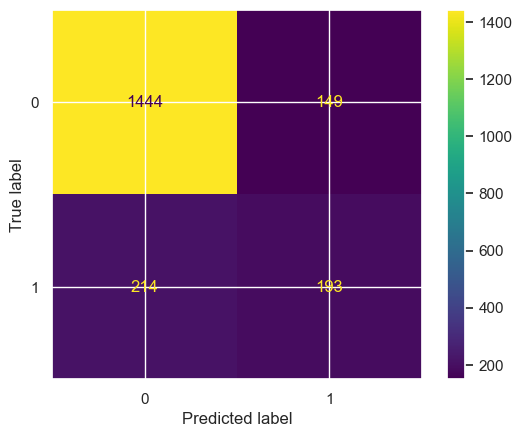

In [121]:
disp.plot()
plt.show()

In [122]:
from sklearn.metrics import  precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score

In [123]:
for metric,evaluator in zip(["Precision","Recall","Accuracy","f1_score"],[precision_score, recall_score, \
                                                                              accuracy_score, f1_score]):
        valor = evaluator(y_test,y_pred)
        print("%s: %.2f" %(metric, valor))

Precision: 0.56
Recall: 0.47
Accuracy: 0.82
f1_score: 0.52


7.6 PCA  de las varaibles

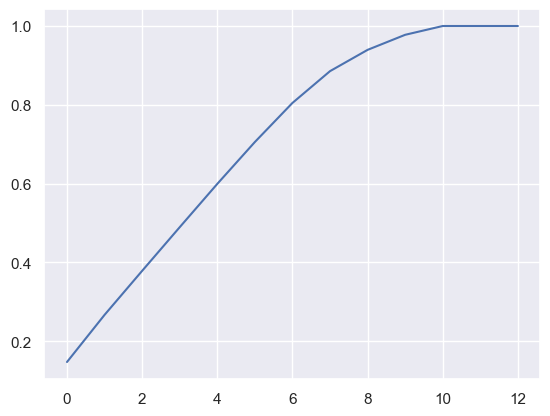

In [124]:
from sklearn.decomposition import PCA

pca = PCA()
X_pipe_train = preprocessing.fit_transform(X_train)
pca.fit(X_pipe_train)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel("Number of Components")
#plt.ylabel("Cumulative Explained Variance")
plt.show()

In [125]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.14739863 0.2670481  0.37872944 0.48949552 0.59940285 0.70564374
 0.80477902 0.88545723 0.93947453 0.9776805  1.         1.
 1.        ]


7.8 Volvemos a probar los modelos despues de la PCA

In [126]:
pca = PCA(n_components=9)

logistic_pipeline = Pipeline(
    [("Preprocesado", preprocessing),
     ("pca", pca),
     ("Modelo", LogisticRegression())
    ])

random_pipeline = Pipeline(
    [("Preprocesado", preprocessing),
     ("pca", pca),
     ("Modelo", RandomForestClassifier())
    ])

xgb_pipeline = Pipeline(
    [("Preprocesado", preprocessing),
     ("pca", pca),
     ("Modelo", XGBClassifier())
    ])

catb_pipeline = Pipeline(
    [("Preprocesado", preprocessing),
     ("pca", pca),
     ("Modelo", CatBoostClassifier())
    ])

for name,pipe in zip(["logistic","randomF", "XGB", "CATB"],[logistic_pipeline, random_pipeline, xgb_pipeline, catb_pipeline]):
    resultado = cross_val_score(pipe, X_train, y_train, cv = 10, scoring = "recall")
    print(f"{name}: {np.mean(resultado):.4f}")
    print(resultado)

logistic: 0.1828
[0.21472393 0.16564417 0.17177914 0.14723926 0.17177914 0.20858896
 0.17177914 0.18404908 0.18404908 0.20858896]
randomF: 0.4025
[0.38650307 0.42331288 0.3803681  0.39877301 0.30674847 0.42331288
 0.44785276 0.39877301 0.42331288 0.43558282]
XGB: 0.4607
[0.42944785 0.50920245 0.47239264 0.4601227  0.34355828 0.47852761
 0.49079755 0.44785276 0.47852761 0.49693252]
Learning rate set to 0.023934
0:	learn: 0.6764735	total: 12.2ms	remaining: 12.1s
1:	learn: 0.6606116	total: 21.8ms	remaining: 10.9s
2:	learn: 0.6470165	total: 32.4ms	remaining: 10.8s
3:	learn: 0.6333785	total: 45.3ms	remaining: 11.3s
4:	learn: 0.6224725	total: 57.2ms	remaining: 11.4s
5:	learn: 0.6097061	total: 69.3ms	remaining: 11.5s
6:	learn: 0.5997968	total: 78.8ms	remaining: 11.2s
7:	learn: 0.5885940	total: 87.5ms	remaining: 10.8s
8:	learn: 0.5769282	total: 95.9ms	remaining: 10.6s
9:	learn: 0.5666286	total: 104ms	remaining: 10.3s
10:	learn: 0.5581044	total: 112ms	remaining: 10.1s
11:	learn: 0.5498784	total

164:	learn: 0.3315013	total: 1.41s	remaining: 7.15s
165:	learn: 0.3312324	total: 1.42s	remaining: 7.15s
166:	learn: 0.3309983	total: 1.43s	remaining: 7.14s
167:	learn: 0.3307466	total: 1.44s	remaining: 7.13s
168:	learn: 0.3305114	total: 1.45s	remaining: 7.12s
169:	learn: 0.3302406	total: 1.46s	remaining: 7.11s
170:	learn: 0.3299611	total: 1.47s	remaining: 7.11s
171:	learn: 0.3297379	total: 1.47s	remaining: 7.1s
172:	learn: 0.3295183	total: 1.48s	remaining: 7.09s
173:	learn: 0.3293137	total: 1.49s	remaining: 7.08s
174:	learn: 0.3291416	total: 1.5s	remaining: 7.07s
175:	learn: 0.3289398	total: 1.51s	remaining: 7.06s
176:	learn: 0.3288105	total: 1.52s	remaining: 7.06s
177:	learn: 0.3285595	total: 1.53s	remaining: 7.05s
178:	learn: 0.3282913	total: 1.53s	remaining: 7.04s
179:	learn: 0.3279682	total: 1.54s	remaining: 7.03s
180:	learn: 0.3277537	total: 1.55s	remaining: 7.02s
181:	learn: 0.3274647	total: 1.56s	remaining: 7.01s
182:	learn: 0.3273122	total: 1.57s	remaining: 7s
183:	learn: 0.327

329:	learn: 0.3017616	total: 2.82s	remaining: 5.72s
330:	learn: 0.3016802	total: 2.83s	remaining: 5.72s
331:	learn: 0.3015488	total: 2.84s	remaining: 5.71s
332:	learn: 0.3014546	total: 2.85s	remaining: 5.71s
333:	learn: 0.3013218	total: 2.86s	remaining: 5.7s
334:	learn: 0.3010925	total: 2.87s	remaining: 5.69s
335:	learn: 0.3009942	total: 2.88s	remaining: 5.68s
336:	learn: 0.3008793	total: 2.88s	remaining: 5.67s
337:	learn: 0.3007416	total: 2.89s	remaining: 5.67s
338:	learn: 0.3005925	total: 2.9s	remaining: 5.66s
339:	learn: 0.3004416	total: 2.91s	remaining: 5.66s
340:	learn: 0.3003556	total: 2.92s	remaining: 5.65s
341:	learn: 0.3002421	total: 2.93s	remaining: 5.64s
342:	learn: 0.3001089	total: 2.94s	remaining: 5.64s
343:	learn: 0.2999656	total: 2.96s	remaining: 5.63s
344:	learn: 0.2998159	total: 2.97s	remaining: 5.63s
345:	learn: 0.2996134	total: 2.98s	remaining: 5.63s
346:	learn: 0.2994249	total: 2.99s	remaining: 5.63s
347:	learn: 0.2992867	total: 3s	remaining: 5.63s
348:	learn: 0.299

511:	learn: 0.2767047	total: 4.44s	remaining: 4.23s
512:	learn: 0.2765934	total: 4.45s	remaining: 4.22s
513:	learn: 0.2764411	total: 4.45s	remaining: 4.21s
514:	learn: 0.2763267	total: 4.46s	remaining: 4.2s
515:	learn: 0.2761972	total: 4.47s	remaining: 4.19s
516:	learn: 0.2760217	total: 4.48s	remaining: 4.19s
517:	learn: 0.2759039	total: 4.49s	remaining: 4.18s
518:	learn: 0.2757339	total: 4.5s	remaining: 4.17s
519:	learn: 0.2755833	total: 4.51s	remaining: 4.16s
520:	learn: 0.2754418	total: 4.51s	remaining: 4.15s
521:	learn: 0.2752244	total: 4.52s	remaining: 4.14s
522:	learn: 0.2750378	total: 4.53s	remaining: 4.13s
523:	learn: 0.2749225	total: 4.54s	remaining: 4.12s
524:	learn: 0.2748655	total: 4.55s	remaining: 4.11s
525:	learn: 0.2747271	total: 4.55s	remaining: 4.11s
526:	learn: 0.2746258	total: 4.56s	remaining: 4.1s
527:	learn: 0.2745213	total: 4.57s	remaining: 4.09s
528:	learn: 0.2744051	total: 4.58s	remaining: 4.08s
529:	learn: 0.2742700	total: 4.59s	remaining: 4.07s
530:	learn: 0.2

673:	learn: 0.2565687	total: 5.82s	remaining: 2.82s
674:	learn: 0.2563877	total: 5.83s	remaining: 2.81s
675:	learn: 0.2562566	total: 5.84s	remaining: 2.8s
676:	learn: 0.2561398	total: 5.85s	remaining: 2.79s
677:	learn: 0.2560321	total: 5.86s	remaining: 2.78s
678:	learn: 0.2558643	total: 5.87s	remaining: 2.77s
679:	learn: 0.2557656	total: 5.88s	remaining: 2.77s
680:	learn: 0.2556720	total: 5.89s	remaining: 2.76s
681:	learn: 0.2555708	total: 5.89s	remaining: 2.75s
682:	learn: 0.2554680	total: 5.9s	remaining: 2.74s
683:	learn: 0.2553531	total: 5.91s	remaining: 2.73s
684:	learn: 0.2551690	total: 5.92s	remaining: 2.72s
685:	learn: 0.2550747	total: 5.93s	remaining: 2.71s
686:	learn: 0.2549438	total: 5.94s	remaining: 2.71s
687:	learn: 0.2548543	total: 5.95s	remaining: 2.7s
688:	learn: 0.2546823	total: 5.95s	remaining: 2.69s
689:	learn: 0.2546535	total: 5.96s	remaining: 2.68s
690:	learn: 0.2544935	total: 5.97s	remaining: 2.67s
691:	learn: 0.2543889	total: 5.98s	remaining: 2.66s
692:	learn: 0.2

843:	learn: 0.2380177	total: 7.24s	remaining: 1.34s
844:	learn: 0.2379279	total: 7.25s	remaining: 1.33s
845:	learn: 0.2378327	total: 7.26s	remaining: 1.32s
846:	learn: 0.2377641	total: 7.27s	remaining: 1.31s
847:	learn: 0.2376606	total: 7.28s	remaining: 1.3s
848:	learn: 0.2375170	total: 7.28s	remaining: 1.29s
849:	learn: 0.2374385	total: 7.29s	remaining: 1.29s
850:	learn: 0.2373404	total: 7.3s	remaining: 1.28s
851:	learn: 0.2372984	total: 7.31s	remaining: 1.27s
852:	learn: 0.2371418	total: 7.32s	remaining: 1.26s
853:	learn: 0.2370763	total: 7.33s	remaining: 1.25s
854:	learn: 0.2370006	total: 7.33s	remaining: 1.24s
855:	learn: 0.2368464	total: 7.34s	remaining: 1.24s
856:	learn: 0.2367574	total: 7.35s	remaining: 1.23s
857:	learn: 0.2367135	total: 7.36s	remaining: 1.22s
858:	learn: 0.2366364	total: 7.37s	remaining: 1.21s
859:	learn: 0.2364761	total: 7.37s	remaining: 1.2s
860:	learn: 0.2363352	total: 7.38s	remaining: 1.19s
861:	learn: 0.2362066	total: 7.39s	remaining: 1.18s
862:	learn: 0.2

26:	learn: 0.4587400	total: 206ms	remaining: 7.44s
27:	learn: 0.4552645	total: 215ms	remaining: 7.47s
28:	learn: 0.4508629	total: 224ms	remaining: 7.49s
29:	learn: 0.4473096	total: 233ms	remaining: 7.53s
30:	learn: 0.4441096	total: 243ms	remaining: 7.58s
31:	learn: 0.4411380	total: 251ms	remaining: 7.59s
32:	learn: 0.4377597	total: 259ms	remaining: 7.59s
33:	learn: 0.4352087	total: 267ms	remaining: 7.59s
34:	learn: 0.4323031	total: 275ms	remaining: 7.59s
35:	learn: 0.4298295	total: 283ms	remaining: 7.58s
36:	learn: 0.4265718	total: 291ms	remaining: 7.57s
37:	learn: 0.4247078	total: 299ms	remaining: 7.57s
38:	learn: 0.4214171	total: 307ms	remaining: 7.56s
39:	learn: 0.4194866	total: 315ms	remaining: 7.55s
40:	learn: 0.4177421	total: 323ms	remaining: 7.55s
41:	learn: 0.4155359	total: 331ms	remaining: 7.54s
42:	learn: 0.4133271	total: 339ms	remaining: 7.54s
43:	learn: 0.4108288	total: 347ms	remaining: 7.54s
44:	learn: 0.4092737	total: 356ms	remaining: 7.55s
45:	learn: 0.4075758	total: 364

196:	learn: 0.3275351	total: 1.62s	remaining: 6.59s
197:	learn: 0.3273256	total: 1.63s	remaining: 6.59s
198:	learn: 0.3271030	total: 1.64s	remaining: 6.58s
199:	learn: 0.3269550	total: 1.64s	remaining: 6.57s
200:	learn: 0.3267455	total: 1.65s	remaining: 6.57s
201:	learn: 0.3265515	total: 1.66s	remaining: 6.56s
202:	learn: 0.3263280	total: 1.67s	remaining: 6.55s
203:	learn: 0.3260977	total: 1.68s	remaining: 6.54s
204:	learn: 0.3259316	total: 1.69s	remaining: 6.54s
205:	learn: 0.3256587	total: 1.69s	remaining: 6.53s
206:	learn: 0.3253996	total: 1.7s	remaining: 6.53s
207:	learn: 0.3250937	total: 1.71s	remaining: 6.52s
208:	learn: 0.3248429	total: 1.72s	remaining: 6.51s
209:	learn: 0.3246349	total: 1.73s	remaining: 6.51s
210:	learn: 0.3244069	total: 1.74s	remaining: 6.5s
211:	learn: 0.3242373	total: 1.75s	remaining: 6.49s
212:	learn: 0.3240881	total: 1.75s	remaining: 6.49s
213:	learn: 0.3239001	total: 1.76s	remaining: 6.48s
214:	learn: 0.3237110	total: 1.77s	remaining: 6.47s
215:	learn: 0.

373:	learn: 0.2976780	total: 3.47s	remaining: 5.81s
374:	learn: 0.2975378	total: 3.48s	remaining: 5.8s
375:	learn: 0.2974303	total: 3.49s	remaining: 5.8s
376:	learn: 0.2973034	total: 3.5s	remaining: 5.79s
377:	learn: 0.2971353	total: 3.51s	remaining: 5.78s
378:	learn: 0.2969962	total: 3.52s	remaining: 5.77s
379:	learn: 0.2968910	total: 3.53s	remaining: 5.76s
380:	learn: 0.2967569	total: 3.54s	remaining: 5.76s
381:	learn: 0.2965843	total: 3.56s	remaining: 5.75s
382:	learn: 0.2964237	total: 3.57s	remaining: 5.75s
383:	learn: 0.2963167	total: 3.58s	remaining: 5.74s
384:	learn: 0.2961826	total: 3.58s	remaining: 5.72s
385:	learn: 0.2960654	total: 3.59s	remaining: 5.71s
386:	learn: 0.2959492	total: 3.6s	remaining: 5.7s
387:	learn: 0.2958444	total: 3.61s	remaining: 5.69s
388:	learn: 0.2957125	total: 3.62s	remaining: 5.68s
389:	learn: 0.2955615	total: 3.63s	remaining: 5.67s
390:	learn: 0.2954326	total: 3.63s	remaining: 5.66s
391:	learn: 0.2953002	total: 3.64s	remaining: 5.65s
392:	learn: 0.295

552:	learn: 0.2710210	total: 5.09s	remaining: 4.11s
553:	learn: 0.2708914	total: 5.09s	remaining: 4.1s
554:	learn: 0.2707771	total: 5.1s	remaining: 4.09s
555:	learn: 0.2706866	total: 5.11s	remaining: 4.08s
556:	learn: 0.2705415	total: 5.12s	remaining: 4.07s
557:	learn: 0.2703628	total: 5.13s	remaining: 4.06s
558:	learn: 0.2702430	total: 5.14s	remaining: 4.05s
559:	learn: 0.2701217	total: 5.15s	remaining: 4.04s
560:	learn: 0.2699719	total: 5.15s	remaining: 4.03s
561:	learn: 0.2698568	total: 5.16s	remaining: 4.02s
562:	learn: 0.2696959	total: 5.17s	remaining: 4.01s
563:	learn: 0.2695757	total: 5.18s	remaining: 4s
564:	learn: 0.2694404	total: 5.19s	remaining: 4s
565:	learn: 0.2693098	total: 5.2s	remaining: 3.98s
566:	learn: 0.2691502	total: 5.21s	remaining: 3.98s
567:	learn: 0.2689750	total: 5.21s	remaining: 3.96s
568:	learn: 0.2688398	total: 5.22s	remaining: 3.96s
569:	learn: 0.2686598	total: 5.23s	remaining: 3.95s
570:	learn: 0.2685290	total: 5.24s	remaining: 3.94s
571:	learn: 0.2683941

721:	learn: 0.2497991	total: 6.49s	remaining: 2.5s
722:	learn: 0.2496909	total: 6.5s	remaining: 2.49s
723:	learn: 0.2495946	total: 6.51s	remaining: 2.48s
724:	learn: 0.2494397	total: 6.52s	remaining: 2.47s
725:	learn: 0.2493020	total: 6.53s	remaining: 2.46s
726:	learn: 0.2492152	total: 6.54s	remaining: 2.45s
727:	learn: 0.2490974	total: 6.54s	remaining: 2.44s
728:	learn: 0.2489884	total: 6.55s	remaining: 2.44s
729:	learn: 0.2488753	total: 6.56s	remaining: 2.43s
730:	learn: 0.2487735	total: 6.57s	remaining: 2.42s
731:	learn: 0.2486985	total: 6.58s	remaining: 2.41s
732:	learn: 0.2485843	total: 6.58s	remaining: 2.4s
733:	learn: 0.2484396	total: 6.59s	remaining: 2.39s
734:	learn: 0.2482968	total: 6.6s	remaining: 2.38s
735:	learn: 0.2481885	total: 6.61s	remaining: 2.37s
736:	learn: 0.2480522	total: 6.62s	remaining: 2.36s
737:	learn: 0.2479754	total: 6.63s	remaining: 2.35s
738:	learn: 0.2478064	total: 6.63s	remaining: 2.34s
739:	learn: 0.2476901	total: 6.64s	remaining: 2.33s
740:	learn: 0.24

889:	learn: 0.2319228	total: 7.88s	remaining: 974ms
890:	learn: 0.2318180	total: 7.89s	remaining: 965ms
891:	learn: 0.2317176	total: 7.9s	remaining: 957ms
892:	learn: 0.2316200	total: 7.91s	remaining: 948ms
893:	learn: 0.2315055	total: 7.92s	remaining: 939ms
894:	learn: 0.2314031	total: 7.92s	remaining: 930ms
895:	learn: 0.2312705	total: 7.93s	remaining: 921ms
896:	learn: 0.2311912	total: 7.94s	remaining: 912ms
897:	learn: 0.2310997	total: 7.95s	remaining: 903ms
898:	learn: 0.2309818	total: 7.96s	remaining: 894ms
899:	learn: 0.2308893	total: 7.97s	remaining: 885ms
900:	learn: 0.2308048	total: 7.97s	remaining: 876ms
901:	learn: 0.2306387	total: 7.98s	remaining: 867ms
902:	learn: 0.2305513	total: 7.99s	remaining: 858ms
903:	learn: 0.2304519	total: 8s	remaining: 849ms
904:	learn: 0.2303730	total: 8.01s	remaining: 840ms
905:	learn: 0.2302867	total: 8.01s	remaining: 832ms
906:	learn: 0.2301743	total: 8.02s	remaining: 823ms
907:	learn: 0.2300685	total: 8.03s	remaining: 814ms
908:	learn: 0.22

50:	learn: 0.3974474	total: 408ms	remaining: 7.59s
51:	learn: 0.3951508	total: 417ms	remaining: 7.59s
52:	learn: 0.3933957	total: 425ms	remaining: 7.59s
53:	learn: 0.3914805	total: 433ms	remaining: 7.59s
54:	learn: 0.3900194	total: 442ms	remaining: 7.59s
55:	learn: 0.3889789	total: 451ms	remaining: 7.6s
56:	learn: 0.3873844	total: 459ms	remaining: 7.59s
57:	learn: 0.3862599	total: 468ms	remaining: 7.59s
58:	learn: 0.3844808	total: 476ms	remaining: 7.59s
59:	learn: 0.3834627	total: 485ms	remaining: 7.59s
60:	learn: 0.3825123	total: 493ms	remaining: 7.58s
61:	learn: 0.3813363	total: 501ms	remaining: 7.58s
62:	learn: 0.3802521	total: 509ms	remaining: 7.57s
63:	learn: 0.3793733	total: 517ms	remaining: 7.56s
64:	learn: 0.3783911	total: 525ms	remaining: 7.56s
65:	learn: 0.3775624	total: 533ms	remaining: 7.55s
66:	learn: 0.3765582	total: 541ms	remaining: 7.54s
67:	learn: 0.3757850	total: 550ms	remaining: 7.54s
68:	learn: 0.3748274	total: 559ms	remaining: 7.54s
69:	learn: 0.3737226	total: 567m

212:	learn: 0.3235330	total: 1.84s	remaining: 6.8s
213:	learn: 0.3233931	total: 1.85s	remaining: 6.8s
214:	learn: 0.3231783	total: 1.86s	remaining: 6.79s
215:	learn: 0.3230200	total: 1.87s	remaining: 6.78s
216:	learn: 0.3228334	total: 1.88s	remaining: 6.77s
217:	learn: 0.3225620	total: 1.89s	remaining: 6.76s
218:	learn: 0.3223661	total: 1.89s	remaining: 6.76s
219:	learn: 0.3221483	total: 1.9s	remaining: 6.75s
220:	learn: 0.3219195	total: 1.91s	remaining: 6.74s
221:	learn: 0.3217115	total: 1.92s	remaining: 6.73s
222:	learn: 0.3215154	total: 1.93s	remaining: 6.72s
223:	learn: 0.3212841	total: 1.94s	remaining: 6.71s
224:	learn: 0.3210592	total: 1.95s	remaining: 6.71s
225:	learn: 0.3208626	total: 1.96s	remaining: 6.7s
226:	learn: 0.3206984	total: 1.96s	remaining: 6.69s
227:	learn: 0.3205332	total: 1.97s	remaining: 6.68s
228:	learn: 0.3203425	total: 1.98s	remaining: 6.67s
229:	learn: 0.3201364	total: 1.99s	remaining: 6.66s
230:	learn: 0.3199548	total: 2s	remaining: 6.66s
231:	learn: 0.31973

388:	learn: 0.2952155	total: 3.44s	remaining: 5.4s
389:	learn: 0.2950978	total: 3.45s	remaining: 5.4s
390:	learn: 0.2948716	total: 3.46s	remaining: 5.39s
391:	learn: 0.2945866	total: 3.47s	remaining: 5.38s
392:	learn: 0.2944338	total: 3.48s	remaining: 5.38s
393:	learn: 0.2942259	total: 3.49s	remaining: 5.37s
394:	learn: 0.2940625	total: 3.5s	remaining: 5.36s
395:	learn: 0.2939529	total: 3.51s	remaining: 5.36s
396:	learn: 0.2937525	total: 3.52s	remaining: 5.35s
397:	learn: 0.2935892	total: 3.53s	remaining: 5.34s
398:	learn: 0.2934928	total: 3.54s	remaining: 5.33s
399:	learn: 0.2932679	total: 3.55s	remaining: 5.32s
400:	learn: 0.2931070	total: 3.56s	remaining: 5.31s
401:	learn: 0.2930121	total: 3.56s	remaining: 5.3s
402:	learn: 0.2928782	total: 3.57s	remaining: 5.29s
403:	learn: 0.2927609	total: 3.58s	remaining: 5.29s
404:	learn: 0.2926357	total: 3.59s	remaining: 5.28s
405:	learn: 0.2924955	total: 3.6s	remaining: 5.27s
406:	learn: 0.2923335	total: 3.61s	remaining: 5.26s
407:	learn: 0.292

557:	learn: 0.2711159	total: 5.05s	remaining: 4s
558:	learn: 0.2709978	total: 5.06s	remaining: 3.99s
559:	learn: 0.2708569	total: 5.07s	remaining: 3.98s
560:	learn: 0.2707119	total: 5.08s	remaining: 3.97s
561:	learn: 0.2704983	total: 5.09s	remaining: 3.96s
562:	learn: 0.2704139	total: 5.09s	remaining: 3.95s
563:	learn: 0.2703119	total: 5.1s	remaining: 3.94s
564:	learn: 0.2701762	total: 5.11s	remaining: 3.94s
565:	learn: 0.2700210	total: 5.12s	remaining: 3.93s
566:	learn: 0.2699124	total: 5.13s	remaining: 3.92s
567:	learn: 0.2697804	total: 5.14s	remaining: 3.91s
568:	learn: 0.2696326	total: 5.15s	remaining: 3.9s
569:	learn: 0.2695274	total: 5.16s	remaining: 3.89s
570:	learn: 0.2693621	total: 5.17s	remaining: 3.88s
571:	learn: 0.2692387	total: 5.18s	remaining: 3.88s
572:	learn: 0.2691004	total: 5.19s	remaining: 3.87s
573:	learn: 0.2689423	total: 5.2s	remaining: 3.86s
574:	learn: 0.2687847	total: 5.21s	remaining: 3.85s
575:	learn: 0.2686755	total: 5.23s	remaining: 3.85s
576:	learn: 0.2685

722:	learn: 0.2502835	total: 6.66s	remaining: 2.55s
723:	learn: 0.2501614	total: 6.67s	remaining: 2.54s
724:	learn: 0.2499824	total: 6.68s	remaining: 2.53s
725:	learn: 0.2498837	total: 6.69s	remaining: 2.52s
726:	learn: 0.2498118	total: 6.7s	remaining: 2.51s
727:	learn: 0.2496337	total: 6.71s	remaining: 2.5s
728:	learn: 0.2494983	total: 6.71s	remaining: 2.5s
729:	learn: 0.2494093	total: 6.72s	remaining: 2.49s
730:	learn: 0.2493100	total: 6.73s	remaining: 2.48s
731:	learn: 0.2491357	total: 6.74s	remaining: 2.47s
732:	learn: 0.2489810	total: 6.75s	remaining: 2.46s
733:	learn: 0.2488341	total: 6.76s	remaining: 2.45s
734:	learn: 0.2487486	total: 6.76s	remaining: 2.44s
735:	learn: 0.2486069	total: 6.77s	remaining: 2.43s
736:	learn: 0.2485165	total: 6.78s	remaining: 2.42s
737:	learn: 0.2484236	total: 6.79s	remaining: 2.41s
738:	learn: 0.2483100	total: 6.8s	remaining: 2.4s
739:	learn: 0.2481916	total: 6.8s	remaining: 2.39s
740:	learn: 0.2481007	total: 6.81s	remaining: 2.38s
741:	learn: 0.2479

903:	learn: 0.2308396	total: 8.49s	remaining: 902ms
904:	learn: 0.2307275	total: 8.5s	remaining: 892ms
905:	learn: 0.2306206	total: 8.51s	remaining: 883ms
906:	learn: 0.2305359	total: 8.52s	remaining: 874ms
907:	learn: 0.2304420	total: 8.53s	remaining: 864ms
908:	learn: 0.2303827	total: 8.54s	remaining: 855ms
909:	learn: 0.2303096	total: 8.55s	remaining: 845ms
910:	learn: 0.2302558	total: 8.56s	remaining: 836ms
911:	learn: 0.2301691	total: 8.57s	remaining: 827ms
912:	learn: 0.2300237	total: 8.58s	remaining: 817ms
913:	learn: 0.2299202	total: 8.59s	remaining: 808ms
914:	learn: 0.2298032	total: 8.6s	remaining: 798ms
915:	learn: 0.2297012	total: 8.6s	remaining: 789ms
916:	learn: 0.2296193	total: 8.61s	remaining: 780ms
917:	learn: 0.2295423	total: 8.62s	remaining: 770ms
918:	learn: 0.2294184	total: 8.63s	remaining: 761ms
919:	learn: 0.2293243	total: 8.64s	remaining: 751ms
920:	learn: 0.2292421	total: 8.65s	remaining: 742ms
921:	learn: 0.2290981	total: 8.65s	remaining: 732ms
922:	learn: 0.2

64:	learn: 0.3840858	total: 622ms	remaining: 8.94s
65:	learn: 0.3835345	total: 636ms	remaining: 9s
66:	learn: 0.3828554	total: 650ms	remaining: 9.06s
67:	learn: 0.3820002	total: 662ms	remaining: 9.08s
68:	learn: 0.3807976	total: 676ms	remaining: 9.12s
69:	learn: 0.3798290	total: 687ms	remaining: 9.12s
70:	learn: 0.3790552	total: 697ms	remaining: 9.12s
71:	learn: 0.3780050	total: 707ms	remaining: 9.12s
72:	learn: 0.3769982	total: 718ms	remaining: 9.11s
73:	learn: 0.3763109	total: 731ms	remaining: 9.15s
74:	learn: 0.3753314	total: 743ms	remaining: 9.16s
75:	learn: 0.3743644	total: 756ms	remaining: 9.19s
76:	learn: 0.3734473	total: 768ms	remaining: 9.2s
77:	learn: 0.3728013	total: 777ms	remaining: 9.18s
78:	learn: 0.3721232	total: 787ms	remaining: 9.17s
79:	learn: 0.3712284	total: 796ms	remaining: 9.15s
80:	learn: 0.3702734	total: 805ms	remaining: 9.13s
81:	learn: 0.3691880	total: 814ms	remaining: 9.11s
82:	learn: 0.3683759	total: 823ms	remaining: 9.1s
83:	learn: 0.3676265	total: 834ms	re

231:	learn: 0.3228298	total: 2.24s	remaining: 7.43s
232:	learn: 0.3225683	total: 2.25s	remaining: 7.42s
233:	learn: 0.3224437	total: 2.26s	remaining: 7.4s
234:	learn: 0.3221884	total: 2.27s	remaining: 7.39s
235:	learn: 0.3220397	total: 2.28s	remaining: 7.38s
236:	learn: 0.3218764	total: 2.29s	remaining: 7.37s
237:	learn: 0.3217501	total: 2.3s	remaining: 7.35s
238:	learn: 0.3215720	total: 2.31s	remaining: 7.34s
239:	learn: 0.3213864	total: 2.31s	remaining: 7.33s
240:	learn: 0.3212248	total: 2.32s	remaining: 7.32s
241:	learn: 0.3210492	total: 2.33s	remaining: 7.3s
242:	learn: 0.3208884	total: 2.34s	remaining: 7.29s
243:	learn: 0.3207507	total: 2.35s	remaining: 7.28s
244:	learn: 0.3205897	total: 2.36s	remaining: 7.26s
245:	learn: 0.3203656	total: 2.37s	remaining: 7.25s
246:	learn: 0.3201153	total: 2.37s	remaining: 7.24s
247:	learn: 0.3198591	total: 2.38s	remaining: 7.22s
248:	learn: 0.3196143	total: 2.39s	remaining: 7.21s
249:	learn: 0.3194830	total: 2.4s	remaining: 7.2s
250:	learn: 0.319

394:	learn: 0.2971501	total: 3.65s	remaining: 5.58s
395:	learn: 0.2970288	total: 3.65s	remaining: 5.57s
396:	learn: 0.2969096	total: 3.66s	remaining: 5.56s
397:	learn: 0.2966672	total: 3.67s	remaining: 5.55s
398:	learn: 0.2965396	total: 3.68s	remaining: 5.54s
399:	learn: 0.2964164	total: 3.69s	remaining: 5.54s
400:	learn: 0.2962482	total: 3.7s	remaining: 5.53s
401:	learn: 0.2961002	total: 3.71s	remaining: 5.52s
402:	learn: 0.2959881	total: 3.72s	remaining: 5.51s
403:	learn: 0.2957701	total: 3.73s	remaining: 5.5s
404:	learn: 0.2955975	total: 3.73s	remaining: 5.49s
405:	learn: 0.2954303	total: 3.74s	remaining: 5.47s
406:	learn: 0.2953202	total: 3.75s	remaining: 5.46s
407:	learn: 0.2951675	total: 3.76s	remaining: 5.45s
408:	learn: 0.2950629	total: 3.77s	remaining: 5.44s
409:	learn: 0.2948413	total: 3.77s	remaining: 5.43s
410:	learn: 0.2946862	total: 3.78s	remaining: 5.42s
411:	learn: 0.2945423	total: 3.79s	remaining: 5.41s
412:	learn: 0.2944306	total: 3.8s	remaining: 5.4s
413:	learn: 0.29

555:	learn: 0.2734049	total: 5.04s	remaining: 4.02s
556:	learn: 0.2732131	total: 5.04s	remaining: 4.01s
557:	learn: 0.2731041	total: 5.05s	remaining: 4s
558:	learn: 0.2729318	total: 5.06s	remaining: 3.99s
559:	learn: 0.2727853	total: 5.07s	remaining: 3.98s
560:	learn: 0.2726299	total: 5.08s	remaining: 3.97s
561:	learn: 0.2725579	total: 5.09s	remaining: 3.96s
562:	learn: 0.2724502	total: 5.1s	remaining: 3.96s
563:	learn: 0.2723053	total: 5.11s	remaining: 3.95s
564:	learn: 0.2721458	total: 5.11s	remaining: 3.94s
565:	learn: 0.2720632	total: 5.12s	remaining: 3.93s
566:	learn: 0.2719109	total: 5.13s	remaining: 3.92s
567:	learn: 0.2717702	total: 5.14s	remaining: 3.91s
568:	learn: 0.2715943	total: 5.15s	remaining: 3.9s
569:	learn: 0.2714418	total: 5.16s	remaining: 3.89s
570:	learn: 0.2713176	total: 5.16s	remaining: 3.88s
571:	learn: 0.2711812	total: 5.17s	remaining: 3.87s
572:	learn: 0.2710653	total: 5.18s	remaining: 3.86s
573:	learn: 0.2709357	total: 5.19s	remaining: 3.85s
574:	learn: 0.270

733:	learn: 0.2507731	total: 6.63s	remaining: 2.4s
734:	learn: 0.2506797	total: 6.64s	remaining: 2.4s
735:	learn: 0.2505312	total: 6.66s	remaining: 2.39s
736:	learn: 0.2504056	total: 6.67s	remaining: 2.38s
737:	learn: 0.2502728	total: 6.67s	remaining: 2.37s
738:	learn: 0.2501901	total: 6.68s	remaining: 2.36s
739:	learn: 0.2500396	total: 6.69s	remaining: 2.35s
740:	learn: 0.2499133	total: 6.7s	remaining: 2.34s
741:	learn: 0.2497941	total: 6.71s	remaining: 2.33s
742:	learn: 0.2497041	total: 6.72s	remaining: 2.33s
743:	learn: 0.2495866	total: 6.73s	remaining: 2.32s
744:	learn: 0.2494618	total: 6.74s	remaining: 2.31s
745:	learn: 0.2493540	total: 6.75s	remaining: 2.3s
746:	learn: 0.2492849	total: 6.76s	remaining: 2.29s
747:	learn: 0.2491379	total: 6.77s	remaining: 2.28s
748:	learn: 0.2490049	total: 6.78s	remaining: 2.27s
749:	learn: 0.2488983	total: 6.79s	remaining: 2.26s
750:	learn: 0.2487825	total: 6.8s	remaining: 2.25s
751:	learn: 0.2486874	total: 6.8s	remaining: 2.24s
752:	learn: 0.2486

912:	learn: 0.2310446	total: 8.24s	remaining: 785ms
913:	learn: 0.2308799	total: 8.25s	remaining: 776ms
914:	learn: 0.2307646	total: 8.26s	remaining: 767ms
915:	learn: 0.2306857	total: 8.27s	remaining: 758ms
916:	learn: 0.2305867	total: 8.28s	remaining: 749ms
917:	learn: 0.2305213	total: 8.28s	remaining: 740ms
918:	learn: 0.2303807	total: 8.29s	remaining: 731ms
919:	learn: 0.2302765	total: 8.3s	remaining: 722ms
920:	learn: 0.2302152	total: 8.31s	remaining: 713ms
921:	learn: 0.2300872	total: 8.32s	remaining: 704ms
922:	learn: 0.2299877	total: 8.33s	remaining: 695ms
923:	learn: 0.2299552	total: 8.34s	remaining: 686ms
924:	learn: 0.2298763	total: 8.35s	remaining: 677ms
925:	learn: 0.2297741	total: 8.35s	remaining: 668ms
926:	learn: 0.2296286	total: 8.36s	remaining: 659ms
927:	learn: 0.2295335	total: 8.37s	remaining: 650ms
928:	learn: 0.2294263	total: 8.38s	remaining: 640ms
929:	learn: 0.2293332	total: 8.39s	remaining: 631ms
930:	learn: 0.2292590	total: 8.4s	remaining: 622ms
931:	learn: 0.

90:	learn: 0.3562264	total: 804ms	remaining: 8.03s
91:	learn: 0.3557513	total: 813ms	remaining: 8.03s
92:	learn: 0.3550648	total: 822ms	remaining: 8.02s
93:	learn: 0.3545541	total: 831ms	remaining: 8.01s
94:	learn: 0.3541156	total: 839ms	remaining: 8s
95:	learn: 0.3535404	total: 848ms	remaining: 7.99s
96:	learn: 0.3531927	total: 857ms	remaining: 7.98s
97:	learn: 0.3528099	total: 866ms	remaining: 7.97s
98:	learn: 0.3522101	total: 875ms	remaining: 7.96s
99:	learn: 0.3516881	total: 883ms	remaining: 7.95s
100:	learn: 0.3512494	total: 892ms	remaining: 7.94s
101:	learn: 0.3508652	total: 900ms	remaining: 7.92s
102:	learn: 0.3503518	total: 909ms	remaining: 7.92s
103:	learn: 0.3497549	total: 918ms	remaining: 7.91s
104:	learn: 0.3493397	total: 927ms	remaining: 7.9s
105:	learn: 0.3489211	total: 936ms	remaining: 7.9s
106:	learn: 0.3485885	total: 945ms	remaining: 7.89s
107:	learn: 0.3478241	total: 954ms	remaining: 7.88s
108:	learn: 0.3474942	total: 963ms	remaining: 7.87s
109:	learn: 0.3470498	total

250:	learn: 0.3117716	total: 2.21s	remaining: 6.6s
251:	learn: 0.3115099	total: 2.22s	remaining: 6.59s
252:	learn: 0.3113469	total: 2.23s	remaining: 6.58s
253:	learn: 0.3111825	total: 2.24s	remaining: 6.58s
254:	learn: 0.3109144	total: 2.25s	remaining: 6.57s
255:	learn: 0.3107100	total: 2.26s	remaining: 6.56s
256:	learn: 0.3105898	total: 2.27s	remaining: 6.55s
257:	learn: 0.3103887	total: 2.27s	remaining: 6.54s
258:	learn: 0.3102589	total: 2.28s	remaining: 6.53s
259:	learn: 0.3100208	total: 2.29s	remaining: 6.52s
260:	learn: 0.3099102	total: 2.3s	remaining: 6.51s
261:	learn: 0.3097674	total: 2.31s	remaining: 6.5s
262:	learn: 0.3096747	total: 2.32s	remaining: 6.49s
263:	learn: 0.3095535	total: 2.33s	remaining: 6.48s
264:	learn: 0.3094147	total: 2.33s	remaining: 6.47s
265:	learn: 0.3092465	total: 2.34s	remaining: 6.46s
266:	learn: 0.3091311	total: 2.35s	remaining: 6.45s
267:	learn: 0.3088749	total: 2.36s	remaining: 6.44s
268:	learn: 0.3086640	total: 2.37s	remaining: 6.43s
269:	learn: 0.3

409:	learn: 0.2870566	total: 3.61s	remaining: 5.2s
410:	learn: 0.2869408	total: 3.62s	remaining: 5.19s
411:	learn: 0.2868025	total: 3.63s	remaining: 5.18s
412:	learn: 0.2866553	total: 3.64s	remaining: 5.17s
413:	learn: 0.2865183	total: 3.65s	remaining: 5.16s
414:	learn: 0.2863759	total: 3.65s	remaining: 5.15s
415:	learn: 0.2862538	total: 3.66s	remaining: 5.14s
416:	learn: 0.2861192	total: 3.67s	remaining: 5.14s
417:	learn: 0.2859502	total: 3.68s	remaining: 5.13s
418:	learn: 0.2857989	total: 3.69s	remaining: 5.12s
419:	learn: 0.2856975	total: 3.7s	remaining: 5.11s
420:	learn: 0.2855957	total: 3.71s	remaining: 5.1s
421:	learn: 0.2855051	total: 3.72s	remaining: 5.09s
422:	learn: 0.2853683	total: 3.73s	remaining: 5.08s
423:	learn: 0.2852273	total: 3.74s	remaining: 5.08s
424:	learn: 0.2850994	total: 3.75s	remaining: 5.07s
425:	learn: 0.2849692	total: 3.75s	remaining: 5.06s
426:	learn: 0.2847480	total: 3.76s	remaining: 5.05s
427:	learn: 0.2846052	total: 3.77s	remaining: 5.04s
428:	learn: 0.2

568:	learn: 0.2635649	total: 5.01s	remaining: 3.8s
569:	learn: 0.2634357	total: 5.02s	remaining: 3.79s
570:	learn: 0.2632977	total: 5.03s	remaining: 3.78s
571:	learn: 0.2631547	total: 5.04s	remaining: 3.77s
572:	learn: 0.2630086	total: 5.05s	remaining: 3.76s
573:	learn: 0.2628580	total: 5.06s	remaining: 3.75s
574:	learn: 0.2626614	total: 5.07s	remaining: 3.74s
575:	learn: 0.2625188	total: 5.07s	remaining: 3.73s
576:	learn: 0.2623694	total: 5.08s	remaining: 3.73s
577:	learn: 0.2621952	total: 5.09s	remaining: 3.72s
578:	learn: 0.2620476	total: 5.1s	remaining: 3.71s
579:	learn: 0.2618637	total: 5.11s	remaining: 3.7s
580:	learn: 0.2616867	total: 5.12s	remaining: 3.69s
581:	learn: 0.2615382	total: 5.13s	remaining: 3.68s
582:	learn: 0.2613240	total: 5.14s	remaining: 3.67s
583:	learn: 0.2611162	total: 5.14s	remaining: 3.67s
584:	learn: 0.2610240	total: 5.15s	remaining: 3.66s
585:	learn: 0.2608790	total: 5.16s	remaining: 3.65s
586:	learn: 0.2607887	total: 5.17s	remaining: 3.64s
587:	learn: 0.2

729:	learn: 0.2427929	total: 6.41s	remaining: 2.37s
730:	learn: 0.2426707	total: 6.42s	remaining: 2.36s
731:	learn: 0.2425257	total: 6.43s	remaining: 2.35s
732:	learn: 0.2424163	total: 6.44s	remaining: 2.35s
733:	learn: 0.2423065	total: 6.45s	remaining: 2.34s
734:	learn: 0.2421671	total: 6.46s	remaining: 2.33s
735:	learn: 0.2420707	total: 6.47s	remaining: 2.32s
736:	learn: 0.2419318	total: 6.48s	remaining: 2.31s
737:	learn: 0.2417790	total: 6.48s	remaining: 2.3s
738:	learn: 0.2416777	total: 6.49s	remaining: 2.29s
739:	learn: 0.2415713	total: 6.5s	remaining: 2.28s
740:	learn: 0.2414909	total: 6.51s	remaining: 2.27s
741:	learn: 0.2413881	total: 6.52s	remaining: 2.27s
742:	learn: 0.2412556	total: 6.53s	remaining: 2.26s
743:	learn: 0.2411769	total: 6.54s	remaining: 2.25s
744:	learn: 0.2410831	total: 6.54s	remaining: 2.24s
745:	learn: 0.2409688	total: 6.55s	remaining: 2.23s
746:	learn: 0.2408617	total: 6.56s	remaining: 2.22s
747:	learn: 0.2407358	total: 6.57s	remaining: 2.21s
748:	learn: 0.

889:	learn: 0.2255348	total: 7.8s	remaining: 964ms
890:	learn: 0.2253980	total: 7.81s	remaining: 955ms
891:	learn: 0.2252547	total: 7.82s	remaining: 946ms
892:	learn: 0.2250984	total: 7.83s	remaining: 938ms
893:	learn: 0.2250001	total: 7.83s	remaining: 929ms
894:	learn: 0.2249009	total: 7.84s	remaining: 920ms
895:	learn: 0.2247861	total: 7.85s	remaining: 912ms
896:	learn: 0.2246776	total: 7.86s	remaining: 903ms
897:	learn: 0.2245795	total: 7.87s	remaining: 894ms
898:	learn: 0.2245026	total: 7.88s	remaining: 885ms
899:	learn: 0.2244041	total: 7.89s	remaining: 876ms
900:	learn: 0.2242756	total: 7.9s	remaining: 868ms
901:	learn: 0.2241714	total: 7.91s	remaining: 859ms
902:	learn: 0.2240226	total: 7.91s	remaining: 850ms
903:	learn: 0.2239268	total: 7.92s	remaining: 841ms
904:	learn: 0.2238205	total: 7.93s	remaining: 833ms
905:	learn: 0.2237849	total: 7.94s	remaining: 824ms
906:	learn: 0.2237367	total: 7.95s	remaining: 815ms
907:	learn: 0.2236492	total: 7.96s	remaining: 806ms
908:	learn: 0.

67:	learn: 0.3760312	total: 592ms	remaining: 8.12s
68:	learn: 0.3750796	total: 602ms	remaining: 8.12s
69:	learn: 0.3738946	total: 611ms	remaining: 8.12s
70:	learn: 0.3731832	total: 620ms	remaining: 8.11s
71:	learn: 0.3720883	total: 629ms	remaining: 8.11s
72:	learn: 0.3715325	total: 637ms	remaining: 8.09s
73:	learn: 0.3709087	total: 646ms	remaining: 8.09s
74:	learn: 0.3701725	total: 655ms	remaining: 8.08s
75:	learn: 0.3695741	total: 664ms	remaining: 8.07s
76:	learn: 0.3690620	total: 674ms	remaining: 8.07s
77:	learn: 0.3683679	total: 682ms	remaining: 8.07s
78:	learn: 0.3674987	total: 692ms	remaining: 8.07s
79:	learn: 0.3668826	total: 701ms	remaining: 8.07s
80:	learn: 0.3658513	total: 711ms	remaining: 8.07s
81:	learn: 0.3653428	total: 723ms	remaining: 8.09s
82:	learn: 0.3646944	total: 734ms	remaining: 8.11s
83:	learn: 0.3640184	total: 744ms	remaining: 8.11s
84:	learn: 0.3633517	total: 754ms	remaining: 8.12s
85:	learn: 0.3627992	total: 764ms	remaining: 8.12s
86:	learn: 0.3620401	total: 774

238:	learn: 0.3184310	total: 2.19s	remaining: 6.99s
239:	learn: 0.3183148	total: 2.2s	remaining: 6.98s
240:	learn: 0.3182074	total: 2.21s	remaining: 6.97s
241:	learn: 0.3180490	total: 2.22s	remaining: 6.96s
242:	learn: 0.3178675	total: 2.23s	remaining: 6.95s
243:	learn: 0.3176662	total: 2.24s	remaining: 6.95s
244:	learn: 0.3174895	total: 2.25s	remaining: 6.94s
245:	learn: 0.3173122	total: 2.26s	remaining: 6.94s
246:	learn: 0.3171652	total: 2.27s	remaining: 6.93s
247:	learn: 0.3170031	total: 2.28s	remaining: 6.92s
248:	learn: 0.3167865	total: 2.29s	remaining: 6.91s
249:	learn: 0.3165270	total: 2.3s	remaining: 6.9s
250:	learn: 0.3163622	total: 2.31s	remaining: 6.89s
251:	learn: 0.3161646	total: 2.32s	remaining: 6.87s
252:	learn: 0.3159957	total: 2.32s	remaining: 6.86s
253:	learn: 0.3158607	total: 2.33s	remaining: 6.85s
254:	learn: 0.3157104	total: 2.34s	remaining: 6.84s
255:	learn: 0.3155505	total: 2.35s	remaining: 6.83s
256:	learn: 0.3153441	total: 2.36s	remaining: 6.82s
257:	learn: 0.3

411:	learn: 0.2923208	total: 3.8s	remaining: 5.43s
412:	learn: 0.2922172	total: 3.81s	remaining: 5.42s
413:	learn: 0.2921281	total: 3.82s	remaining: 5.41s
414:	learn: 0.2919940	total: 3.83s	remaining: 5.4s
415:	learn: 0.2918699	total: 3.84s	remaining: 5.39s
416:	learn: 0.2916914	total: 3.85s	remaining: 5.38s
417:	learn: 0.2915681	total: 3.86s	remaining: 5.38s
418:	learn: 0.2914328	total: 3.87s	remaining: 5.37s
419:	learn: 0.2912936	total: 3.88s	remaining: 5.36s
420:	learn: 0.2911453	total: 3.89s	remaining: 5.35s
421:	learn: 0.2910199	total: 3.9s	remaining: 5.34s
422:	learn: 0.2908479	total: 3.91s	remaining: 5.33s
423:	learn: 0.2906950	total: 3.92s	remaining: 5.32s
424:	learn: 0.2905959	total: 3.92s	remaining: 5.31s
425:	learn: 0.2904207	total: 3.93s	remaining: 5.3s
426:	learn: 0.2902958	total: 3.94s	remaining: 5.29s
427:	learn: 0.2901498	total: 3.95s	remaining: 5.28s
428:	learn: 0.2900407	total: 3.96s	remaining: 5.27s
429:	learn: 0.2898982	total: 3.97s	remaining: 5.26s
430:	learn: 0.28

574:	learn: 0.2705382	total: 5.23s	remaining: 3.87s
575:	learn: 0.2703795	total: 5.24s	remaining: 3.86s
576:	learn: 0.2702286	total: 5.25s	remaining: 3.85s
577:	learn: 0.2700929	total: 5.26s	remaining: 3.84s
578:	learn: 0.2700150	total: 5.26s	remaining: 3.83s
579:	learn: 0.2698578	total: 5.27s	remaining: 3.82s
580:	learn: 0.2697404	total: 5.28s	remaining: 3.81s
581:	learn: 0.2696676	total: 5.29s	remaining: 3.8s
582:	learn: 0.2694842	total: 5.3s	remaining: 3.79s
583:	learn: 0.2693907	total: 5.31s	remaining: 3.78s
584:	learn: 0.2692970	total: 5.32s	remaining: 3.77s
585:	learn: 0.2690915	total: 5.33s	remaining: 3.76s
586:	learn: 0.2689668	total: 5.33s	remaining: 3.75s
587:	learn: 0.2688643	total: 5.34s	remaining: 3.74s
588:	learn: 0.2687062	total: 5.35s	remaining: 3.73s
589:	learn: 0.2685294	total: 5.36s	remaining: 3.72s
590:	learn: 0.2684486	total: 5.37s	remaining: 3.71s
591:	learn: 0.2683408	total: 5.38s	remaining: 3.71s
592:	learn: 0.2682422	total: 5.38s	remaining: 3.69s
593:	learn: 0.

736:	learn: 0.2512976	total: 6.63s	remaining: 2.37s
737:	learn: 0.2512139	total: 6.64s	remaining: 2.36s
738:	learn: 0.2511321	total: 6.65s	remaining: 2.35s
739:	learn: 0.2510360	total: 6.66s	remaining: 2.34s
740:	learn: 0.2509259	total: 6.67s	remaining: 2.33s
741:	learn: 0.2507880	total: 6.68s	remaining: 2.32s
742:	learn: 0.2507375	total: 6.69s	remaining: 2.31s
743:	learn: 0.2506351	total: 6.7s	remaining: 2.3s
744:	learn: 0.2504978	total: 6.7s	remaining: 2.29s
745:	learn: 0.2504149	total: 6.71s	remaining: 2.29s
746:	learn: 0.2503418	total: 6.72s	remaining: 2.28s
747:	learn: 0.2502230	total: 6.73s	remaining: 2.27s
748:	learn: 0.2501275	total: 6.74s	remaining: 2.26s
749:	learn: 0.2500066	total: 6.75s	remaining: 2.25s
750:	learn: 0.2499033	total: 6.76s	remaining: 2.24s
751:	learn: 0.2498128	total: 6.77s	remaining: 2.23s
752:	learn: 0.2497145	total: 6.78s	remaining: 2.22s
753:	learn: 0.2496093	total: 6.79s	remaining: 2.21s
754:	learn: 0.2494773	total: 6.8s	remaining: 2.21s
755:	learn: 0.24

917:	learn: 0.2322758	total: 8.25s	remaining: 737ms
918:	learn: 0.2322002	total: 8.26s	remaining: 728ms
919:	learn: 0.2320781	total: 8.27s	remaining: 719ms
920:	learn: 0.2320182	total: 8.28s	remaining: 710ms
921:	learn: 0.2319374	total: 8.29s	remaining: 701ms
922:	learn: 0.2318450	total: 8.3s	remaining: 692ms
923:	learn: 0.2317593	total: 8.31s	remaining: 683ms
924:	learn: 0.2316502	total: 8.32s	remaining: 674ms
925:	learn: 0.2315684	total: 8.33s	remaining: 666ms
926:	learn: 0.2314829	total: 8.34s	remaining: 657ms
927:	learn: 0.2313797	total: 8.35s	remaining: 648ms
928:	learn: 0.2312462	total: 8.35s	remaining: 639ms
929:	learn: 0.2311105	total: 8.36s	remaining: 629ms
930:	learn: 0.2310379	total: 8.37s	remaining: 620ms
931:	learn: 0.2309748	total: 8.38s	remaining: 611ms
932:	learn: 0.2308758	total: 8.39s	remaining: 602ms
933:	learn: 0.2308153	total: 8.4s	remaining: 593ms
934:	learn: 0.2307111	total: 8.4s	remaining: 584ms
935:	learn: 0.2306357	total: 8.41s	remaining: 575ms
936:	learn: 0.2

92:	learn: 0.3634503	total: 811ms	remaining: 7.9s
93:	learn: 0.3629031	total: 821ms	remaining: 7.91s
94:	learn: 0.3625180	total: 830ms	remaining: 7.91s
95:	learn: 0.3619987	total: 839ms	remaining: 7.9s
96:	learn: 0.3615170	total: 847ms	remaining: 7.89s
97:	learn: 0.3609849	total: 856ms	remaining: 7.88s
98:	learn: 0.3604805	total: 865ms	remaining: 7.87s
99:	learn: 0.3599871	total: 874ms	remaining: 7.86s
100:	learn: 0.3595870	total: 883ms	remaining: 7.86s
101:	learn: 0.3592508	total: 891ms	remaining: 7.85s
102:	learn: 0.3588772	total: 900ms	remaining: 7.84s
103:	learn: 0.3585496	total: 909ms	remaining: 7.83s
104:	learn: 0.3581281	total: 917ms	remaining: 7.82s
105:	learn: 0.3577350	total: 926ms	remaining: 7.81s
106:	learn: 0.3573543	total: 935ms	remaining: 7.8s
107:	learn: 0.3568684	total: 943ms	remaining: 7.79s
108:	learn: 0.3562935	total: 951ms	remaining: 7.78s
109:	learn: 0.3559633	total: 960ms	remaining: 7.77s
110:	learn: 0.3555767	total: 968ms	remaining: 7.75s
111:	learn: 0.3548749	t

252:	learn: 0.3202014	total: 2.2s	remaining: 6.5s
253:	learn: 0.3200465	total: 2.21s	remaining: 6.5s
254:	learn: 0.3198783	total: 2.22s	remaining: 6.49s
255:	learn: 0.3197309	total: 2.23s	remaining: 6.48s
256:	learn: 0.3195498	total: 2.24s	remaining: 6.47s
257:	learn: 0.3192988	total: 2.25s	remaining: 6.47s
258:	learn: 0.3190857	total: 2.26s	remaining: 6.46s
259:	learn: 0.3188200	total: 2.27s	remaining: 6.45s
260:	learn: 0.3186954	total: 2.28s	remaining: 6.45s
261:	learn: 0.3185078	total: 2.29s	remaining: 6.44s
262:	learn: 0.3183742	total: 2.29s	remaining: 6.43s
263:	learn: 0.3181993	total: 2.3s	remaining: 6.42s
264:	learn: 0.3180709	total: 2.31s	remaining: 6.41s
265:	learn: 0.3179606	total: 2.32s	remaining: 6.4s
266:	learn: 0.3178537	total: 2.33s	remaining: 6.39s
267:	learn: 0.3177053	total: 2.34s	remaining: 6.39s
268:	learn: 0.3175396	total: 2.35s	remaining: 6.38s
269:	learn: 0.3173135	total: 2.35s	remaining: 6.37s
270:	learn: 0.3172071	total: 2.36s	remaining: 6.36s
271:	learn: 0.317

415:	learn: 0.2959125	total: 3.63s	remaining: 5.09s
416:	learn: 0.2957573	total: 3.64s	remaining: 5.08s
417:	learn: 0.2956338	total: 3.65s	remaining: 5.08s
418:	learn: 0.2953990	total: 3.65s	remaining: 5.07s
419:	learn: 0.2952169	total: 3.66s	remaining: 5.06s
420:	learn: 0.2951037	total: 3.67s	remaining: 5.05s
421:	learn: 0.2949774	total: 3.68s	remaining: 5.04s
422:	learn: 0.2948991	total: 3.69s	remaining: 5.03s
423:	learn: 0.2947355	total: 3.7s	remaining: 5.02s
424:	learn: 0.2946119	total: 3.71s	remaining: 5.01s
425:	learn: 0.2944394	total: 3.71s	remaining: 5.01s
426:	learn: 0.2943214	total: 3.72s	remaining: 5s
427:	learn: 0.2941850	total: 3.73s	remaining: 4.99s
428:	learn: 0.2940567	total: 3.74s	remaining: 4.98s
429:	learn: 0.2939627	total: 3.75s	remaining: 4.97s
430:	learn: 0.2938256	total: 3.76s	remaining: 4.96s
431:	learn: 0.2937050	total: 3.77s	remaining: 4.95s
432:	learn: 0.2935814	total: 3.77s	remaining: 4.94s
433:	learn: 0.2934671	total: 3.78s	remaining: 4.93s
434:	learn: 0.29

577:	learn: 0.2723666	total: 5.04s	remaining: 3.68s
578:	learn: 0.2722189	total: 5.05s	remaining: 3.67s
579:	learn: 0.2719741	total: 5.05s	remaining: 3.66s
580:	learn: 0.2718616	total: 5.06s	remaining: 3.65s
581:	learn: 0.2717571	total: 5.07s	remaining: 3.64s
582:	learn: 0.2715771	total: 5.08s	remaining: 3.63s
583:	learn: 0.2714436	total: 5.09s	remaining: 3.63s
584:	learn: 0.2713136	total: 5.1s	remaining: 3.62s
585:	learn: 0.2712289	total: 5.11s	remaining: 3.61s
586:	learn: 0.2711412	total: 5.12s	remaining: 3.6s
587:	learn: 0.2710451	total: 5.13s	remaining: 3.59s
588:	learn: 0.2709163	total: 5.13s	remaining: 3.58s
589:	learn: 0.2707678	total: 5.14s	remaining: 3.57s
590:	learn: 0.2706472	total: 5.15s	remaining: 3.56s
591:	learn: 0.2704966	total: 5.16s	remaining: 3.56s
592:	learn: 0.2703998	total: 5.17s	remaining: 3.55s
593:	learn: 0.2703207	total: 5.18s	remaining: 3.54s
594:	learn: 0.2702022	total: 5.18s	remaining: 3.53s
595:	learn: 0.2700059	total: 5.19s	remaining: 3.52s
596:	learn: 0.

753:	learn: 0.2498043	total: 6.62s	remaining: 2.16s
754:	learn: 0.2497058	total: 6.63s	remaining: 2.15s
755:	learn: 0.2495760	total: 6.64s	remaining: 2.14s
756:	learn: 0.2494446	total: 6.65s	remaining: 2.13s
757:	learn: 0.2493274	total: 6.66s	remaining: 2.13s
758:	learn: 0.2491951	total: 6.67s	remaining: 2.12s
759:	learn: 0.2491457	total: 6.68s	remaining: 2.11s
760:	learn: 0.2490774	total: 6.69s	remaining: 2.1s
761:	learn: 0.2490139	total: 6.7s	remaining: 2.09s
762:	learn: 0.2489265	total: 6.71s	remaining: 2.08s
763:	learn: 0.2488360	total: 6.72s	remaining: 2.07s
764:	learn: 0.2486984	total: 6.72s	remaining: 2.06s
765:	learn: 0.2486104	total: 6.73s	remaining: 2.06s
766:	learn: 0.2485437	total: 6.74s	remaining: 2.05s
767:	learn: 0.2483875	total: 6.75s	remaining: 2.04s
768:	learn: 0.2483249	total: 6.76s	remaining: 2.03s
769:	learn: 0.2482413	total: 6.77s	remaining: 2.02s
770:	learn: 0.2481572	total: 6.78s	remaining: 2.01s
771:	learn: 0.2480291	total: 6.79s	remaining: 2s
772:	learn: 0.247

931:	learn: 0.2324115	total: 8.22s	remaining: 600ms
932:	learn: 0.2322970	total: 8.23s	remaining: 591ms
933:	learn: 0.2321855	total: 8.24s	remaining: 583ms
934:	learn: 0.2321663	total: 8.25s	remaining: 574ms
935:	learn: 0.2320972	total: 8.26s	remaining: 565ms
936:	learn: 0.2320732	total: 8.27s	remaining: 556ms
937:	learn: 0.2320514	total: 8.28s	remaining: 547ms
938:	learn: 0.2319531	total: 8.29s	remaining: 539ms
939:	learn: 0.2318726	total: 8.3s	remaining: 530ms
940:	learn: 0.2317303	total: 8.31s	remaining: 521ms
941:	learn: 0.2315999	total: 8.32s	remaining: 512ms
942:	learn: 0.2315724	total: 8.32s	remaining: 503ms
943:	learn: 0.2314683	total: 8.33s	remaining: 494ms
944:	learn: 0.2313143	total: 8.34s	remaining: 486ms
945:	learn: 0.2312953	total: 8.35s	remaining: 477ms
946:	learn: 0.2312118	total: 8.36s	remaining: 468ms
947:	learn: 0.2311591	total: 8.37s	remaining: 459ms
948:	learn: 0.2310303	total: 8.38s	remaining: 450ms
949:	learn: 0.2309042	total: 8.39s	remaining: 441ms
950:	learn: 0

93:	learn: 0.3571715	total: 825ms	remaining: 7.95s
94:	learn: 0.3568075	total: 835ms	remaining: 7.95s
95:	learn: 0.3561470	total: 843ms	remaining: 7.94s
96:	learn: 0.3555645	total: 852ms	remaining: 7.93s
97:	learn: 0.3551219	total: 861ms	remaining: 7.92s
98:	learn: 0.3546579	total: 870ms	remaining: 7.92s
99:	learn: 0.3541250	total: 879ms	remaining: 7.91s
100:	learn: 0.3537656	total: 888ms	remaining: 7.9s
101:	learn: 0.3534607	total: 897ms	remaining: 7.89s
102:	learn: 0.3530931	total: 905ms	remaining: 7.88s
103:	learn: 0.3525860	total: 914ms	remaining: 7.87s
104:	learn: 0.3521999	total: 922ms	remaining: 7.86s
105:	learn: 0.3518140	total: 931ms	remaining: 7.85s
106:	learn: 0.3514504	total: 940ms	remaining: 7.84s
107:	learn: 0.3511476	total: 948ms	remaining: 7.83s
108:	learn: 0.3507732	total: 957ms	remaining: 7.82s
109:	learn: 0.3500674	total: 965ms	remaining: 7.81s
110:	learn: 0.3497307	total: 974ms	remaining: 7.8s
111:	learn: 0.3489987	total: 983ms	remaining: 7.79s
112:	learn: 0.3485444

254:	learn: 0.3143960	total: 2.23s	remaining: 6.52s
255:	learn: 0.3142540	total: 2.24s	remaining: 6.51s
256:	learn: 0.3140716	total: 2.25s	remaining: 6.5s
257:	learn: 0.3139384	total: 2.26s	remaining: 6.49s
258:	learn: 0.3138049	total: 2.27s	remaining: 6.48s
259:	learn: 0.3136629	total: 2.27s	remaining: 6.48s
260:	learn: 0.3135827	total: 2.28s	remaining: 6.47s
261:	learn: 0.3134495	total: 2.29s	remaining: 6.46s
262:	learn: 0.3132590	total: 2.3s	remaining: 6.45s
263:	learn: 0.3131009	total: 2.31s	remaining: 6.44s
264:	learn: 0.3128800	total: 2.32s	remaining: 6.43s
265:	learn: 0.3126281	total: 2.33s	remaining: 6.42s
266:	learn: 0.3124977	total: 2.34s	remaining: 6.42s
267:	learn: 0.3123868	total: 2.35s	remaining: 6.41s
268:	learn: 0.3122472	total: 2.35s	remaining: 6.4s
269:	learn: 0.3120825	total: 2.36s	remaining: 6.39s
270:	learn: 0.3119185	total: 2.37s	remaining: 6.38s
271:	learn: 0.3117113	total: 2.38s	remaining: 6.37s
272:	learn: 0.3115115	total: 2.39s	remaining: 6.36s
273:	learn: 0.3

413:	learn: 0.2898065	total: 3.62s	remaining: 5.12s
414:	learn: 0.2896260	total: 3.63s	remaining: 5.11s
415:	learn: 0.2894899	total: 3.63s	remaining: 5.1s
416:	learn: 0.2893788	total: 3.64s	remaining: 5.09s
417:	learn: 0.2892260	total: 3.65s	remaining: 5.08s
418:	learn: 0.2890906	total: 3.66s	remaining: 5.08s
419:	learn: 0.2889314	total: 3.67s	remaining: 5.07s
420:	learn: 0.2886990	total: 3.68s	remaining: 5.06s
421:	learn: 0.2885474	total: 3.69s	remaining: 5.05s
422:	learn: 0.2884151	total: 3.7s	remaining: 5.04s
423:	learn: 0.2882928	total: 3.71s	remaining: 5.03s
424:	learn: 0.2881466	total: 3.71s	remaining: 5.03s
425:	learn: 0.2880224	total: 3.72s	remaining: 5.02s
426:	learn: 0.2878945	total: 3.73s	remaining: 5.01s
427:	learn: 0.2877264	total: 3.74s	remaining: 5s
428:	learn: 0.2876002	total: 3.75s	remaining: 4.99s
429:	learn: 0.2874757	total: 3.76s	remaining: 4.98s
430:	learn: 0.2873473	total: 3.77s	remaining: 4.97s
431:	learn: 0.2872016	total: 3.77s	remaining: 4.96s
432:	learn: 0.287

588:	learn: 0.2662809	total: 5.24s	remaining: 3.65s
589:	learn: 0.2661703	total: 5.25s	remaining: 3.65s
590:	learn: 0.2660490	total: 5.25s	remaining: 3.64s
591:	learn: 0.2659505	total: 5.26s	remaining: 3.63s
592:	learn: 0.2658256	total: 5.27s	remaining: 3.62s
593:	learn: 0.2657288	total: 5.28s	remaining: 3.61s
594:	learn: 0.2656265	total: 5.29s	remaining: 3.6s
595:	learn: 0.2654684	total: 5.3s	remaining: 3.59s
596:	learn: 0.2653341	total: 5.31s	remaining: 3.59s
597:	learn: 0.2652180	total: 5.32s	remaining: 3.58s
598:	learn: 0.2651070	total: 5.33s	remaining: 3.57s
599:	learn: 0.2649986	total: 5.34s	remaining: 3.56s
600:	learn: 0.2648443	total: 5.35s	remaining: 3.55s
601:	learn: 0.2647363	total: 5.36s	remaining: 3.54s
602:	learn: 0.2646513	total: 5.37s	remaining: 3.53s
603:	learn: 0.2644824	total: 5.37s	remaining: 3.52s
604:	learn: 0.2643462	total: 5.38s	remaining: 3.51s
605:	learn: 0.2642051	total: 5.39s	remaining: 3.5s
606:	learn: 0.2641191	total: 5.4s	remaining: 3.5s
607:	learn: 0.263

750:	learn: 0.2470273	total: 6.65s	remaining: 2.2s
751:	learn: 0.2469652	total: 6.66s	remaining: 2.19s
752:	learn: 0.2468569	total: 6.67s	remaining: 2.19s
753:	learn: 0.2468155	total: 6.68s	remaining: 2.18s
754:	learn: 0.2466747	total: 6.69s	remaining: 2.17s
755:	learn: 0.2466184	total: 6.7s	remaining: 2.16s
756:	learn: 0.2465131	total: 6.71s	remaining: 2.15s
757:	learn: 0.2463801	total: 6.72s	remaining: 2.14s
758:	learn: 0.2462487	total: 6.72s	remaining: 2.13s
759:	learn: 0.2461422	total: 6.73s	remaining: 2.13s
760:	learn: 0.2460128	total: 6.74s	remaining: 2.12s
761:	learn: 0.2459792	total: 6.75s	remaining: 2.11s
762:	learn: 0.2459205	total: 6.76s	remaining: 2.1s
763:	learn: 0.2457896	total: 6.77s	remaining: 2.09s
764:	learn: 0.2456765	total: 6.78s	remaining: 2.08s
765:	learn: 0.2455332	total: 6.78s	remaining: 2.07s
766:	learn: 0.2454274	total: 6.79s	remaining: 2.06s
767:	learn: 0.2453395	total: 6.8s	remaining: 2.05s
768:	learn: 0.2451943	total: 6.81s	remaining: 2.04s
769:	learn: 0.24

912:	learn: 0.2297571	total: 8.06s	remaining: 768ms
913:	learn: 0.2296993	total: 8.07s	remaining: 760ms
914:	learn: 0.2296683	total: 8.08s	remaining: 751ms
915:	learn: 0.2295670	total: 8.09s	remaining: 742ms
916:	learn: 0.2294344	total: 8.1s	remaining: 733ms
917:	learn: 0.2293111	total: 8.11s	remaining: 724ms
918:	learn: 0.2291744	total: 8.12s	remaining: 716ms
919:	learn: 0.2291004	total: 8.13s	remaining: 707ms
920:	learn: 0.2289866	total: 8.14s	remaining: 698ms
921:	learn: 0.2289090	total: 8.15s	remaining: 689ms
922:	learn: 0.2288273	total: 8.15s	remaining: 680ms
923:	learn: 0.2287353	total: 8.16s	remaining: 671ms
924:	learn: 0.2286439	total: 8.17s	remaining: 663ms
925:	learn: 0.2286175	total: 8.18s	remaining: 654ms
926:	learn: 0.2285094	total: 8.19s	remaining: 645ms
927:	learn: 0.2284515	total: 8.2s	remaining: 636ms
928:	learn: 0.2283127	total: 8.21s	remaining: 627ms
929:	learn: 0.2282483	total: 8.21s	remaining: 618ms
930:	learn: 0.2281449	total: 8.22s	remaining: 610ms
931:	learn: 0.

80:	learn: 0.3681857	total: 787ms	remaining: 8.92s
81:	learn: 0.3674096	total: 796ms	remaining: 8.91s
82:	learn: 0.3666109	total: 805ms	remaining: 8.9s
83:	learn: 0.3658438	total: 814ms	remaining: 8.88s
84:	learn: 0.3652709	total: 823ms	remaining: 8.86s
85:	learn: 0.3646196	total: 832ms	remaining: 8.84s
86:	learn: 0.3641452	total: 841ms	remaining: 8.83s
87:	learn: 0.3634185	total: 850ms	remaining: 8.81s
88:	learn: 0.3624097	total: 859ms	remaining: 8.79s
89:	learn: 0.3618324	total: 868ms	remaining: 8.77s
90:	learn: 0.3613195	total: 876ms	remaining: 8.75s
91:	learn: 0.3607798	total: 885ms	remaining: 8.73s
92:	learn: 0.3601361	total: 893ms	remaining: 8.71s
93:	learn: 0.3596933	total: 902ms	remaining: 8.69s
94:	learn: 0.3592527	total: 910ms	remaining: 8.67s
95:	learn: 0.3587790	total: 919ms	remaining: 8.65s
96:	learn: 0.3582657	total: 928ms	remaining: 8.63s
97:	learn: 0.3577652	total: 936ms	remaining: 8.62s
98:	learn: 0.3573008	total: 945ms	remaining: 8.6s
99:	learn: 0.3568292	total: 953ms

249:	learn: 0.3173049	total: 2.42s	remaining: 7.25s
250:	learn: 0.3171892	total: 2.42s	remaining: 7.24s
251:	learn: 0.3170053	total: 2.44s	remaining: 7.23s
252:	learn: 0.3168051	total: 2.44s	remaining: 7.22s
253:	learn: 0.3166962	total: 2.46s	remaining: 7.21s
254:	learn: 0.3164777	total: 2.46s	remaining: 7.2s
255:	learn: 0.3163326	total: 2.48s	remaining: 7.2s
256:	learn: 0.3161352	total: 2.49s	remaining: 7.19s
257:	learn: 0.3159993	total: 2.5s	remaining: 7.18s
258:	learn: 0.3157606	total: 2.51s	remaining: 7.17s
259:	learn: 0.3155737	total: 2.52s	remaining: 7.17s
260:	learn: 0.3154173	total: 2.53s	remaining: 7.16s
261:	learn: 0.3152987	total: 2.54s	remaining: 7.15s
262:	learn: 0.3151091	total: 2.55s	remaining: 7.15s
263:	learn: 0.3150300	total: 2.56s	remaining: 7.14s
264:	learn: 0.3148722	total: 2.57s	remaining: 7.14s
265:	learn: 0.3147142	total: 2.58s	remaining: 7.13s
266:	learn: 0.3146008	total: 2.6s	remaining: 7.13s
267:	learn: 0.3144174	total: 2.61s	remaining: 7.13s
268:	learn: 0.31

427:	learn: 0.2892563	total: 4.26s	remaining: 5.69s
428:	learn: 0.2891266	total: 4.27s	remaining: 5.68s
429:	learn: 0.2889919	total: 4.28s	remaining: 5.67s
430:	learn: 0.2888041	total: 4.28s	remaining: 5.66s
431:	learn: 0.2886852	total: 4.29s	remaining: 5.64s
432:	learn: 0.2885892	total: 4.3s	remaining: 5.63s
433:	learn: 0.2884227	total: 4.31s	remaining: 5.62s
434:	learn: 0.2883124	total: 4.32s	remaining: 5.61s
435:	learn: 0.2881553	total: 4.33s	remaining: 5.6s
436:	learn: 0.2880298	total: 4.34s	remaining: 5.59s
437:	learn: 0.2878917	total: 4.35s	remaining: 5.58s
438:	learn: 0.2877490	total: 4.36s	remaining: 5.57s
439:	learn: 0.2875597	total: 4.37s	remaining: 5.55s
440:	learn: 0.2874323	total: 4.37s	remaining: 5.54s
441:	learn: 0.2872959	total: 4.38s	remaining: 5.53s
442:	learn: 0.2871513	total: 4.39s	remaining: 5.52s
443:	learn: 0.2869840	total: 4.4s	remaining: 5.51s
444:	learn: 0.2868416	total: 4.41s	remaining: 5.5s
445:	learn: 0.2866095	total: 4.42s	remaining: 5.49s
446:	learn: 0.28

597:	learn: 0.2653421	total: 6.08s	remaining: 4.08s
598:	learn: 0.2652188	total: 6.09s	remaining: 4.08s
599:	learn: 0.2650317	total: 6.1s	remaining: 4.06s
600:	learn: 0.2649307	total: 6.11s	remaining: 4.05s
601:	learn: 0.2648125	total: 6.12s	remaining: 4.04s
602:	learn: 0.2646466	total: 6.13s	remaining: 4.03s
603:	learn: 0.2645020	total: 6.14s	remaining: 4.02s
604:	learn: 0.2644025	total: 6.15s	remaining: 4.01s
605:	learn: 0.2642194	total: 6.16s	remaining: 4s
606:	learn: 0.2641391	total: 6.17s	remaining: 3.99s
607:	learn: 0.2639977	total: 6.18s	remaining: 3.98s
608:	learn: 0.2639275	total: 6.19s	remaining: 3.97s
609:	learn: 0.2638411	total: 6.2s	remaining: 3.96s
610:	learn: 0.2637416	total: 6.21s	remaining: 3.96s
611:	learn: 0.2635859	total: 6.22s	remaining: 3.94s
612:	learn: 0.2634298	total: 6.23s	remaining: 3.94s
613:	learn: 0.2633134	total: 6.24s	remaining: 3.92s
614:	learn: 0.2630881	total: 6.25s	remaining: 3.91s
615:	learn: 0.2629955	total: 6.26s	remaining: 3.9s
616:	learn: 0.2627

770:	learn: 0.2436764	total: 7.88s	remaining: 2.34s
771:	learn: 0.2435951	total: 7.89s	remaining: 2.33s
772:	learn: 0.2434898	total: 7.9s	remaining: 2.32s
773:	learn: 0.2433642	total: 7.91s	remaining: 2.31s
774:	learn: 0.2432839	total: 7.92s	remaining: 2.3s
775:	learn: 0.2432324	total: 7.93s	remaining: 2.29s
776:	learn: 0.2430732	total: 7.94s	remaining: 2.28s
777:	learn: 0.2429654	total: 7.95s	remaining: 2.27s
778:	learn: 0.2428654	total: 7.96s	remaining: 2.26s
779:	learn: 0.2427733	total: 7.97s	remaining: 2.25s
780:	learn: 0.2426872	total: 7.98s	remaining: 2.24s
781:	learn: 0.2425405	total: 7.99s	remaining: 2.23s
782:	learn: 0.2423887	total: 8.01s	remaining: 2.22s
783:	learn: 0.2422964	total: 8.02s	remaining: 2.21s
784:	learn: 0.2421975	total: 8.03s	remaining: 2.2s
785:	learn: 0.2421128	total: 8.04s	remaining: 2.19s
786:	learn: 0.2420318	total: 8.05s	remaining: 2.18s
787:	learn: 0.2419542	total: 8.06s	remaining: 2.17s
788:	learn: 0.2418537	total: 8.07s	remaining: 2.16s
789:	learn: 0.2

931:	learn: 0.2264092	total: 9.51s	remaining: 694ms
932:	learn: 0.2263585	total: 9.52s	remaining: 684ms
933:	learn: 0.2262594	total: 9.53s	remaining: 673ms
934:	learn: 0.2261511	total: 9.54s	remaining: 663ms
935:	learn: 0.2260642	total: 9.55s	remaining: 653ms
936:	learn: 0.2259588	total: 9.56s	remaining: 643ms
937:	learn: 0.2258868	total: 9.58s	remaining: 633ms
938:	learn: 0.2257928	total: 9.59s	remaining: 623ms
939:	learn: 0.2256563	total: 9.6s	remaining: 613ms
940:	learn: 0.2255278	total: 9.61s	remaining: 603ms
941:	learn: 0.2254281	total: 9.62s	remaining: 592ms
942:	learn: 0.2253798	total: 9.63s	remaining: 582ms
943:	learn: 0.2252966	total: 9.64s	remaining: 572ms
944:	learn: 0.2251843	total: 9.65s	remaining: 562ms
945:	learn: 0.2250912	total: 9.66s	remaining: 551ms
946:	learn: 0.2249574	total: 9.67s	remaining: 541ms
947:	learn: 0.2248957	total: 9.68s	remaining: 531ms
948:	learn: 0.2247899	total: 9.69s	remaining: 521ms
949:	learn: 0.2247324	total: 9.7s	remaining: 510ms
950:	learn: 0.

91:	learn: 0.3617245	total: 993ms	remaining: 9.8s
92:	learn: 0.3610915	total: 1.01s	remaining: 9.82s
93:	learn: 0.3605646	total: 1.02s	remaining: 9.82s
94:	learn: 0.3602150	total: 1.03s	remaining: 9.81s
95:	learn: 0.3596227	total: 1.04s	remaining: 9.79s
96:	learn: 0.3591850	total: 1.05s	remaining: 9.79s
97:	learn: 0.3587031	total: 1.06s	remaining: 9.79s
98:	learn: 0.3582945	total: 1.08s	remaining: 9.8s
99:	learn: 0.3577814	total: 1.09s	remaining: 9.79s
100:	learn: 0.3573140	total: 1.1s	remaining: 9.79s
101:	learn: 0.3568846	total: 1.11s	remaining: 9.79s
102:	learn: 0.3565091	total: 1.12s	remaining: 9.76s
103:	learn: 0.3561837	total: 1.13s	remaining: 9.75s
104:	learn: 0.3557678	total: 1.14s	remaining: 9.73s
105:	learn: 0.3553205	total: 1.15s	remaining: 9.73s
106:	learn: 0.3550392	total: 1.17s	remaining: 9.73s
107:	learn: 0.3545665	total: 1.18s	remaining: 9.72s
108:	learn: 0.3541610	total: 1.19s	remaining: 9.7s
109:	learn: 0.3536931	total: 1.2s	remaining: 9.69s
110:	learn: 0.3533082	tota

264:	learn: 0.3173169	total: 2.82s	remaining: 7.83s
265:	learn: 0.3171575	total: 2.83s	remaining: 7.82s
266:	learn: 0.3169437	total: 2.85s	remaining: 7.81s
267:	learn: 0.3168011	total: 2.85s	remaining: 7.8s
268:	learn: 0.3166787	total: 2.87s	remaining: 7.79s
269:	learn: 0.3164521	total: 2.88s	remaining: 7.79s
270:	learn: 0.3163118	total: 2.89s	remaining: 7.78s
271:	learn: 0.3161810	total: 2.9s	remaining: 7.77s
272:	learn: 0.3159808	total: 2.92s	remaining: 7.76s
273:	learn: 0.3158840	total: 2.93s	remaining: 7.75s
274:	learn: 0.3157532	total: 2.94s	remaining: 7.74s
275:	learn: 0.3155845	total: 2.95s	remaining: 7.73s
276:	learn: 0.3153933	total: 2.96s	remaining: 7.72s
277:	learn: 0.3152834	total: 2.97s	remaining: 7.71s
278:	learn: 0.3150893	total: 2.98s	remaining: 7.69s
279:	learn: 0.3149343	total: 2.98s	remaining: 7.67s
280:	learn: 0.3148181	total: 2.99s	remaining: 7.66s
281:	learn: 0.3146501	total: 3s	remaining: 7.64s
282:	learn: 0.3145294	total: 3.01s	remaining: 7.63s
283:	learn: 0.314

442:	learn: 0.2909281	total: 4.63s	remaining: 5.82s
443:	learn: 0.2908017	total: 4.64s	remaining: 5.81s
444:	learn: 0.2906494	total: 4.65s	remaining: 5.8s
445:	learn: 0.2904810	total: 4.66s	remaining: 5.79s
446:	learn: 0.2903396	total: 4.67s	remaining: 5.78s
447:	learn: 0.2902113	total: 4.68s	remaining: 5.77s
448:	learn: 0.2900777	total: 4.7s	remaining: 5.76s
449:	learn: 0.2899898	total: 4.71s	remaining: 5.75s
450:	learn: 0.2898815	total: 4.72s	remaining: 5.75s
451:	learn: 0.2896462	total: 4.73s	remaining: 5.73s
452:	learn: 0.2895329	total: 4.74s	remaining: 5.72s
453:	learn: 0.2893743	total: 4.75s	remaining: 5.71s
454:	learn: 0.2892676	total: 4.76s	remaining: 5.7s
455:	learn: 0.2891384	total: 4.76s	remaining: 5.68s
456:	learn: 0.2890160	total: 4.77s	remaining: 5.67s
457:	learn: 0.2889301	total: 4.78s	remaining: 5.66s
458:	learn: 0.2887377	total: 4.79s	remaining: 5.65s
459:	learn: 0.2886631	total: 4.8s	remaining: 5.63s
460:	learn: 0.2885019	total: 4.81s	remaining: 5.62s
461:	learn: 0.28

620:	learn: 0.2669412	total: 6.42s	remaining: 3.92s
621:	learn: 0.2668018	total: 6.43s	remaining: 3.91s
622:	learn: 0.2666577	total: 6.45s	remaining: 3.9s
623:	learn: 0.2665554	total: 6.46s	remaining: 3.89s
624:	learn: 0.2664324	total: 6.47s	remaining: 3.88s
625:	learn: 0.2663039	total: 6.48s	remaining: 3.87s
626:	learn: 0.2661876	total: 6.49s	remaining: 3.86s
627:	learn: 0.2660463	total: 6.5s	remaining: 3.85s
628:	learn: 0.2659082	total: 6.51s	remaining: 3.84s
629:	learn: 0.2657923	total: 6.52s	remaining: 3.83s
630:	learn: 0.2656760	total: 6.53s	remaining: 3.82s
631:	learn: 0.2655487	total: 6.54s	remaining: 3.81s
632:	learn: 0.2654269	total: 6.55s	remaining: 3.8s
633:	learn: 0.2652619	total: 6.56s	remaining: 3.79s
634:	learn: 0.2651468	total: 6.57s	remaining: 3.78s
635:	learn: 0.2650719	total: 6.58s	remaining: 3.76s
636:	learn: 0.2649436	total: 6.59s	remaining: 3.75s
637:	learn: 0.2648112	total: 6.59s	remaining: 3.74s
638:	learn: 0.2645910	total: 6.6s	remaining: 3.73s
639:	learn: 0.26

780:	learn: 0.2472236	total: 8.05s	remaining: 2.26s
781:	learn: 0.2471329	total: 8.06s	remaining: 2.25s
782:	learn: 0.2470597	total: 8.07s	remaining: 2.24s
783:	learn: 0.2468881	total: 8.08s	remaining: 2.23s
784:	learn: 0.2467974	total: 8.09s	remaining: 2.22s
785:	learn: 0.2466883	total: 8.1s	remaining: 2.21s
786:	learn: 0.2465760	total: 8.11s	remaining: 2.19s
787:	learn: 0.2465101	total: 8.12s	remaining: 2.19s
788:	learn: 0.2463889	total: 8.13s	remaining: 2.17s
789:	learn: 0.2462959	total: 8.14s	remaining: 2.16s
790:	learn: 0.2462225	total: 8.15s	remaining: 2.15s
791:	learn: 0.2460828	total: 8.16s	remaining: 2.14s
792:	learn: 0.2459711	total: 8.17s	remaining: 2.13s
793:	learn: 0.2458173	total: 8.18s	remaining: 2.12s
794:	learn: 0.2456933	total: 8.19s	remaining: 2.11s
795:	learn: 0.2455848	total: 8.2s	remaining: 2.1s
796:	learn: 0.2455252	total: 8.21s	remaining: 2.09s
797:	learn: 0.2454139	total: 8.22s	remaining: 2.08s
798:	learn: 0.2452907	total: 8.23s	remaining: 2.07s
799:	learn: 0.2

951:	learn: 0.2297486	total: 9.88s	remaining: 498ms
952:	learn: 0.2296539	total: 9.9s	remaining: 488ms
953:	learn: 0.2295663	total: 9.91s	remaining: 478ms
954:	learn: 0.2294847	total: 9.92s	remaining: 467ms
955:	learn: 0.2294306	total: 9.93s	remaining: 457ms
956:	learn: 0.2293708	total: 9.94s	remaining: 447ms
957:	learn: 0.2292634	total: 9.96s	remaining: 436ms
958:	learn: 0.2291527	total: 9.96s	remaining: 426ms
959:	learn: 0.2290528	total: 9.97s	remaining: 416ms
960:	learn: 0.2289299	total: 9.98s	remaining: 405ms
961:	learn: 0.2288638	total: 9.99s	remaining: 395ms
962:	learn: 0.2287536	total: 10s	remaining: 384ms
963:	learn: 0.2286682	total: 10s	remaining: 374ms
964:	learn: 0.2285693	total: 10s	remaining: 364ms
965:	learn: 0.2284560	total: 10s	remaining: 353ms
966:	learn: 0.2283476	total: 10s	remaining: 343ms
967:	learn: 0.2281892	total: 10.1s	remaining: 332ms
968:	learn: 0.2281251	total: 10.1s	remaining: 322ms
969:	learn: 0.2280313	total: 10.1s	remaining: 312ms
970:	learn: 0.2279767	t

7.9 Volvemos a ajustar los hyperparámetros de los modelos con mayor recall

In [127]:
pipe_xgb_param = {
    'Modelo__n_estimators': [400,450,480,490],
    'Modelo__scale_pos_weight':[4],
    'Modelo__max_depth': [5,6,7],
    'Modelo__learning_rate': [2.0,2.5,3.0]}

pipe_catb_param = {
    'Modelo__n_estimators': [330,345,360,365],
    'Modelo__scale_pos_weight':[8],
    'Modelo__max_depth': [2,3,4],
    'Modelo__learning_rate': [0.88, 0.9, 0.92]}



cv = 8

gs_xgb = GridSearchCV(xgb_pipeline,
                        pipe_xgb_param,
                        cv=cv,
                        scoring="recall",
                        verbose=1,
                        n_jobs=-1)

gs_catb = GridSearchCV(catb_pipeline,
                        pipe_catb_param,
                        cv=cv,
                        scoring="recall",
                        verbose=1,
                        n_jobs=-1)



pipe_grids = {"gs_xgb":gs_xgb,
              "gs_catb":gs_catb}

In [128]:
for nombre, grid_search in pipe_grids.items():
    grid_search.fit(X_train, y_train)

Fitting 8 folds for each of 36 candidates, totalling 288 fits
Fitting 8 folds for each of 36 candidates, totalling 288 fits
0:	learn: 0.6151637	total: 7.25ms	remaining: 2.5s
1:	learn: 0.5571192	total: 14.8ms	remaining: 2.54s
2:	learn: 0.5099185	total: 20.7ms	remaining: 2.36s
3:	learn: 0.4927598	total: 27.1ms	remaining: 2.31s
4:	learn: 0.4822254	total: 33ms	remaining: 2.25s
5:	learn: 0.4731868	total: 38.8ms	remaining: 2.19s
6:	learn: 0.4694920	total: 44.8ms	remaining: 2.17s
7:	learn: 0.4674516	total: 50ms	remaining: 2.11s
8:	learn: 0.4649100	total: 56.4ms	remaining: 2.1s
9:	learn: 0.4624742	total: 62.2ms	remaining: 2.08s
10:	learn: 0.4582447	total: 67.3ms	remaining: 2.04s
11:	learn: 0.4565351	total: 73.6ms	remaining: 2.04s
12:	learn: 0.4546012	total: 79.1ms	remaining: 2.02s
13:	learn: 0.4506656	total: 84.8ms	remaining: 2s
14:	learn: 0.4468000	total: 89.6ms	remaining: 1.97s
15:	learn: 0.4450987	total: 95.9ms	remaining: 1.97s
16:	learn: 0.4435384	total: 103ms	remaining: 1.98s
17:	learn: 0

168:	learn: 0.3137062	total: 1.19s	remaining: 1.24s
169:	learn: 0.3124608	total: 1.2s	remaining: 1.23s
170:	learn: 0.3120020	total: 1.2s	remaining: 1.23s
171:	learn: 0.3115885	total: 1.21s	remaining: 1.22s
172:	learn: 0.3110315	total: 1.22s	remaining: 1.21s
173:	learn: 0.3105255	total: 1.23s	remaining: 1.2s
174:	learn: 0.3101881	total: 1.23s	remaining: 1.2s
175:	learn: 0.3094801	total: 1.24s	remaining: 1.19s
176:	learn: 0.3088378	total: 1.25s	remaining: 1.18s
177:	learn: 0.3085222	total: 1.25s	remaining: 1.18s
178:	learn: 0.3079756	total: 1.26s	remaining: 1.17s
179:	learn: 0.3073865	total: 1.27s	remaining: 1.16s
180:	learn: 0.3068140	total: 1.27s	remaining: 1.15s
181:	learn: 0.3061389	total: 1.28s	remaining: 1.15s
182:	learn: 0.3057507	total: 1.29s	remaining: 1.14s
183:	learn: 0.3054856	total: 1.29s	remaining: 1.13s
184:	learn: 0.3050737	total: 1.3s	remaining: 1.12s
185:	learn: 0.3046208	total: 1.31s	remaining: 1.12s
186:	learn: 0.3041606	total: 1.31s	remaining: 1.11s
187:	learn: 0.303

7.9 Análisis de métricas final

In [129]:
best_grids = [(i, j.best_score_) for i, j in pipe_grids.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
1,gs_catb,0.735578
0,gs_xgb,0.724364


In [130]:
print(classification_report(y_test, pipe_grids["gs_xgb"].best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.42      0.58      1593
           1       0.26      0.81      0.40       407

    accuracy                           0.50      2000
   macro avg       0.58      0.62      0.49      2000
weighted avg       0.77      0.50      0.54      2000



In [131]:
print(classification_report(y_test, pipe_grids["gs_catb"].best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1593
           1       0.42      0.76      0.54       407

    accuracy                           0.74      2000
   macro avg       0.67      0.75      0.68      2000
weighted avg       0.82      0.74      0.76      2000



In [132]:
gs_xgb.best_params_

{'Modelo__learning_rate': 2.5,
 'Modelo__max_depth': 5,
 'Modelo__n_estimators': 400,
 'Modelo__scale_pos_weight': 4}

In [133]:
gs_catb.best_params_

{'Modelo__learning_rate': 0.9,
 'Modelo__max_depth': 2,
 'Modelo__n_estimators': 345,
 'Modelo__scale_pos_weight': 8}

7.10 Matrices de confusión y curva ROC

In [134]:
best_xgb = gs_xgb.best_estimator_

In [135]:
y_pred_xgb = best_xgb.predict(X_test)

In [136]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

In [137]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

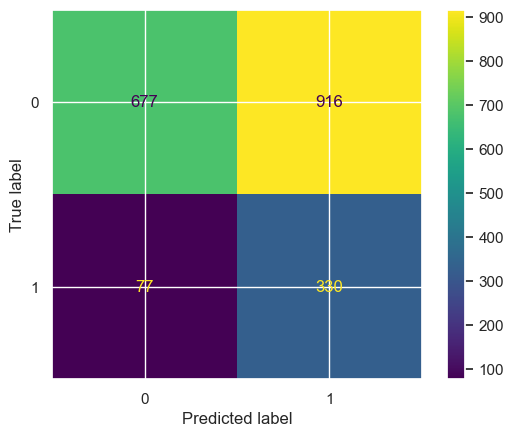

In [138]:
disp.plot()
plt.show()

In [139]:
for metric,evaluator in zip(["Precision","Recall","Accuracy","f1_score"],[precision_score, recall_score, \
                                                                              accuracy_score, f1_score]):
        valor = evaluator(y_test,y_pred_xgb)
        print("%s: %.2f" %(metric, valor))

Precision: 0.26
Recall: 0.81
Accuracy: 0.50
f1_score: 0.40


In [140]:
best_catb = gs_catb.best_estimator_

In [141]:
y_pred_catb = best_catb.predict(X_test)

In [142]:
conf_matrix = confusion_matrix(y_test, y_pred_catb)

In [143]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

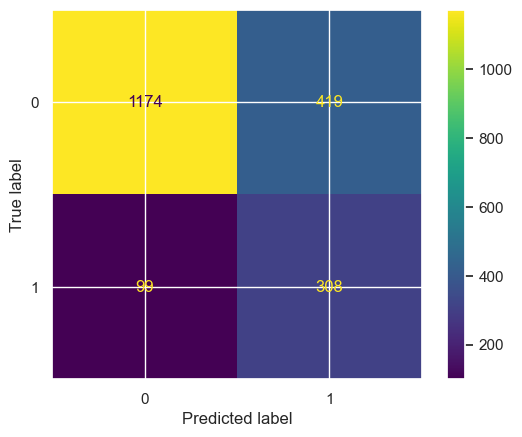

In [144]:
disp.plot()
plt.show()

In [145]:
for metric,evaluator in zip(["Precision","Recall","Accuracy","f1_score"],[precision_score, recall_score, \
                                                                              accuracy_score, f1_score]):
        valor = evaluator(y_test,y_pred_catb)
        print("%s: %.2f" %(metric, valor))

Precision: 0.42
Recall: 0.76
Accuracy: 0.74
f1_score: 0.54


In [146]:
from sklearn.metrics import plot_roc_curve

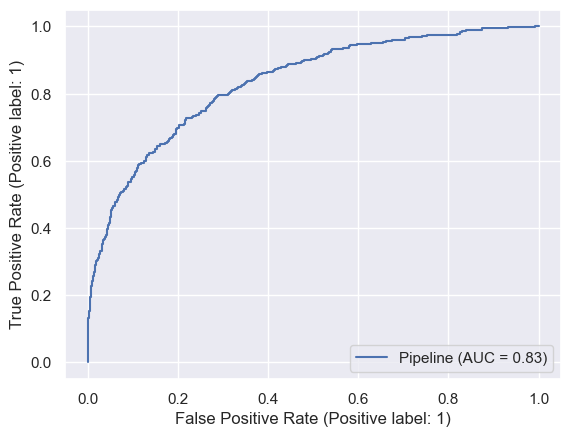

In [147]:
plot_roc_curve(gs_catb.best_estimator_, X_test, y_test)

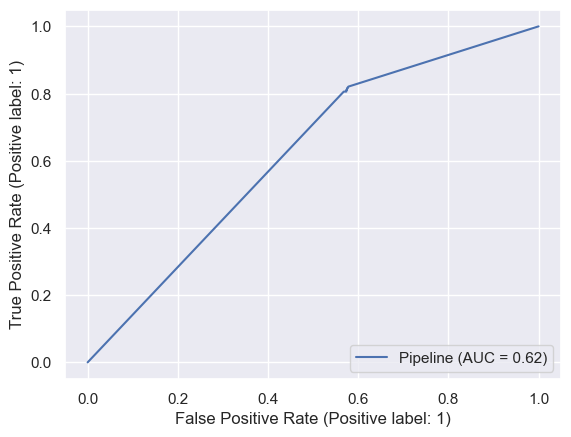

In [148]:
plot_roc_curve(gs_xgb.best_estimator_, X_test, y_test)

## **8. Guardamos el modelo**

In [149]:
import joblib

In [150]:
joblib.dump(best_catb, "churn_prediction_model.pkl")

['churn_prediction_model.pkl']